In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
#from image import *
from scipy import spatial



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def gaussian_filter_density(gt):
    #Generates a density map using Gaussian filter transformation
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    
    gt_count = np.count_nonzero(gt)
    
    if gt_count == 0:
        return density

    # FInd out the K nearest neighbours using a KDTree
    
    pts = np.array(list(zip(np.nonzero(gt)[1].ravel(), np.nonzero(gt)[0].ravel())))
    leafsize = 2048
    
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generating density...')    
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        
        #Convolve with the gaussian filter
        
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [3]:
root = r'data/'

In [4]:
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test,part_B_train,part_B_test]

In [5]:
part_A_train

'data/part_A/train_data\\images'

In [6]:
# List of all image paths

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

1198


In [7]:
img_paths

['data/part_A/train_data\\images\\IMG_1.jpg',
 'data/part_A/train_data\\images\\IMG_10.jpg',
 'data/part_A/train_data\\images\\IMG_100.jpg',
 'data/part_A/train_data\\images\\IMG_101.jpg',
 'data/part_A/train_data\\images\\IMG_102.jpg',
 'data/part_A/train_data\\images\\IMG_103.jpg',
 'data/part_A/train_data\\images\\IMG_104.jpg',
 'data/part_A/train_data\\images\\IMG_105.jpg',
 'data/part_A/train_data\\images\\IMG_106.jpg',
 'data/part_A/train_data\\images\\IMG_107.jpg',
 'data/part_A/train_data\\images\\IMG_108.jpg',
 'data/part_A/train_data\\images\\IMG_109.jpg',
 'data/part_A/train_data\\images\\IMG_11.jpg',
 'data/part_A/train_data\\images\\IMG_110.jpg',
 'data/part_A/train_data\\images\\IMG_111.jpg',
 'data/part_A/train_data\\images\\IMG_112.jpg',
 'data/part_A/train_data\\images\\IMG_113.jpg',
 'data/part_A/train_data\\images\\IMG_114.jpg',
 'data/part_A/train_data\\images\\IMG_115.jpg',
 'data/part_A/train_data\\images\\IMG_116.jpg',
 'data/part_A/train_data\\images\\IMG_117.jp

In [8]:
from tqdm import tqdm

i = 0
for img_path in tqdm(img_paths):
        
    print (img_path)
    # Load sparse matrix
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    
    #Read image
    img= plt.imread(img_path)
    
    # Create a zero matrix of image size
    k = np.zeros((img.shape[0],img.shape[1]))
    
    gt = mat["image_info"][0,0][0,0][0]
    
    #Generate hot encoded matrix of sparse matrix
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    
    # generate density map
    k = gaussian_filter_density(k)
    
    # File path to save density map
    file_path = img_path.replace('.jpg','.h5').replace('images','ground-truth')
    
    
    with h5py.File(file_path, 'w') as hf:
            hf['density'] = k
    


  0%|          | 0/1198 [00:00<?, ?it/s]

data/part_A/train_data\images\IMG_1.jpg
(768, 1024)
generating density...


  0%|          | 1/1198 [00:29<9:44:51, 29.32s/it]

done.
data/part_A/train_data\images\IMG_10.jpg
(683, 1024)
generating density...


  0%|          | 2/1198 [00:58<9:41:45, 29.19s/it]

done.
data/part_A/train_data\images\IMG_100.jpg
(654, 1024)
generating density...


  0%|          | 3/1198 [01:11<7:17:47, 21.98s/it]

done.
data/part_A/train_data\images\IMG_101.jpg
(768, 1024)
generating density...


  0%|          | 4/1198 [01:26<6:23:59, 19.30s/it]

done.
data/part_A/train_data\images\IMG_102.jpg
(768, 1024)
generating density...


  0%|          | 5/1198 [01:37<5:21:16, 16.16s/it]

done.
data/part_A/train_data\images\IMG_103.jpg
(400, 400)
generating density...


  1%|          | 6/1198 [01:38<3:38:27, 11.00s/it]

done.
data/part_A/train_data\images\IMG_104.jpg
(405, 540)
generating density...


  1%|          | 7/1198 [01:41<2:43:28,  8.24s/it]

done.
data/part_A/train_data\images\IMG_105.jpg
(632, 990)
generating density...


  1%|          | 8/1198 [01:52<3:03:08,  9.23s/it]

done.
data/part_A/train_data\images\IMG_106.jpg
(675, 1024)
generating density...


  1%|          | 9/1198 [02:15<4:28:50, 13.57s/it]

done.
data/part_A/train_data\images\IMG_107.jpg
(517, 800)
generating density...


  1%|          | 10/1198 [02:19<3:32:07, 10.71s/it]

done.
data/part_A/train_data\images\IMG_108.jpg
(767, 1024)
generating density...


  1%|          | 11/1198 [02:54<5:58:36, 18.13s/it]

done.
data/part_A/train_data\images\IMG_109.jpg
(681, 1024)
generating density...


  1%|          | 12/1198 [03:15<6:12:15, 18.83s/it]

done.
data/part_A/train_data\images\IMG_11.jpg
(686, 1024)
generating density...


  1%|          | 13/1198 [03:22<5:05:22, 15.46s/it]

done.
data/part_A/train_data\images\IMG_110.jpg
(498, 1024)
generating density...


  1%|          | 14/1198 [03:30<4:18:55, 13.12s/it]

done.
data/part_A/train_data\images\IMG_111.jpg
(768, 1024)
generating density...


  1%|▏         | 15/1198 [04:05<6:28:39, 19.71s/it]

done.
data/part_A/train_data\images\IMG_112.jpg
(327, 1024)
generating density...


  1%|▏         | 16/1198 [04:27<6:42:14, 20.42s/it]

done.
data/part_A/train_data\images\IMG_113.jpg
(390, 600)
generating density...


  1%|▏         | 17/1198 [04:32<5:11:40, 15.83s/it]

done.
data/part_A/train_data\images\IMG_114.jpg
(375, 500)
generating density...


  2%|▏         | 18/1198 [04:35<3:51:09, 11.75s/it]

done.
data/part_A/train_data\images\IMG_115.jpg
(611, 1021)
generating density...


  2%|▏         | 19/1198 [04:48<3:58:21, 12.13s/it]

done.
data/part_A/train_data\images\IMG_116.jpg
(640, 640)
generating density...


  2%|▏         | 20/1198 [04:58<3:49:42, 11.70s/it]

done.
data/part_A/train_data\images\IMG_117.jpg
(579, 840)
generating density...


  2%|▏         | 21/1198 [05:09<3:44:59, 11.47s/it]

done.
data/part_A/train_data\images\IMG_118.jpg
(651, 1024)
generating density...


  2%|▏         | 22/1198 [05:52<6:51:01, 20.97s/it]

done.
data/part_A/train_data\images\IMG_119.jpg
(594, 1024)
generating density...


  2%|▏         | 23/1198 [06:05<6:03:55, 18.58s/it]

done.
data/part_A/train_data\images\IMG_12.jpg
(680, 1024)
generating density...


  2%|▏         | 24/1198 [06:21<5:44:06, 17.59s/it]

done.
data/part_A/train_data\images\IMG_120.jpg
(768, 1024)
generating density...


  2%|▏         | 25/1198 [07:05<8:20:17, 25.59s/it]

done.
data/part_A/train_data\images\IMG_121.jpg
(373, 561)
generating density...


  2%|▏         | 26/1198 [07:07<6:02:29, 18.56s/it]

done.
data/part_A/train_data\images\IMG_122.jpg
(787, 1024)
generating density...


  2%|▏         | 27/1198 [07:24<5:52:30, 18.06s/it]

done.
data/part_A/train_data\images\IMG_123.jpg
(774, 1024)
generating density...


  2%|▏         | 28/1198 [07:46<6:12:36, 19.11s/it]

done.
data/part_A/train_data\images\IMG_124.jpg
(768, 1024)
generating density...


  2%|▏         | 29/1198 [08:15<7:11:22, 22.14s/it]

done.
data/part_A/train_data\images\IMG_125.jpg
(565, 849)
generating density...


  3%|▎         | 30/1198 [08:20<5:29:43, 16.94s/it]

done.
data/part_A/train_data\images\IMG_126.jpg
(576, 1024)
generating density...


  3%|▎         | 31/1198 [08:30<4:53:02, 15.07s/it]

done.
data/part_A/train_data\images\IMG_127.jpg
(300, 400)
generating density...


  3%|▎         | 32/1198 [08:31<3:30:14, 10.82s/it]

done.
data/part_A/train_data\images\IMG_128.jpg
(683, 1024)
generating density...


  3%|▎         | 33/1198 [09:12<6:22:20, 19.69s/it]

done.
data/part_A/train_data\images\IMG_129.jpg
(689, 998)
generating density...


  3%|▎         | 34/1198 [09:26<5:48:29, 17.96s/it]

done.
data/part_A/train_data\images\IMG_13.jpg
(747, 1024)
generating density...


  3%|▎         | 35/1198 [09:43<5:47:26, 17.92s/it]

done.
data/part_A/train_data\images\IMG_130.jpg
(680, 1024)
generating density...


  3%|▎         | 36/1198 [10:15<7:07:42, 22.08s/it]

done.
data/part_A/train_data\images\IMG_131.jpg
(498, 390)
generating density...


  3%|▎         | 37/1198 [10:20<5:25:09, 16.80s/it]

done.
data/part_A/train_data\images\IMG_132.jpg
(800, 600)
generating density...


  3%|▎         | 38/1198 [10:26<4:22:04, 13.56s/it]

done.
data/part_A/train_data\images\IMG_133.jpg
(683, 1024)
generating density...


  3%|▎         | 39/1198 [10:59<6:16:22, 19.48s/it]

done.
data/part_A/train_data\images\IMG_134.jpg
(1024, 1024)
generating density...


  3%|▎         | 40/1198 [12:04<10:42:40, 33.30s/it]

done.
data/part_A/train_data\images\IMG_135.jpg
(182, 420)
generating density...


  3%|▎         | 41/1198 [12:05<7:33:56, 23.54s/it] 

done.
data/part_A/train_data\images\IMG_136.jpg
(500, 666)
generating density...


  4%|▎         | 42/1198 [12:14<6:05:49, 18.99s/it]

done.
data/part_A/train_data\images\IMG_137.jpg
(585, 1024)
generating density...


  4%|▎         | 43/1198 [12:41<6:51:20, 21.37s/it]

done.
data/part_A/train_data\images\IMG_138.jpg
(652, 1024)
generating density...


  4%|▎         | 44/1198 [12:54<6:05:44, 19.02s/it]

done.
data/part_A/train_data\images\IMG_139.jpg
(370, 545)
generating density...


  4%|▍         | 45/1198 [12:56<4:27:22, 13.91s/it]

done.
data/part_A/train_data\images\IMG_14.jpg
(645, 1024)
generating density...


  4%|▍         | 46/1198 [13:15<4:53:23, 15.28s/it]

done.
data/part_A/train_data\images\IMG_140.jpg
(768, 1024)
generating density...


  4%|▍         | 47/1198 [13:33<5:11:42, 16.25s/it]

done.
data/part_A/train_data\images\IMG_141.jpg
(427, 640)
generating density...


  4%|▍         | 48/1198 [13:39<4:12:15, 13.16s/it]

done.
data/part_A/train_data\images\IMG_142.jpg
(455, 670)
generating density...


  4%|▍         | 49/1198 [13:44<3:27:41, 10.85s/it]

done.
data/part_A/train_data\images\IMG_143.jpg
(605, 1024)
generating density...


  4%|▍         | 50/1198 [14:11<4:55:05, 15.42s/it]

done.
data/part_A/train_data\images\IMG_144.jpg
(768, 1024)
generating density...


  4%|▍         | 51/1198 [14:35<5:49:06, 18.26s/it]

done.
data/part_A/train_data\images\IMG_145.jpg
(561, 1024)
generating density...


  4%|▍         | 52/1198 [14:49<5:21:13, 16.82s/it]

done.
data/part_A/train_data\images\IMG_146.jpg
(680, 1024)
generating density...


  4%|▍         | 53/1198 [15:07<5:26:25, 17.11s/it]

done.
data/part_A/train_data\images\IMG_147.jpg
(768, 1024)
generating density...


  5%|▍         | 54/1198 [15:30<6:01:32, 18.96s/it]

done.
data/part_A/train_data\images\IMG_148.jpg
(680, 1024)
generating density...


  5%|▍         | 55/1198 [15:40<5:07:50, 16.16s/it]

done.
data/part_A/train_data\images\IMG_149.jpg
(683, 1024)
generating density...


  5%|▍         | 56/1198 [16:17<7:11:35, 22.68s/it]

done.
data/part_A/train_data\images\IMG_15.jpg
(768, 1024)
generating density...


  5%|▍         | 57/1198 [16:31<6:21:22, 20.06s/it]

done.
data/part_A/train_data\images\IMG_150.jpg
(450, 970)
generating density...


  5%|▍         | 58/1198 [16:47<5:57:47, 18.83s/it]

done.
data/part_A/train_data\images\IMG_151.jpg
(449, 716)
generating density...


  5%|▍         | 59/1198 [16:58<5:12:41, 16.47s/it]

done.
data/part_A/train_data\images\IMG_152.jpg
(600, 800)
generating density...


  5%|▌         | 60/1198 [17:09<4:37:30, 14.63s/it]

done.
data/part_A/train_data\images\IMG_153.jpg
(400, 600)
generating density...


  5%|▌         | 61/1198 [17:14<3:45:47, 11.92s/it]

done.
data/part_A/train_data\images\IMG_154.jpg
(416, 624)
generating density...


  5%|▌         | 62/1198 [17:18<2:58:09,  9.41s/it]

done.
data/part_A/train_data\images\IMG_155.jpg
(409, 620)
generating density...


  5%|▌         | 63/1198 [17:22<2:28:03,  7.83s/it]

done.
data/part_A/train_data\images\IMG_156.jpg
(625, 1024)
generating density...


  5%|▌         | 64/1198 [17:49<4:14:06, 13.45s/it]

done.
data/part_A/train_data\images\IMG_157.jpg
(450, 299)
generating density...


  5%|▌         | 65/1198 [17:49<3:00:59,  9.58s/it]

done.
data/part_A/train_data\images\IMG_158.jpg
(671, 1024)
generating density...


  6%|▌         | 66/1198 [18:06<3:42:36, 11.80s/it]

done.
data/part_A/train_data\images\IMG_159.jpg
(267, 400)
generating density...


  6%|▌         | 67/1198 [18:07<2:41:12,  8.55s/it]

done.
data/part_A/train_data\images\IMG_16.jpg
(1024, 1024)
generating density...


  6%|▌         | 68/1198 [18:17<2:46:52,  8.86s/it]

done.
data/part_A/train_data\images\IMG_160.jpg
(540, 1024)
generating density...


  6%|▌         | 69/1198 [18:25<2:43:18,  8.68s/it]

done.
data/part_A/train_data\images\IMG_161.jpg
(480, 640)
generating density...


  6%|▌         | 70/1198 [18:28<2:11:18,  6.98s/it]

done.
data/part_A/train_data\images\IMG_162.jpg
(480, 720)
generating density...


  6%|▌         | 71/1198 [18:32<1:56:42,  6.21s/it]

done.
data/part_A/train_data\images\IMG_163.jpg
(615, 970)
generating density...


  6%|▌         | 72/1198 [18:48<2:47:23,  8.92s/it]

done.
data/part_A/train_data\images\IMG_164.jpg
(462, 650)
generating density...


  6%|▌         | 73/1198 [18:53<2:28:58,  7.95s/it]

done.
data/part_A/train_data\images\IMG_165.jpg
(274, 939)
generating density...


  6%|▌         | 74/1198 [18:58<2:11:59,  7.05s/it]

done.
data/part_A/train_data\images\IMG_166.jpg
(683, 1024)
generating density...


  6%|▋         | 75/1198 [19:32<4:41:26, 15.04s/it]

done.
data/part_A/train_data\images\IMG_167.jpg
(830, 1024)
generating density...


  6%|▋         | 76/1198 [19:55<5:29:12, 17.60s/it]

done.
data/part_A/train_data\images\IMG_168.jpg
(944, 1024)
generating density...


  6%|▋         | 77/1198 [20:47<8:38:59, 27.78s/it]

done.
data/part_A/train_data\images\IMG_169.jpg
(649, 800)
generating density...


  7%|▋         | 78/1198 [20:58<7:03:19, 22.68s/it]

done.
data/part_A/train_data\images\IMG_17.jpg
(478, 600)
generating density...


  7%|▋         | 79/1198 [21:01<5:14:27, 16.86s/it]

done.
data/part_A/train_data\images\IMG_170.jpg
(480, 722)
generating density...


  7%|▋         | 80/1198 [21:09<4:26:48, 14.32s/it]

done.
data/part_A/train_data\images\IMG_171.jpg
(351, 600)
generating density...


  7%|▋         | 81/1198 [21:17<3:49:51, 12.35s/it]

done.
data/part_A/train_data\images\IMG_172.jpg
(685, 1024)
generating density...


  7%|▋         | 82/1198 [21:27<3:38:01, 11.72s/it]

done.
data/part_A/train_data\images\IMG_173.jpg
(512, 1024)
generating density...


  7%|▋         | 83/1198 [21:42<3:53:10, 12.55s/it]

done.
data/part_A/train_data\images\IMG_174.jpg
(512, 1024)
generating density...


  7%|▋         | 84/1198 [21:51<3:32:05, 11.42s/it]

done.
data/part_A/train_data\images\IMG_175.jpg
(360, 640)
generating density...


  7%|▋         | 85/1198 [21:53<2:40:28,  8.65s/it]

done.
data/part_A/train_data\images\IMG_176.jpg
(380, 594)
generating density...


  7%|▋         | 86/1198 [21:56<2:10:00,  7.01s/it]

done.
data/part_A/train_data\images\IMG_177.jpg
(768, 1024)
generating density...


  7%|▋         | 87/1198 [22:14<3:10:46, 10.30s/it]

done.
data/part_A/train_data\images\IMG_178.jpg
(688, 1024)
generating density...


  7%|▋         | 88/1198 [22:42<4:47:04, 15.52s/it]

done.
data/part_A/train_data\images\IMG_179.jpg
(616, 1024)
generating density...


  7%|▋         | 89/1198 [22:53<4:21:39, 14.16s/it]

done.
data/part_A/train_data\images\IMG_18.jpg
(793, 1024)
generating density...


  8%|▊         | 90/1198 [23:06<4:16:43, 13.90s/it]

done.
data/part_A/train_data\images\IMG_180.jpg
(386, 509)
generating density...


  8%|▊         | 91/1198 [23:09<3:15:45, 10.61s/it]

done.
data/part_A/train_data\images\IMG_181.jpg
(639, 1024)
generating density...


  8%|▊         | 92/1198 [23:31<4:18:01, 14.00s/it]

done.
data/part_A/train_data\images\IMG_182.jpg
(680, 1024)
generating density...


  8%|▊         | 93/1198 [23:47<4:28:48, 14.60s/it]

done.
data/part_A/train_data\images\IMG_183.jpg
(687, 1024)
generating density...


  8%|▊         | 94/1198 [24:05<4:45:49, 15.53s/it]

done.
data/part_A/train_data\images\IMG_184.jpg
(617, 1024)
generating density...


  8%|▊         | 95/1198 [24:35<6:09:35, 20.10s/it]

done.
data/part_A/train_data\images\IMG_185.jpg
(800, 583)
generating density...


  8%|▊         | 96/1198 [24:52<5:52:55, 19.22s/it]

done.
data/part_A/train_data\images\IMG_186.jpg
(653, 460)
generating density...


  8%|▊         | 97/1198 [25:06<5:19:32, 17.41s/it]

done.
data/part_A/train_data\images\IMG_187.jpg
(387, 1024)
generating density...


  8%|▊         | 98/1198 [25:14<4:27:10, 14.57s/it]

done.
data/part_A/train_data\images\IMG_188.jpg
(649, 1024)
generating density...


  8%|▊         | 99/1198 [25:21<3:48:29, 12.47s/it]

done.
data/part_A/train_data\images\IMG_189.jpg
(280, 692)
generating density...


  8%|▊         | 100/1198 [25:24<2:54:44,  9.55s/it]

done.
data/part_A/train_data\images\IMG_19.jpg
(600, 900)
generating density...


  8%|▊         | 101/1198 [25:34<2:55:35,  9.60s/it]

done.
data/part_A/train_data\images\IMG_190.jpg
(792, 1024)
generating density...


  9%|▊         | 102/1198 [25:55<3:58:20, 13.05s/it]

done.
data/part_A/train_data\images\IMG_191.jpg
(682, 1024)
generating density...


  9%|▊         | 103/1198 [26:08<3:57:47, 13.03s/it]

done.
data/part_A/train_data\images\IMG_192.jpg
(640, 480)
generating density...


  9%|▊         | 104/1198 [26:11<3:02:05,  9.99s/it]

done.
data/part_A/train_data\images\IMG_193.jpg
(506, 487)
generating density...


  9%|▉         | 105/1198 [26:12<2:17:04,  7.52s/it]

done.
data/part_A/train_data\images\IMG_194.jpg
(801, 688)
generating density...


  9%|▉         | 106/1198 [26:23<2:34:07,  8.47s/it]

done.
data/part_A/train_data\images\IMG_195.jpg
(665, 1024)
generating density...


  9%|▉         | 107/1198 [26:39<3:13:25, 10.64s/it]

done.
data/part_A/train_data\images\IMG_196.jpg
(684, 1024)
generating density...


  9%|▉         | 108/1198 [27:03<4:29:01, 14.81s/it]

done.
data/part_A/train_data\images\IMG_197.jpg
(600, 800)
generating density...


  9%|▉         | 109/1198 [27:09<3:39:41, 12.10s/it]

done.
data/part_A/train_data\images\IMG_198.jpg
(415, 650)
generating density...


  9%|▉         | 110/1198 [27:12<2:50:54,  9.43s/it]

done.
data/part_A/train_data\images\IMG_199.jpg
(505, 1024)
generating density...


  9%|▉         | 111/1198 [27:30<3:37:11, 11.99s/it]

done.
data/part_A/train_data\images\IMG_2.jpg
(713, 1024)
generating density...


  9%|▉         | 112/1198 [27:54<4:39:59, 15.47s/it]

done.
data/part_A/train_data\images\IMG_20.jpg
(688, 1024)
generating density...


  9%|▉         | 113/1198 [28:06<4:22:43, 14.53s/it]

done.
data/part_A/train_data\images\IMG_200.jpg
(500, 760)
generating density...


 10%|▉         | 114/1198 [28:10<3:23:16, 11.25s/it]

done.
data/part_A/train_data\images\IMG_201.jpg
(530, 800)
generating density...


 10%|▉         | 115/1198 [28:16<2:55:36,  9.73s/it]

done.
data/part_A/train_data\images\IMG_202.jpg
(530, 800)
generating density...


 10%|▉         | 116/1198 [28:22<2:34:39,  8.58s/it]

done.
data/part_A/train_data\images\IMG_203.jpg
(683, 1024)
generating density...


 10%|▉         | 117/1198 [29:01<5:21:03, 17.82s/it]

done.
data/part_A/train_data\images\IMG_204.jpg
(695, 1024)
generating density...


 10%|▉         | 118/1198 [29:17<5:10:48, 17.27s/it]

done.
data/part_A/train_data\images\IMG_205.jpg
(798, 1017)
generating density...


 10%|▉         | 119/1198 [29:32<4:58:50, 16.62s/it]

done.
data/part_A/train_data\images\IMG_206.jpg
(683, 1024)
generating density...


 10%|█         | 120/1198 [29:43<4:29:18, 14.99s/it]

done.
data/part_A/train_data\images\IMG_207.jpg
(442, 650)
generating density...


 10%|█         | 121/1198 [29:46<3:23:11, 11.32s/it]

done.
data/part_A/train_data\images\IMG_208.jpg
(683, 1024)
generating density...


 10%|█         | 122/1198 [30:02<3:46:03, 12.61s/it]

done.
data/part_A/train_data\images\IMG_209.jpg
(619, 1000)
generating density...


 10%|█         | 123/1198 [30:15<3:46:22, 12.64s/it]

done.
data/part_A/train_data\images\IMG_21.jpg
(766, 1024)
generating density...


 10%|█         | 124/1198 [30:35<4:30:08, 15.09s/it]

done.
data/part_A/train_data\images\IMG_210.jpg
(768, 1024)
generating density...


 10%|█         | 125/1198 [30:55<4:54:48, 16.48s/it]

done.
data/part_A/train_data\images\IMG_211.jpg
(334, 1024)
generating density...


 11%|█         | 126/1198 [30:59<3:44:23, 12.56s/it]

done.
data/part_A/train_data\images\IMG_212.jpg
(688, 1024)
generating density...


 11%|█         | 127/1198 [31:18<4:22:43, 14.72s/it]

done.
data/part_A/train_data\images\IMG_213.jpg
(749, 1000)
generating density...


 11%|█         | 128/1198 [31:34<4:26:45, 14.96s/it]

done.
data/part_A/train_data\images\IMG_214.jpg
(359, 329)
generating density...


 11%|█         | 129/1198 [31:35<3:12:39, 10.81s/it]

done.
data/part_A/train_data\images\IMG_215.jpg
(298, 446)
generating density...


 11%|█         | 130/1198 [31:36<2:22:15,  7.99s/it]

done.
data/part_A/train_data\images\IMG_216.jpg
(293, 442)
generating density...


 11%|█         | 131/1198 [31:37<1:42:35,  5.77s/it]

done.
data/part_A/train_data\images\IMG_217.jpg
(325, 444)
generating density...


 11%|█         | 132/1198 [31:38<1:18:56,  4.44s/it]

done.
data/part_A/train_data\images\IMG_218.jpg
(411, 443)
generating density...


 11%|█         | 133/1198 [31:41<1:12:09,  4.06s/it]

done.
data/part_A/train_data\images\IMG_219.jpg
(282, 432)
generating density...


 11%|█         | 134/1198 [31:43<57:29,  3.24s/it]  

done.
data/part_A/train_data\images\IMG_22.jpg
(630, 961)
generating density...


 11%|█▏        | 135/1198 [31:58<2:03:11,  6.95s/it]

done.
data/part_A/train_data\images\IMG_220.jpg
(377, 1024)
generating density...


 11%|█▏        | 136/1198 [32:03<1:52:26,  6.35s/it]

done.
data/part_A/train_data\images\IMG_221.jpg
(679, 1024)
generating density...


 11%|█▏        | 137/1198 [32:18<2:37:11,  8.89s/it]

done.
data/part_A/train_data\images\IMG_222.jpg
(522, 1024)
generating density...


 12%|█▏        | 138/1198 [32:37<3:30:00, 11.89s/it]

done.
data/part_A/train_data\images\IMG_223.jpg
(661, 817)
generating density...


 12%|█▏        | 139/1198 [32:45<3:08:02, 10.65s/it]

done.
data/part_A/train_data\images\IMG_224.jpg
(619, 1024)
generating density...


 12%|█▏        | 140/1198 [33:00<3:29:12, 11.86s/it]

done.
data/part_A/train_data\images\IMG_225.jpg
(549, 1024)
generating density...


 12%|█▏        | 141/1198 [33:15<3:49:55, 13.05s/it]

done.
data/part_A/train_data\images\IMG_226.jpg
(615, 922)
generating density...


 12%|█▏        | 142/1198 [33:36<4:30:47, 15.39s/it]

done.
data/part_A/train_data\images\IMG_227.jpg
(405, 609)
generating density...


 12%|█▏        | 143/1198 [33:38<3:19:21, 11.34s/it]

done.
data/part_A/train_data\images\IMG_228.jpg
(340, 562)
generating density...


 12%|█▏        | 144/1198 [33:40<2:27:07,  8.38s/it]

done.
data/part_A/train_data\images\IMG_229.jpg
(430, 620)
generating density...


 12%|█▏        | 145/1198 [33:48<2:27:57,  8.43s/it]

done.
data/part_A/train_data\images\IMG_23.jpg
(800, 600)
generating density...


 12%|█▏        | 146/1198 [33:54<2:13:51,  7.63s/it]

done.
data/part_A/train_data\images\IMG_230.jpg
(418, 628)
generating density...


 12%|█▏        | 147/1198 [33:58<1:53:05,  6.46s/it]

done.
data/part_A/train_data\images\IMG_231.jpg
(682, 1024)
generating density...


 12%|█▏        | 148/1198 [34:20<3:16:00, 11.20s/it]

done.
data/part_A/train_data\images\IMG_232.jpg
(279, 400)
generating density...


 12%|█▏        | 149/1198 [34:20<2:19:37,  7.99s/it]

done.
data/part_A/train_data\images\IMG_233.jpg
(768, 1024)
generating density...


 13%|█▎        | 150/1198 [34:33<2:44:03,  9.39s/it]

done.
data/part_A/train_data\images\IMG_234.jpg
(768, 1024)
generating density...


 13%|█▎        | 151/1198 [34:47<3:10:35, 10.92s/it]

done.
data/part_A/train_data\images\IMG_235.jpg
(683, 1024)
generating density...


 13%|█▎        | 152/1198 [35:00<3:20:26, 11.50s/it]

done.
data/part_A/train_data\images\IMG_236.jpg
(768, 1024)
generating density...


 13%|█▎        | 153/1198 [35:24<4:25:21, 15.24s/it]

done.
data/part_A/train_data\images\IMG_237.jpg
(432, 700)
generating density...


 13%|█▎        | 154/1198 [35:31<3:40:44, 12.69s/it]

done.
data/part_A/train_data\images\IMG_238.jpg
(469, 709)
generating density...


 13%|█▎        | 155/1198 [35:37<3:06:54, 10.75s/it]

done.
data/part_A/train_data\images\IMG_239.jpg
(328, 605)
generating density...


 13%|█▎        | 156/1198 [35:39<2:20:13,  8.07s/it]

done.
data/part_A/train_data\images\IMG_24.jpg
(769, 1024)
generating density...


 13%|█▎        | 157/1198 [35:47<2:21:36,  8.16s/it]

done.
data/part_A/train_data\images\IMG_240.jpg
(183, 464)
generating density...


 13%|█▎        | 158/1198 [35:48<1:42:16,  5.90s/it]

done.
data/part_A/train_data\images\IMG_241.jpg
(728, 1024)
generating density...


 13%|█▎        | 159/1198 [35:57<1:59:08,  6.88s/it]

done.
data/part_A/train_data\images\IMG_242.jpg
(667, 1000)
generating density...


 13%|█▎        | 160/1198 [36:30<4:15:51, 14.79s/it]

done.
data/part_A/train_data\images\IMG_243.jpg
(681, 1024)
generating density...


 13%|█▎        | 161/1198 [36:40<3:46:19, 13.10s/it]

done.
data/part_A/train_data\images\IMG_244.jpg
(342, 608)
generating density...


 14%|█▎        | 162/1198 [36:41<2:47:51,  9.72s/it]

done.
data/part_A/train_data\images\IMG_245.jpg
(825, 1024)
generating density...


 14%|█▎        | 163/1198 [37:12<4:35:55, 16.00s/it]

done.
data/part_A/train_data\images\IMG_246.jpg
(267, 400)
generating density...


 14%|█▎        | 164/1198 [37:13<3:19:09, 11.56s/it]

done.
data/part_A/train_data\images\IMG_247.jpg
(681, 1024)
generating density...


 14%|█▍        | 165/1198 [37:37<4:20:30, 15.13s/it]

done.
data/part_A/train_data\images\IMG_248.jpg
(681, 1024)
generating density...


 14%|█▍        | 166/1198 [37:52<4:22:12, 15.24s/it]

done.
data/part_A/train_data\images\IMG_249.jpg
(451, 800)
generating density...


 14%|█▍        | 167/1198 [37:57<3:29:22, 12.18s/it]

done.
data/part_A/train_data\images\IMG_25.jpg
(768, 1024)
generating density...


 14%|█▍        | 168/1198 [38:07<3:15:07, 11.37s/it]

done.
data/part_A/train_data\images\IMG_250.jpg
(681, 1024)
generating density...


 14%|█▍        | 169/1198 [38:23<3:38:35, 12.75s/it]

done.
data/part_A/train_data\images\IMG_251.jpg
(661, 1024)
generating density...


 14%|█▍        | 170/1198 [38:58<5:31:50, 19.37s/it]

done.
data/part_A/train_data\images\IMG_252.jpg
(400, 600)
generating density...


 14%|█▍        | 171/1198 [39:00<4:05:57, 14.37s/it]

done.
data/part_A/train_data\images\IMG_253.jpg
(686, 1024)
generating density...


 14%|█▍        | 172/1198 [39:21<4:37:28, 16.23s/it]

done.
data/part_A/train_data\images\IMG_254.jpg
(683, 1024)
generating density...


 14%|█▍        | 173/1198 [39:41<4:57:15, 17.40s/it]

done.
data/part_A/train_data\images\IMG_255.jpg
(701, 749)
generating density...


 15%|█▍        | 174/1198 [39:50<4:15:33, 14.97s/it]

done.
data/part_A/train_data\images\IMG_256.jpg
(576, 1024)
generating density...


 15%|█▍        | 175/1198 [39:54<3:17:43, 11.60s/it]

done.
data/part_A/train_data\images\IMG_257.jpg
(768, 1024)
generating density...


 15%|█▍        | 176/1198 [40:04<3:08:17, 11.05s/it]

done.
data/part_A/train_data\images\IMG_258.jpg
(768, 1024)
generating density...


 15%|█▍        | 177/1198 [40:26<4:05:11, 14.41s/it]

done.
data/part_A/train_data\images\IMG_259.jpg
(338, 506)
generating density...


 15%|█▍        | 178/1198 [40:28<2:59:30, 10.56s/it]

done.
data/part_A/train_data\images\IMG_26.jpg
(716, 1024)
generating density...


 15%|█▍        | 179/1198 [41:07<5:24:33, 19.11s/it]

done.
data/part_A/train_data\images\IMG_260.jpg
(681, 1024)
generating density...


 15%|█▌        | 180/1198 [41:20<4:54:52, 17.38s/it]

done.
data/part_A/train_data\images\IMG_261.jpg
(359, 478)
generating density...


 15%|█▌        | 181/1198 [41:21<3:32:33, 12.54s/it]

done.
data/part_A/train_data\images\IMG_262.jpg
(576, 1024)
generating density...


 15%|█▌        | 182/1198 [41:53<5:11:21, 18.39s/it]

done.
data/part_A/train_data\images\IMG_263.jpg
(453, 680)
generating density...


 15%|█▌        | 183/1198 [42:00<4:13:28, 14.98s/it]

done.
data/part_A/train_data\images\IMG_264.jpg
(576, 1024)
generating density...


 15%|█▌        | 184/1198 [42:06<3:26:40, 12.23s/it]

done.
data/part_A/train_data\images\IMG_265.jpg
(464, 370)
generating density...


 15%|█▌        | 185/1198 [42:07<2:31:02,  8.95s/it]

done.
data/part_A/train_data\images\IMG_266.jpg
(391, 630)
generating density...


 16%|█▌        | 186/1198 [42:10<1:59:33,  7.09s/it]

done.
data/part_A/train_data\images\IMG_267.jpg
(521, 1024)
generating density...


 16%|█▌        | 187/1198 [42:29<2:57:42, 10.55s/it]

done.
data/part_A/train_data\images\IMG_268.jpg
(600, 900)
generating density...


 16%|█▌        | 188/1198 [43:11<5:37:56, 20.08s/it]

done.
data/part_A/train_data\images\IMG_269.jpg
(400, 600)
generating density...


 16%|█▌        | 189/1198 [43:13<4:06:27, 14.66s/it]

done.
data/part_A/train_data\images\IMG_27.jpg
(572, 945)
generating density...


 16%|█▌        | 190/1198 [43:31<4:24:55, 15.77s/it]

done.
data/part_A/train_data\images\IMG_270.jpg
(300, 416)
generating density...


 16%|█▌        | 191/1198 [43:33<3:12:39, 11.48s/it]

done.
data/part_A/train_data\images\IMG_271.jpg
(438, 736)
generating density...


 16%|█▌        | 192/1198 [43:38<2:38:06,  9.43s/it]

done.
data/part_A/train_data\images\IMG_272.jpg
(478, 359)
generating density...


 16%|█▌        | 193/1198 [43:39<1:55:07,  6.87s/it]

done.
data/part_A/train_data\images\IMG_273.jpg
(598, 1024)
generating density...


 16%|█▌        | 194/1198 [43:49<2:13:46,  7.99s/it]

done.
data/part_A/train_data\images\IMG_274.jpg
(681, 1024)
generating density...


 16%|█▋        | 195/1198 [43:54<1:57:32,  7.03s/it]

done.
data/part_A/train_data\images\IMG_275.jpg
(270, 360)
generating density...


 16%|█▋        | 196/1198 [43:54<1:25:00,  5.09s/it]

done.
data/part_A/train_data\images\IMG_276.jpg
(768, 1024)
generating density...


 16%|█▋        | 197/1198 [44:06<1:56:42,  7.00s/it]

done.
data/part_A/train_data\images\IMG_277.jpg
(692, 1024)
generating density...


 17%|█▋        | 198/1198 [44:16<2:10:25,  7.83s/it]

done.
data/part_A/train_data\images\IMG_278.jpg
(620, 620)
generating density...


 17%|█▋        | 199/1198 [44:21<1:57:00,  7.03s/it]

done.
data/part_A/train_data\images\IMG_279.jpg
(294, 488)
generating density...


 17%|█▋        | 200/1198 [44:22<1:27:50,  5.28s/it]

done.
data/part_A/train_data\images\IMG_28.jpg
(375, 500)
generating density...


 17%|█▋        | 201/1198 [44:25<1:17:56,  4.69s/it]

done.
data/part_A/train_data\images\IMG_280.jpg
(768, 1024)
generating density...


 17%|█▋        | 202/1198 [44:44<2:29:52,  9.03s/it]

done.
data/part_A/train_data\images\IMG_281.jpg
(680, 1024)
generating density...


 17%|█▋        | 203/1198 [44:53<2:26:29,  8.83s/it]

done.
data/part_A/train_data\images\IMG_282.jpg
(768, 1024)
generating density...


 17%|█▋        | 204/1198 [45:15<3:32:45, 12.84s/it]

done.
data/part_A/train_data\images\IMG_283.jpg
(661, 1024)
generating density...


 17%|█▋        | 205/1198 [45:55<5:49:30, 21.12s/it]

done.
data/part_A/train_data\images\IMG_284.jpg
(768, 1024)
generating density...


 17%|█▋        | 206/1198 [46:13<5:31:55, 20.08s/it]

done.
data/part_A/train_data\images\IMG_285.jpg
(694, 1024)
generating density...


 17%|█▋        | 207/1198 [46:28<5:07:30, 18.62s/it]

done.
data/part_A/train_data\images\IMG_286.jpg
(578, 779)
generating density...


 17%|█▋        | 208/1198 [46:36<4:14:37, 15.43s/it]

done.
data/part_A/train_data\images\IMG_287.jpg
(716, 1024)
generating density...


 17%|█▋        | 209/1198 [46:54<4:26:29, 16.17s/it]

done.
data/part_A/train_data\images\IMG_288.jpg
(768, 1024)
generating density...


 18%|█▊        | 210/1198 [47:05<3:59:46, 14.56s/it]

done.
data/part_A/train_data\images\IMG_289.jpg
(682, 1024)
generating density...


 18%|█▊        | 211/1198 [47:18<3:52:45, 14.15s/it]

done.
data/part_A/train_data\images\IMG_29.jpg
(450, 770)
generating density...


 18%|█▊        | 212/1198 [47:27<3:25:52, 12.53s/it]

done.
data/part_A/train_data\images\IMG_290.jpg
(768, 1024)
generating density...


 18%|█▊        | 213/1198 [47:37<3:14:48, 11.87s/it]

done.
data/part_A/train_data\images\IMG_291.jpg
(768, 1024)
generating density...


 18%|█▊        | 214/1198 [48:00<4:08:28, 15.15s/it]

done.
data/part_A/train_data\images\IMG_292.jpg
(665, 1024)
generating density...


 18%|█▊        | 215/1198 [48:27<5:07:21, 18.76s/it]

done.
data/part_A/train_data\images\IMG_293.jpg
(686, 1024)
generating density...


 18%|█▊        | 216/1198 [48:49<5:19:15, 19.51s/it]

done.
data/part_A/train_data\images\IMG_294.jpg
(683, 1024)
generating density...


 18%|█▊        | 217/1198 [49:41<7:59:15, 29.31s/it]

done.
data/part_A/train_data\images\IMG_295.jpg
(684, 1024)
generating density...


 18%|█▊        | 218/1198 [50:00<7:10:41, 26.37s/it]

done.
data/part_A/train_data\images\IMG_296.jpg
(685, 1024)
generating density...


 18%|█▊        | 219/1198 [50:16<6:19:32, 23.26s/it]

done.
data/part_A/train_data\images\IMG_297.jpg
(685, 1024)
generating density...


 18%|█▊        | 220/1198 [50:41<6:27:22, 23.77s/it]

done.
data/part_A/train_data\images\IMG_298.jpg
(272, 511)
generating density...


 18%|█▊        | 221/1198 [50:44<4:46:56, 17.62s/it]

done.
data/part_A/train_data\images\IMG_299.jpg
(681, 1024)
generating density...


 19%|█▊        | 222/1198 [51:25<6:38:27, 24.50s/it]

done.
data/part_A/train_data\images\IMG_3.jpg
(664, 1000)
generating density...


 19%|█▊        | 223/1198 [51:32<5:14:27, 19.35s/it]

done.
data/part_A/train_data\images\IMG_30.jpg
(645, 1024)
generating density...


 19%|█▊        | 224/1198 [51:53<5:19:40, 19.69s/it]

done.
data/part_A/train_data\images\IMG_300.jpg
(768, 1024)
generating density...


 19%|█▉        | 225/1198 [52:12<5:17:26, 19.58s/it]

done.
data/part_A/train_data\images\IMG_31.jpg
(1024, 768)
generating density...


 19%|█▉        | 226/1198 [52:42<6:05:55, 22.59s/it]

done.
data/part_A/train_data\images\IMG_32.jpg
(768, 1024)
generating density...


 19%|█▉        | 227/1198 [53:10<6:31:35, 24.20s/it]

done.
data/part_A/train_data\images\IMG_33.jpg
(768, 1024)
generating density...


 19%|█▉        | 228/1198 [53:27<5:58:42, 22.19s/it]

done.
data/part_A/train_data\images\IMG_34.jpg
(768, 1024)
generating density...


 19%|█▉        | 229/1198 [54:00<6:49:23, 25.35s/it]

done.
data/part_A/train_data\images\IMG_35.jpg
(653, 1024)
generating density...


 19%|█▉        | 230/1198 [54:23<6:35:33, 24.52s/it]

done.
data/part_A/train_data\images\IMG_36.jpg
(388, 690)
generating density...


 19%|█▉        | 231/1198 [54:24<4:44:50, 17.67s/it]

done.
data/part_A/train_data\images\IMG_37.jpg
(683, 1024)
generating density...


 19%|█▉        | 232/1198 [54:43<4:51:25, 18.10s/it]

done.
data/part_A/train_data\images\IMG_38.jpg
(566, 1024)
generating density...


 19%|█▉        | 233/1198 [54:58<4:34:19, 17.06s/it]

done.
data/part_A/train_data\images\IMG_39.jpg
(683, 1024)
generating density...


 20%|█▉        | 234/1198 [55:11<4:16:09, 15.94s/it]

done.
data/part_A/train_data\images\IMG_4.jpg
(746, 1024)
generating density...


 20%|█▉        | 235/1198 [55:30<4:28:30, 16.73s/it]

done.
data/part_A/train_data\images\IMG_40.jpg
(388, 576)
generating density...


 20%|█▉        | 236/1198 [55:32<3:16:37, 12.26s/it]

done.
data/part_A/train_data\images\IMG_41.jpg
(683, 1024)
generating density...


 20%|█▉        | 237/1198 [55:44<3:16:32, 12.27s/it]

done.
data/part_A/train_data\images\IMG_42.jpg
(667, 1000)
generating density...


 20%|█▉        | 238/1198 [55:56<3:15:29, 12.22s/it]

done.
data/part_A/train_data\images\IMG_43.jpg
(683, 1024)
generating density...


 20%|█▉        | 239/1198 [56:09<3:17:51, 12.38s/it]

done.
data/part_A/train_data\images\IMG_44.jpg
(683, 1024)
generating density...


 20%|██        | 240/1198 [56:19<3:07:17, 11.73s/it]

done.
data/part_A/train_data\images\IMG_45.jpg
(600, 903)
generating density...


 20%|██        | 241/1198 [56:35<3:29:36, 13.14s/it]

done.
data/part_A/train_data\images\IMG_46.jpg
(663, 962)
generating density...


 20%|██        | 242/1198 [56:54<3:53:02, 14.63s/it]

done.
data/part_A/train_data\images\IMG_47.jpg
(662, 962)
generating density...


 20%|██        | 243/1198 [57:03<3:26:04, 12.95s/it]

done.
data/part_A/train_data\images\IMG_48.jpg
(450, 600)
generating density...


 20%|██        | 244/1198 [57:09<2:54:52, 11.00s/it]

done.
data/part_A/train_data\images\IMG_49.jpg
(681, 1024)
generating density...


 20%|██        | 245/1198 [57:21<2:57:26, 11.17s/it]

done.
data/part_A/train_data\images\IMG_5.jpg
(683, 1024)
generating density...


 21%|██        | 246/1198 [57:36<3:17:08, 12.43s/it]

done.
data/part_A/train_data\images\IMG_50.jpg
(985, 985)
generating density...


 21%|██        | 247/1198 [58:55<8:35:24, 32.52s/it]

done.
data/part_A/train_data\images\IMG_51.jpg
(656, 1024)
generating density...


 21%|██        | 248/1198 [59:10<7:10:48, 27.21s/it]

done.
data/part_A/train_data\images\IMG_52.jpg
(768, 1024)
generating density...


 21%|██        | 249/1198 [59:39<7:19:12, 27.77s/it]

done.
data/part_A/train_data\images\IMG_53.jpg
(662, 962)
generating density...


 21%|██        | 250/1198 [59:47<5:41:53, 21.64s/it]

done.
data/part_A/train_data\images\IMG_54.jpg
(564, 832)
generating density...


 21%|██        | 251/1198 [59:55<4:40:53, 17.80s/it]

done.
data/part_A/train_data\images\IMG_55.jpg
(551, 1024)
generating density...


 21%|██        | 252/1198 [1:00:04<3:56:16, 14.99s/it]

done.
data/part_A/train_data\images\IMG_56.jpg
(663, 962)
generating density...


 21%|██        | 253/1198 [1:00:15<3:38:57, 13.90s/it]

done.
data/part_A/train_data\images\IMG_57.jpg
(1024, 1024)
generating density...


 21%|██        | 254/1198 [1:00:32<3:54:18, 14.89s/it]

done.
data/part_A/train_data\images\IMG_58.jpg
(681, 1024)
generating density...


 21%|██▏       | 255/1198 [1:00:59<4:49:30, 18.42s/it]

done.
data/part_A/train_data\images\IMG_59.jpg
(686, 1024)
generating density...


 21%|██▏       | 256/1198 [1:01:09<4:09:51, 15.91s/it]

done.
data/part_A/train_data\images\IMG_6.jpg
(768, 1024)
generating density...


 21%|██▏       | 257/1198 [1:01:25<4:08:26, 15.84s/it]

done.
data/part_A/train_data\images\IMG_60.jpg
(768, 1024)
generating density...


 22%|██▏       | 258/1198 [1:01:36<3:45:57, 14.42s/it]

done.
data/part_A/train_data\images\IMG_61.jpg
(683, 1024)
generating density...


 22%|██▏       | 259/1198 [1:01:47<3:29:09, 13.36s/it]

done.
data/part_A/train_data\images\IMG_62.jpg
(340, 620)
generating density...


 22%|██▏       | 260/1198 [1:01:51<2:47:51, 10.74s/it]

done.
data/part_A/train_data\images\IMG_63.jpg
(768, 1024)
generating density...


 22%|██▏       | 261/1198 [1:02:07<3:08:15, 12.05s/it]

done.
data/part_A/train_data\images\IMG_64.jpg
(768, 1024)
generating density...


 22%|██▏       | 262/1198 [1:02:18<3:05:05, 11.86s/it]

done.
data/part_A/train_data\images\IMG_65.jpg
(683, 1024)
generating density...


 22%|██▏       | 263/1198 [1:02:35<3:26:38, 13.26s/it]

done.
data/part_A/train_data\images\IMG_66.jpg
(768, 1024)
generating density...


 22%|██▏       | 264/1198 [1:03:04<4:40:23, 18.01s/it]

done.
data/part_A/train_data\images\IMG_67.jpg
(683, 1024)
generating density...


 22%|██▏       | 265/1198 [1:03:13<3:59:42, 15.42s/it]

done.
data/part_A/train_data\images\IMG_68.jpg
(683, 1024)
generating density...


 22%|██▏       | 266/1198 [1:03:25<3:44:57, 14.48s/it]

done.
data/part_A/train_data\images\IMG_69.jpg
(596, 1024)
generating density...


 22%|██▏       | 267/1198 [1:03:42<3:52:55, 15.01s/it]

done.
data/part_A/train_data\images\IMG_7.jpg
(590, 1024)
generating density...


 22%|██▏       | 268/1198 [1:04:07<4:39:56, 18.06s/it]

done.
data/part_A/train_data\images\IMG_70.jpg
(768, 1024)
generating density...


 22%|██▏       | 269/1198 [1:04:22<4:24:30, 17.08s/it]

done.
data/part_A/train_data\images\IMG_71.jpg
(768, 1024)
generating density...


 23%|██▎       | 270/1198 [1:04:41<4:35:40, 17.82s/it]

done.
data/part_A/train_data\images\IMG_72.jpg
(663, 962)
generating density...


 23%|██▎       | 271/1198 [1:04:48<3:44:28, 14.53s/it]

done.
data/part_A/train_data\images\IMG_73.jpg
(544, 932)
generating density...


 23%|██▎       | 272/1198 [1:04:55<3:10:35, 12.35s/it]

done.
data/part_A/train_data\images\IMG_74.jpg
(479, 720)
generating density...


 23%|██▎       | 273/1198 [1:05:03<2:48:53, 10.96s/it]

done.
data/part_A/train_data\images\IMG_75.jpg
(681, 1024)
generating density...


 23%|██▎       | 274/1198 [1:05:22<3:26:24, 13.40s/it]

done.
data/part_A/train_data\images\IMG_76.jpg
(563, 832)
generating density...


 23%|██▎       | 275/1198 [1:05:32<3:08:24, 12.25s/it]

done.
data/part_A/train_data\images\IMG_77.jpg
(684, 1024)
generating density...


 23%|██▎       | 276/1198 [1:05:39<2:43:57, 10.67s/it]

done.
data/part_A/train_data\images\IMG_78.jpg
(768, 1024)
generating density...


 23%|██▎       | 277/1198 [1:05:45<2:25:08,  9.46s/it]

done.
data/part_A/train_data\images\IMG_79.jpg
(820, 1024)
generating density...


 23%|██▎       | 278/1198 [1:06:38<5:44:51, 22.49s/it]

done.
data/part_A/train_data\images\IMG_8.jpg
(465, 700)
generating density...


 23%|██▎       | 279/1198 [1:06:41<4:16:45, 16.76s/it]

done.
data/part_A/train_data\images\IMG_80.jpg
(426, 634)
generating density...


 23%|██▎       | 280/1198 [1:06:45<3:17:42, 12.92s/it]

done.
data/part_A/train_data\images\IMG_81.jpg
(282, 377)
generating density...


 23%|██▎       | 281/1198 [1:06:47<2:23:34,  9.39s/it]

done.
data/part_A/train_data\images\IMG_82.jpg
(750, 1000)
generating density...


 24%|██▎       | 282/1198 [1:07:00<2:42:45, 10.66s/it]

done.
data/part_A/train_data\images\IMG_83.jpg
(683, 1024)
generating density...


 24%|██▎       | 283/1198 [1:07:25<3:48:09, 14.96s/it]

done.
data/part_A/train_data\images\IMG_84.jpg
(435, 1024)
generating density...


 24%|██▎       | 284/1198 [1:07:49<4:26:04, 17.47s/it]

done.
data/part_A/train_data\images\IMG_85.jpg
(267, 496)
generating density...


 24%|██▍       | 285/1198 [1:07:50<3:12:48, 12.67s/it]

done.
data/part_A/train_data\images\IMG_86.jpg
(387, 580)
generating density...


 24%|██▍       | 286/1198 [1:07:52<2:22:58,  9.41s/it]

done.
data/part_A/train_data\images\IMG_87.jpg
(416, 620)
generating density...


 24%|██▍       | 287/1198 [1:07:55<1:56:34,  7.68s/it]

done.
data/part_A/train_data\images\IMG_88.jpg
(342, 1018)
generating density...


 24%|██▍       | 288/1198 [1:08:01<1:47:21,  7.08s/it]

done.
data/part_A/train_data\images\IMG_89.jpg
(410, 563)
generating density...


 24%|██▍       | 289/1198 [1:08:04<1:26:37,  5.72s/it]

done.
data/part_A/train_data\images\IMG_9.jpg
(536, 800)
generating density...


 24%|██▍       | 290/1198 [1:08:07<1:17:50,  5.14s/it]

done.
data/part_A/train_data\images\IMG_90.jpg
(576, 1024)
generating density...


 24%|██▍       | 291/1198 [1:08:15<1:30:14,  5.97s/it]

done.
data/part_A/train_data\images\IMG_91.jpg
(387, 580)
generating density...


 24%|██▍       | 292/1198 [1:08:19<1:18:45,  5.22s/it]

done.
data/part_A/train_data\images\IMG_92.jpg
(1024, 832)
generating density...


 24%|██▍       | 293/1198 [1:09:37<6:49:52, 27.17s/it]

done.
data/part_A/train_data\images\IMG_93.jpg
(351, 620)
generating density...


 25%|██▍       | 294/1198 [1:09:39<4:55:15, 19.60s/it]

done.
data/part_A/train_data\images\IMG_94.jpg
(370, 1024)
generating density...


 25%|██▍       | 295/1198 [1:10:02<5:10:30, 20.63s/it]

done.
data/part_A/train_data\images\IMG_95.jpg
(600, 800)
generating density...


 25%|██▍       | 296/1198 [1:10:13<4:25:51, 17.68s/it]

done.
data/part_A/train_data\images\IMG_96.jpg
(530, 1024)
generating density...


 25%|██▍       | 297/1198 [1:10:31<4:26:23, 17.74s/it]

done.
data/part_A/train_data\images\IMG_97.jpg
(366, 550)
generating density...


 25%|██▍       | 298/1198 [1:10:33<3:17:44, 13.18s/it]

done.
data/part_A/train_data\images\IMG_98.jpg
(512, 1024)
generating density...


 25%|██▍       | 299/1198 [1:10:42<2:58:18, 11.90s/it]

done.
data/part_A/train_data\images\IMG_99.jpg
(688, 1024)
generating density...


 25%|██▌       | 300/1198 [1:10:59<3:21:42, 13.48s/it]

done.
data/part_A/test_data\images\IMG_1.jpg
(704, 1024)
generating density...


 25%|██▌       | 301/1198 [1:11:05<2:46:17, 11.12s/it]

done.
data/part_A/test_data\images\IMG_10.jpg
(768, 1024)
generating density...


 25%|██▌       | 302/1198 [1:11:26<3:30:39, 14.11s/it]

done.
data/part_A/test_data\images\IMG_100.jpg
(409, 902)
generating density...


 25%|██▌       | 303/1198 [1:11:34<3:01:41, 12.18s/it]

done.
data/part_A/test_data\images\IMG_101.jpg
(768, 962)
generating density...


 25%|██▌       | 304/1198 [1:11:41<2:37:53, 10.60s/it]

done.
data/part_A/test_data\images\IMG_102.jpg
(276, 460)
generating density...


 25%|██▌       | 305/1198 [1:11:42<1:56:49,  7.85s/it]

done.
data/part_A/test_data\images\IMG_103.jpg
(666, 1024)
generating density...


 26%|██▌       | 306/1198 [1:11:59<2:37:49, 10.62s/it]

done.
data/part_A/test_data\images\IMG_104.jpg
(683, 1024)
generating density...


 26%|██▌       | 307/1198 [1:12:37<4:36:45, 18.64s/it]

done.
data/part_A/test_data\images\IMG_105.jpg
(661, 1024)
generating density...


 26%|██▌       | 308/1198 [1:12:50<4:15:10, 17.20s/it]

done.
data/part_A/test_data\images\IMG_106.jpg
(476, 1001)
generating density...


 26%|██▌       | 309/1198 [1:13:11<4:27:37, 18.06s/it]

done.
data/part_A/test_data\images\IMG_107.jpg
(463, 691)
generating density...


 26%|██▌       | 310/1198 [1:13:13<3:17:16, 13.33s/it]

done.
data/part_A/test_data\images\IMG_108.jpg
(552, 1024)
generating density...


 26%|██▌       | 311/1198 [1:13:25<3:12:57, 13.05s/it]

done.
data/part_A/test_data\images\IMG_109.jpg
(683, 1024)
generating density...


 26%|██▌       | 312/1198 [1:13:46<3:48:04, 15.44s/it]

done.
data/part_A/test_data\images\IMG_11.jpg
(683, 1024)
generating density...


 26%|██▌       | 313/1198 [1:14:22<5:19:06, 21.63s/it]

done.
data/part_A/test_data\images\IMG_110.jpg
(684, 1024)
generating density...


 26%|██▌       | 314/1198 [1:14:52<5:53:03, 23.96s/it]

done.
data/part_A/test_data\images\IMG_111.jpg
(683, 1024)
generating density...


 26%|██▋       | 315/1198 [1:15:09<5:24:26, 22.05s/it]

done.
data/part_A/test_data\images\IMG_112.jpg
(720, 960)
generating density...


 26%|██▋       | 316/1198 [1:15:20<4:32:56, 18.57s/it]

done.
data/part_A/test_data\images\IMG_113.jpg
(506, 1024)
generating density...


 26%|██▋       | 317/1198 [1:15:23<3:25:08, 13.97s/it]

done.
data/part_A/test_data\images\IMG_114.jpg
(768, 1024)
generating density...


 27%|██▋       | 318/1198 [1:15:31<2:59:20, 12.23s/it]

done.
data/part_A/test_data\images\IMG_115.jpg
(611, 400)
generating density...


 27%|██▋       | 319/1198 [1:15:39<2:38:19, 10.81s/it]

done.
data/part_A/test_data\images\IMG_116.jpg
(396, 594)
generating density...


 27%|██▋       | 320/1198 [1:15:42<2:04:16,  8.49s/it]

done.
data/part_A/test_data\images\IMG_117.jpg
(600, 900)
generating density...


 27%|██▋       | 321/1198 [1:16:12<3:38:26, 14.94s/it]

done.
data/part_A/test_data\images\IMG_118.jpg
(676, 1024)
generating density...


 27%|██▋       | 322/1198 [1:16:25<3:28:52, 14.31s/it]

done.
data/part_A/test_data\images\IMG_119.jpg
(676, 1024)
generating density...


 27%|██▋       | 323/1198 [1:16:43<3:44:32, 15.40s/it]

done.
data/part_A/test_data\images\IMG_12.jpg
(768, 1024)
generating density...


 27%|██▋       | 324/1198 [1:16:52<3:17:59, 13.59s/it]

done.
data/part_A/test_data\images\IMG_120.jpg
(609, 469)
generating density...


 27%|██▋       | 325/1198 [1:16:54<2:29:18, 10.26s/it]

done.
data/part_A/test_data\images\IMG_121.jpg
(684, 1024)
generating density...


 27%|██▋       | 326/1198 [1:17:23<3:51:21, 15.92s/it]

done.
data/part_A/test_data\images\IMG_122.jpg
(760, 1024)
generating density...


 27%|██▋       | 327/1198 [1:17:51<4:42:57, 19.49s/it]

done.
data/part_A/test_data\images\IMG_123.jpg
(276, 460)
generating density...


 27%|██▋       | 328/1198 [1:17:52<3:21:59, 13.93s/it]

done.
data/part_A/test_data\images\IMG_124.jpg
(448, 640)
generating density...


 27%|██▋       | 329/1198 [1:17:57<2:39:42, 11.03s/it]

done.
data/part_A/test_data\images\IMG_125.jpg
(659, 1024)
generating density...


 28%|██▊       | 330/1198 [1:18:14<3:09:03, 13.07s/it]

done.
data/part_A/test_data\images\IMG_126.jpg
(683, 1024)
generating density...


 28%|██▊       | 331/1198 [1:18:29<3:14:54, 13.49s/it]

done.
data/part_A/test_data\images\IMG_127.jpg
(768, 1024)
generating density...


 28%|██▊       | 332/1198 [1:18:54<4:05:42, 17.02s/it]

done.
data/part_A/test_data\images\IMG_128.jpg
(424, 636)
generating density...


 28%|██▊       | 333/1198 [1:18:59<3:14:35, 13.50s/it]

done.
data/part_A/test_data\images\IMG_129.jpg
(768, 1024)
generating density...


 28%|██▊       | 334/1198 [1:19:20<3:44:06, 15.56s/it]

done.
data/part_A/test_data\images\IMG_13.jpg
(587, 1024)
generating density...


 28%|██▊       | 335/1198 [1:19:37<3:51:50, 16.12s/it]

done.
data/part_A/test_data\images\IMG_130.jpg
(547, 795)
generating density...


 28%|██▊       | 336/1198 [1:19:49<3:34:44, 14.95s/it]

done.
data/part_A/test_data\images\IMG_131.jpg
(732, 1024)
generating density...


 28%|██▊       | 337/1198 [1:20:17<4:28:24, 18.70s/it]

done.
data/part_A/test_data\images\IMG_132.jpg
(403, 1024)
generating density...


 28%|██▊       | 338/1198 [1:20:25<3:40:34, 15.39s/it]

done.
data/part_A/test_data\images\IMG_133.jpg
(378, 810)
generating density...


 28%|██▊       | 339/1198 [1:20:28<2:50:55, 11.94s/it]

done.
data/part_A/test_data\images\IMG_134.jpg
(790, 1024)
generating density...


 28%|██▊       | 340/1198 [1:20:54<3:48:34, 15.98s/it]

done.
data/part_A/test_data\images\IMG_135.jpg
(224, 400)
generating density...


 28%|██▊       | 341/1198 [1:20:55<2:43:31, 11.45s/it]

done.
data/part_A/test_data\images\IMG_136.jpg
(224, 400)
generating density...


 29%|██▊       | 342/1198 [1:20:56<1:58:30,  8.31s/it]

done.
data/part_A/test_data\images\IMG_137.jpg
(299, 449)
generating density...


 29%|██▊       | 343/1198 [1:20:59<1:35:38,  6.71s/it]

done.
data/part_A/test_data\images\IMG_138.jpg
(438, 293)
generating density...


 29%|██▊       | 344/1198 [1:21:01<1:16:40,  5.39s/it]

done.
data/part_A/test_data\images\IMG_139.jpg
(511, 1024)
generating density...


 29%|██▉       | 345/1198 [1:21:15<1:52:05,  7.88s/it]

done.
data/part_A/test_data\images\IMG_14.jpg
(683, 1024)
generating density...


 29%|██▉       | 346/1198 [1:21:51<3:54:35, 16.52s/it]

done.
data/part_A/test_data\images\IMG_140.jpg
(768, 1024)
generating density...


 29%|██▉       | 347/1198 [1:22:04<3:38:35, 15.41s/it]

done.
data/part_A/test_data\images\IMG_141.jpg
(578, 1024)
generating density...


 29%|██▉       | 348/1198 [1:22:16<3:22:12, 14.27s/it]

done.
data/part_A/test_data\images\IMG_142.jpg
(368, 550)
generating density...


 29%|██▉       | 349/1198 [1:22:18<2:31:47, 10.73s/it]

done.
data/part_A/test_data\images\IMG_143.jpg
(432, 550)
generating density...


 29%|██▉       | 350/1198 [1:22:22<2:03:54,  8.77s/it]

done.
data/part_A/test_data\images\IMG_144.jpg
(398, 728)
generating density...


 29%|██▉       | 351/1198 [1:22:27<1:47:13,  7.60s/it]

done.
data/part_A/test_data\images\IMG_145.jpg
(367, 1024)
generating density...


 29%|██▉       | 352/1198 [1:22:34<1:43:03,  7.31s/it]

done.
data/part_A/test_data\images\IMG_146.jpg
(611, 767)
generating density...


 29%|██▉       | 353/1198 [1:22:43<1:49:52,  7.80s/it]

done.
data/part_A/test_data\images\IMG_147.jpg
(433, 1024)
generating density...


 30%|██▉       | 354/1198 [1:22:57<2:14:35,  9.57s/it]

done.
data/part_A/test_data\images\IMG_148.jpg
(434, 650)
generating density...


 30%|██▉       | 355/1198 [1:23:00<1:49:08,  7.77s/it]

done.
data/part_A/test_data\images\IMG_149.jpg
(749, 1024)
generating density...


 30%|██▉       | 356/1198 [1:23:24<2:54:44, 12.45s/it]

done.
data/part_A/test_data\images\IMG_15.jpg
(333, 500)
generating density...


 30%|██▉       | 357/1198 [1:23:26<2:10:49,  9.33s/it]

done.
data/part_A/test_data\images\IMG_150.jpg
(428, 652)
generating density...


 30%|██▉       | 358/1198 [1:23:36<2:16:17,  9.73s/it]

done.
data/part_A/test_data\images\IMG_151.jpg
(437, 624)
generating density...


 30%|██▉       | 359/1198 [1:23:40<1:52:16,  8.03s/it]

done.
data/part_A/test_data\images\IMG_152.jpg
(709, 1024)
generating density...


 30%|███       | 360/1198 [1:24:02<2:48:21, 12.05s/it]

done.
data/part_A/test_data\images\IMG_153.jpg
(400, 600)
generating density...


 30%|███       | 361/1198 [1:24:05<2:10:54,  9.38s/it]

done.
data/part_A/test_data\images\IMG_154.jpg
(324, 1024)
generating density...


 30%|███       | 362/1198 [1:24:16<2:16:17,  9.78s/it]

done.
data/part_A/test_data\images\IMG_155.jpg
(1024, 680)
generating density...


 30%|███       | 363/1198 [1:24:28<2:25:19, 10.44s/it]

done.
data/part_A/test_data\images\IMG_156.jpg
(552, 1024)
generating density...


 30%|███       | 364/1198 [1:24:34<2:10:23,  9.38s/it]

done.
data/part_A/test_data\images\IMG_157.jpg
(676, 1024)
generating density...


 30%|███       | 365/1198 [1:24:47<2:21:33, 10.20s/it]

done.
data/part_A/test_data\images\IMG_158.jpg
(428, 594)
generating density...


 31%|███       | 366/1198 [1:24:49<1:50:31,  7.97s/it]

done.
data/part_A/test_data\images\IMG_159.jpg
(580, 882)
generating density...


 31%|███       | 367/1198 [1:25:00<1:59:36,  8.64s/it]

done.
data/part_A/test_data\images\IMG_16.jpg
(419, 536)
generating density...


 31%|███       | 368/1198 [1:25:03<1:38:07,  7.09s/it]

done.
data/part_A/test_data\images\IMG_160.jpg
(359, 478)
generating density...


 31%|███       | 369/1198 [1:25:05<1:14:48,  5.41s/it]

done.
data/part_A/test_data\images\IMG_161.jpg
(540, 960)
generating density...


 31%|███       | 370/1198 [1:25:12<1:22:21,  5.97s/it]

done.
data/part_A/test_data\images\IMG_162.jpg
(448, 610)
generating density...


 31%|███       | 371/1198 [1:25:16<1:13:14,  5.31s/it]

done.
data/part_A/test_data\images\IMG_163.jpg
(500, 649)
generating density...


 31%|███       | 372/1198 [1:25:19<1:03:39,  4.62s/it]

done.
data/part_A/test_data\images\IMG_164.jpg
(265, 701)
generating density...


 31%|███       | 373/1198 [1:25:21<55:00,  4.00s/it]  

done.
data/part_A/test_data\images\IMG_165.jpg
(681, 1024)
generating density...


 31%|███       | 374/1198 [1:25:49<2:32:20, 11.09s/it]

done.
data/part_A/test_data\images\IMG_166.jpg
(540, 960)
generating density...


 31%|███▏      | 375/1198 [1:25:56<2:16:21,  9.94s/it]

done.
data/part_A/test_data\images\IMG_167.jpg
(359, 478)
generating density...


 31%|███▏      | 376/1198 [1:25:57<1:40:29,  7.33s/it]

done.
data/part_A/test_data\images\IMG_168.jpg
(688, 1024)
generating density...


 31%|███▏      | 377/1198 [1:26:13<2:14:57,  9.86s/it]

done.
data/part_A/test_data\images\IMG_169.jpg
(683, 1024)
generating density...


 32%|███▏      | 378/1198 [1:26:35<3:03:24, 13.42s/it]

done.
data/part_A/test_data\images\IMG_17.jpg
(508, 997)
generating density...


 32%|███▏      | 379/1198 [1:26:58<3:41:37, 16.24s/it]

done.
data/part_A/test_data\images\IMG_170.jpg
(687, 1024)
generating density...


 32%|███▏      | 380/1198 [1:27:23<4:19:08, 19.01s/it]

done.
data/part_A/test_data\images\IMG_171.jpg
(687, 1024)
generating density...


 32%|███▏      | 381/1198 [1:27:39<4:07:46, 18.20s/it]

done.
data/part_A/test_data\images\IMG_172.jpg
(350, 1024)
generating density...


 32%|███▏      | 382/1198 [1:27:51<3:40:33, 16.22s/it]

done.
data/part_A/test_data\images\IMG_173.jpg
(713, 1024)
generating density...


 32%|███▏      | 383/1198 [1:28:09<3:48:51, 16.85s/it]

done.
data/part_A/test_data\images\IMG_174.jpg
(768, 1024)
generating density...


 32%|███▏      | 384/1198 [1:28:17<3:09:49, 13.99s/it]

done.
data/part_A/test_data\images\IMG_175.jpg
(473, 1024)
generating density...


 32%|███▏      | 385/1198 [1:28:24<2:44:07, 12.11s/it]

done.
data/part_A/test_data\images\IMG_176.jpg
(400, 570)
generating density...


 32%|███▏      | 386/1198 [1:28:26<2:00:34,  8.91s/it]

done.
data/part_A/test_data\images\IMG_177.jpg
(683, 1024)
generating density...


 32%|███▏      | 387/1198 [1:28:37<2:10:44,  9.67s/it]

done.
data/part_A/test_data\images\IMG_178.jpg
(683, 1024)
generating density...


 32%|███▏      | 388/1198 [1:28:55<2:42:38, 12.05s/it]

done.
data/part_A/test_data\images\IMG_179.jpg
(683, 1024)
generating density...


 32%|███▏      | 389/1198 [1:29:06<2:39:46, 11.85s/it]

done.
data/part_A/test_data\images\IMG_18.jpg
(681, 1024)
generating density...


 33%|███▎      | 390/1198 [1:29:14<2:24:21, 10.72s/it]

done.
data/part_A/test_data\images\IMG_180.jpg
(768, 1024)
generating density...


 33%|███▎      | 391/1198 [1:29:25<2:23:15, 10.65s/it]

done.
data/part_A/test_data\images\IMG_181.jpg
(681, 1024)
generating density...


 33%|███▎      | 392/1198 [1:29:41<2:43:40, 12.18s/it]

done.
data/part_A/test_data\images\IMG_182.jpg
(688, 1024)
generating density...


 33%|███▎      | 393/1198 [1:29:50<2:30:43, 11.23s/it]

done.
data/part_A/test_data\images\IMG_19.jpg
(683, 1024)
generating density...


 33%|███▎      | 394/1198 [1:29:57<2:13:18,  9.95s/it]

done.
data/part_A/test_data\images\IMG_2.jpg
(684, 1024)
generating density...


 33%|███▎      | 395/1198 [1:30:28<3:41:13, 16.53s/it]

done.
data/part_A/test_data\images\IMG_20.jpg
(683, 1024)


 33%|███▎      | 396/1198 [1:30:52<4:10:54, 18.77s/it]

generating density...
done.
data/part_A/test_data\images\IMG_21.jpg
(683, 1024)
generating density...


 33%|███▎      | 397/1198 [1:31:09<4:00:21, 18.00s/it]

done.
data/part_A/test_data\images\IMG_22.jpg
(540, 720)
generating density...


 33%|███▎      | 398/1198 [1:31:12<3:01:03, 13.58s/it]

done.
data/part_A/test_data\images\IMG_23.jpg
(942, 1024)
generating density...


 33%|███▎      | 399/1198 [1:31:31<3:21:44, 15.15s/it]

done.
data/part_A/test_data\images\IMG_24.jpg
(633, 1024)
generating density...


 33%|███▎      | 400/1198 [1:31:49<3:33:21, 16.04s/it]

done.
data/part_A/test_data\images\IMG_25.jpg
(681, 1024)
generating density...


 33%|███▎      | 401/1198 [1:31:57<3:01:47, 13.69s/it]

done.
data/part_A/test_data\images\IMG_26.jpg
(293, 450)
generating density...


 34%|███▎      | 402/1198 [1:31:59<2:14:14, 10.12s/it]

done.
data/part_A/test_data\images\IMG_27.jpg
(781, 1024)
generating density...


 34%|███▎      | 403/1198 [1:32:30<3:39:46, 16.59s/it]

done.
data/part_A/test_data\images\IMG_28.jpg
(697, 1024)
generating density...


 34%|███▎      | 404/1198 [1:32:42<3:18:53, 15.03s/it]

done.
data/part_A/test_data\images\IMG_29.jpg
(683, 1024)
generating density...


 34%|███▍      | 405/1198 [1:32:50<2:49:31, 12.83s/it]

done.
data/part_A/test_data\images\IMG_3.jpg
(427, 640)
generating density...


 34%|███▍      | 406/1198 [1:32:53<2:11:59, 10.00s/it]

done.
data/part_A/test_data\images\IMG_30.jpg
(511, 766)
generating density...


 34%|███▍      | 407/1198 [1:33:01<2:04:28,  9.44s/it]

done.
data/part_A/test_data\images\IMG_31.jpg
(615, 1024)
generating density...


 34%|███▍      | 408/1198 [1:33:16<2:25:55, 11.08s/it]

done.
data/part_A/test_data\images\IMG_32.jpg
(683, 1024)
generating density...


 34%|███▍      | 409/1198 [1:33:41<3:20:23, 15.24s/it]

done.
data/part_A/test_data\images\IMG_33.jpg
(577, 1024)
generating density...


 34%|███▍      | 410/1198 [1:33:52<3:01:50, 13.85s/it]

done.
data/part_A/test_data\images\IMG_34.jpg
(200, 300)
generating density...


 34%|███▍      | 411/1198 [1:33:52<2:08:09,  9.77s/it]

done.
data/part_A/test_data\images\IMG_35.jpg
(534, 832)
generating density...


 34%|███▍      | 412/1198 [1:33:59<1:57:46,  8.99s/it]

done.
data/part_A/test_data\images\IMG_36.jpg
(424, 1024)
generating density...


 34%|███▍      | 413/1198 [1:34:11<2:09:51,  9.93s/it]

done.
data/part_A/test_data\images\IMG_37.jpg
(669, 1000)
generating density...


 35%|███▍      | 414/1198 [1:34:20<2:05:36,  9.61s/it]

done.
data/part_A/test_data\images\IMG_38.jpg
(683, 1024)
generating density...


 35%|███▍      | 415/1198 [1:34:42<2:52:54, 13.25s/it]

done.
data/part_A/test_data\images\IMG_39.jpg
(683, 1024)
generating density...


 35%|███▍      | 416/1198 [1:34:57<3:01:08, 13.90s/it]

done.
data/part_A/test_data\images\IMG_4.jpg
(334, 500)
generating density...


 35%|███▍      | 417/1198 [1:34:58<2:11:51, 10.13s/it]

done.
data/part_A/test_data\images\IMG_40.jpg
(768, 1024)
generating density...


 35%|███▍      | 418/1198 [1:35:09<2:11:31, 10.12s/it]

done.
data/part_A/test_data\images\IMG_41.jpg
(768, 1024)
generating density...


 35%|███▍      | 419/1198 [1:35:25<2:34:16, 11.88s/it]

done.
data/part_A/test_data\images\IMG_42.jpg
(768, 1024)
generating density...


 35%|███▌      | 420/1198 [1:35:51<3:29:36, 16.17s/it]

done.
data/part_A/test_data\images\IMG_43.jpg
(683, 1024)
generating density...


 35%|███▌      | 421/1198 [1:35:56<2:47:19, 12.92s/it]

done.
data/part_A/test_data\images\IMG_44.jpg
(767, 1024)
generating density...


 35%|███▌      | 422/1198 [1:36:12<2:57:35, 13.73s/it]

done.
data/part_A/test_data\images\IMG_45.jpg
(671, 827)
generating density...


 35%|███▌      | 423/1198 [1:36:16<2:21:32, 10.96s/it]

done.
data/part_A/test_data\images\IMG_46.jpg
(680, 1024)
generating density...


 35%|███▌      | 424/1198 [1:36:29<2:29:24, 11.58s/it]

done.
data/part_A/test_data\images\IMG_47.jpg
(350, 600)
generating density...


 35%|███▌      | 425/1198 [1:36:32<1:56:45,  9.06s/it]

done.
data/part_A/test_data\images\IMG_48.jpg
(533, 1024)
generating density...


 36%|███▌      | 426/1198 [1:36:48<2:20:02, 10.88s/it]

done.
data/part_A/test_data\images\IMG_49.jpg
(464, 634)
generating density...


 36%|███▌      | 427/1198 [1:36:52<1:55:08,  8.96s/it]

done.
data/part_A/test_data\images\IMG_5.jpg
(768, 1024)
generating density...


 36%|███▌      | 428/1198 [1:37:25<3:29:27, 16.32s/it]

done.
data/part_A/test_data\images\IMG_50.jpg
(1024, 992)
generating density...


 36%|███▌      | 429/1198 [1:38:15<5:36:08, 26.23s/it]

done.
data/part_A/test_data\images\IMG_51.jpg
(667, 1000)
generating density...


 36%|███▌      | 430/1198 [1:38:30<4:52:28, 22.85s/it]

done.
data/part_A/test_data\images\IMG_52.jpg
(284, 550)
generating density...


 36%|███▌      | 431/1198 [1:38:31<3:28:19, 16.30s/it]

done.
data/part_A/test_data\images\IMG_53.jpg
(369, 553)
generating density...


 36%|███▌      | 432/1198 [1:38:32<2:30:10, 11.76s/it]

done.
data/part_A/test_data\images\IMG_54.jpg
(350, 725)
generating density...


 36%|███▌      | 433/1198 [1:38:36<1:59:54,  9.40s/it]

done.
data/part_A/test_data\images\IMG_55.jpg
(630, 934)
generating density...


 36%|███▌      | 434/1198 [1:38:46<2:01:43,  9.56s/it]

done.
data/part_A/test_data\images\IMG_56.jpg
(411, 620)
generating density...


 36%|███▋      | 435/1198 [1:38:50<1:39:47,  7.85s/it]

done.
data/part_A/test_data\images\IMG_57.jpg
(683, 1024)
generating density...


 36%|███▋      | 436/1198 [1:39:03<1:59:59,  9.45s/it]

done.
data/part_A/test_data\images\IMG_58.jpg
(706, 1024)
generating density...


 36%|███▋      | 437/1198 [1:39:19<2:25:52, 11.50s/it]

done.
data/part_A/test_data\images\IMG_59.jpg
(350, 860)
generating density...


 37%|███▋      | 438/1198 [1:39:24<1:59:28,  9.43s/it]

done.
data/part_A/test_data\images\IMG_6.jpg
(687, 1024)
generating density...


 37%|███▋      | 439/1198 [1:39:41<2:30:37, 11.91s/it]

done.
data/part_A/test_data\images\IMG_60.jpg
(599, 900)
generating density...


 37%|███▋      | 440/1198 [1:39:48<2:09:57, 10.29s/it]

done.
data/part_A/test_data\images\IMG_61.jpg
(398, 598)
generating density...


 37%|███▋      | 441/1198 [1:39:50<1:40:19,  7.95s/it]

done.
data/part_A/test_data\images\IMG_62.jpg
(480, 624)
generating density...


 37%|███▋      | 442/1198 [1:39:56<1:32:55,  7.37s/it]

done.
data/part_A/test_data\images\IMG_63.jpg
(655, 1024)
generating density...


 37%|███▋      | 443/1198 [1:40:20<2:33:37, 12.21s/it]

done.
data/part_A/test_data\images\IMG_64.jpg
(443, 1024)
generating density...


 37%|███▋      | 444/1198 [1:40:26<2:11:27, 10.46s/it]

done.
data/part_A/test_data\images\IMG_65.jpg
(400, 682)
generating density...


 37%|███▋      | 445/1198 [1:40:29<1:42:24,  8.16s/it]

done.
data/part_A/test_data\images\IMG_66.jpg
(1024, 743)
generating density...


 37%|███▋      | 446/1198 [1:40:54<2:45:49, 13.23s/it]

done.
data/part_A/test_data\images\IMG_67.jpg
(600, 800)
generating density...


 37%|███▋      | 447/1198 [1:40:59<2:12:28, 10.58s/it]

done.
data/part_A/test_data\images\IMG_68.jpg
(607, 1024)
generating density...


 37%|███▋      | 448/1198 [1:41:06<2:01:49,  9.75s/it]

done.
data/part_A/test_data\images\IMG_69.jpg
(308, 498)
generating density...


 37%|███▋      | 449/1198 [1:41:08<1:30:14,  7.23s/it]

done.
data/part_A/test_data\images\IMG_7.jpg
(683, 1024)
generating density...


 38%|███▊      | 450/1198 [1:41:22<1:54:53,  9.22s/it]

done.
data/part_A/test_data\images\IMG_70.jpg
(417, 600)
generating density...


 38%|███▊      | 451/1198 [1:41:25<1:33:23,  7.50s/it]

done.
data/part_A/test_data\images\IMG_71.jpg
(763, 1024)
generating density...


 38%|███▊      | 452/1198 [1:41:47<2:28:10, 11.92s/it]

done.
data/part_A/test_data\images\IMG_72.jpg
(480, 640)
generating density...


 38%|███▊      | 453/1198 [1:41:54<2:08:21, 10.34s/it]

done.
data/part_A/test_data\images\IMG_73.jpg
(681, 1024)
generating density...


 38%|███▊      | 454/1198 [1:42:02<1:59:54,  9.67s/it]

done.
data/part_A/test_data\images\IMG_74.jpg
(742, 1024)
generating density...


 38%|███▊      | 455/1198 [1:42:39<3:40:45, 17.83s/it]

done.
data/part_A/test_data\images\IMG_75.jpg
(500, 650)
generating density...


 38%|███▊      | 456/1198 [1:42:45<2:56:31, 14.27s/it]

done.
data/part_A/test_data\images\IMG_76.jpg
(450, 676)
generating density...


 38%|███▊      | 457/1198 [1:42:51<2:26:13, 11.84s/it]

done.
data/part_A/test_data\images\IMG_77.jpg
(768, 1024)
generating density...


 38%|███▊      | 458/1198 [1:43:04<2:28:27, 12.04s/it]

done.
data/part_A/test_data\images\IMG_78.jpg
(683, 1024)
generating density...


 38%|███▊      | 459/1198 [1:43:16<2:29:59, 12.18s/it]

done.
data/part_A/test_data\images\IMG_79.jpg
(477, 718)
generating density...


 38%|███▊      | 460/1198 [1:43:21<2:03:07, 10.01s/it]

done.
data/part_A/test_data\images\IMG_8.jpg
(684, 1024)
generating density...


 38%|███▊      | 461/1198 [1:43:42<2:43:59, 13.35s/it]

done.
data/part_A/test_data\images\IMG_80.jpg
(690, 1024)
generating density...


 39%|███▊      | 462/1198 [1:43:51<2:27:58, 12.06s/it]

done.
data/part_A/test_data\images\IMG_81.jpg
(343, 743)
generating density...


 39%|███▊      | 463/1198 [1:43:55<1:57:08,  9.56s/it]

done.
data/part_A/test_data\images\IMG_82.jpg
(370, 545)
generating density...


 39%|███▊      | 464/1198 [1:43:57<1:28:20,  7.22s/it]

done.
data/part_A/test_data\images\IMG_83.jpg
(768, 1024)
generating density...


 39%|███▉      | 465/1198 [1:44:18<2:19:31, 11.42s/it]

done.
data/part_A/test_data\images\IMG_84.jpg
(680, 1024)
generating density...


 39%|███▉      | 466/1198 [1:44:28<2:12:49, 10.89s/it]

done.
data/part_A/test_data\images\IMG_85.jpg
(577, 1024)
generating density...


 39%|███▉      | 467/1198 [1:44:35<2:01:27,  9.97s/it]

done.
data/part_A/test_data\images\IMG_86.jpg
(741, 1024)
generating density...


 39%|███▉      | 468/1198 [1:45:01<2:58:43, 14.69s/it]

done.
data/part_A/test_data\images\IMG_87.jpg
(683, 1024)
generating density...


 39%|███▉      | 469/1198 [1:45:16<2:58:05, 14.66s/it]

done.
data/part_A/test_data\images\IMG_88.jpg
(768, 1024)
generating density...


 39%|███▉      | 470/1198 [1:45:22<2:28:14, 12.22s/it]

done.
data/part_A/test_data\images\IMG_89.jpg
(534, 800)
generating density...


 39%|███▉      | 471/1198 [1:45:31<2:14:27, 11.10s/it]

done.
data/part_A/test_data\images\IMG_9.jpg
(768, 1024)
generating density...


 39%|███▉      | 472/1198 [1:45:46<2:29:35, 12.36s/it]

done.
data/part_A/test_data\images\IMG_90.jpg
(457, 1024)
generating density...


 39%|███▉      | 473/1198 [1:46:16<3:32:32, 17.59s/it]

done.
data/part_A/test_data\images\IMG_91.jpg
(683, 1024)
generating density...


 40%|███▉      | 474/1198 [1:46:27<3:10:43, 15.81s/it]

done.
data/part_A/test_data\images\IMG_92.jpg
(540, 833)
generating density...


 40%|███▉      | 475/1198 [1:46:46<3:21:16, 16.70s/it]

done.
data/part_A/test_data\images\IMG_93.jpg
(299, 450)
generating density...


 40%|███▉      | 476/1198 [1:46:48<2:25:31, 12.09s/it]

done.
data/part_A/test_data\images\IMG_94.jpg
(276, 460)
generating density...


 40%|███▉      | 477/1198 [1:46:48<1:44:21,  8.68s/it]

done.
data/part_A/test_data\images\IMG_95.jpg
(234, 350)
generating density...


 40%|███▉      | 478/1198 [1:46:49<1:14:53,  6.24s/it]

done.
data/part_A/test_data\images\IMG_96.jpg
(334, 540)
generating density...


 40%|███▉      | 479/1198 [1:46:51<1:00:13,  5.03s/it]

done.
data/part_A/test_data\images\IMG_97.jpg
(669, 1000)
generating density...


 40%|████      | 480/1198 [1:47:13<2:01:34, 10.16s/it]

done.
data/part_A/test_data\images\IMG_98.jpg
(373, 561)
generating density...


 40%|████      | 481/1198 [1:47:15<1:32:48,  7.77s/it]

done.
data/part_A/test_data\images\IMG_99.jpg
(480, 640)
generating density...


 40%|████      | 482/1198 [1:47:19<1:17:08,  6.46s/it]

done.
data/part_B/train_data\images\IMG_1.jpg
(768, 1024)
generating density...


 40%|████      | 483/1198 [1:47:31<1:37:11,  8.16s/it]

done.
data/part_B/train_data\images\IMG_10.jpg
(768, 1024)
generating density...


 40%|████      | 484/1198 [1:47:43<1:51:48,  9.40s/it]

done.
data/part_B/train_data\images\IMG_100.jpg
(768, 1024)
generating density...


 40%|████      | 485/1198 [1:47:51<1:47:23,  9.04s/it]

done.
data/part_B/train_data\images\IMG_101.jpg
(768, 1024)
generating density...


 41%|████      | 486/1198 [1:48:01<1:47:55,  9.09s/it]

done.
data/part_B/train_data\images\IMG_102.jpg
(768, 1024)
generating density...


 41%|████      | 487/1198 [1:48:07<1:36:34,  8.15s/it]

done.
data/part_B/train_data\images\IMG_103.jpg
(768, 1024)
generating density...


 41%|████      | 488/1198 [1:48:15<1:35:47,  8.10s/it]

done.
data/part_B/train_data\images\IMG_104.jpg
(768, 1024)
generating density...


 41%|████      | 489/1198 [1:48:20<1:24:46,  7.17s/it]

done.
data/part_B/train_data\images\IMG_105.jpg
(768, 1024)
generating density...


 41%|████      | 490/1198 [1:48:28<1:28:02,  7.46s/it]

done.
data/part_B/train_data\images\IMG_106.jpg
(768, 1024)
generating density...


 41%|████      | 491/1198 [1:48:36<1:29:10,  7.57s/it]

done.
data/part_B/train_data\images\IMG_107.jpg
(768, 1024)
generating density...


 41%|████      | 492/1198 [1:48:42<1:25:41,  7.28s/it]

done.
data/part_B/train_data\images\IMG_108.jpg
(768, 1024)
generating density...


 41%|████      | 493/1198 [1:48:51<1:31:56,  7.82s/it]

done.
data/part_B/train_data\images\IMG_109.jpg
(768, 1024)
generating density...


 41%|████      | 494/1198 [1:49:00<1:33:58,  8.01s/it]

done.
data/part_B/train_data\images\IMG_11.jpg
(768, 1024)
generating density...


 41%|████▏     | 495/1198 [1:49:08<1:34:08,  8.03s/it]

done.
data/part_B/train_data\images\IMG_110.jpg
(768, 1024)
generating density...


 41%|████▏     | 496/1198 [1:49:12<1:21:49,  6.99s/it]

done.
data/part_B/train_data\images\IMG_111.jpg
(768, 1024)
generating density...


 41%|████▏     | 497/1198 [1:49:21<1:27:36,  7.50s/it]

done.
data/part_B/train_data\images\IMG_112.jpg
(768, 1024)
generating density...


 42%|████▏     | 498/1198 [1:49:29<1:30:36,  7.77s/it]

done.
data/part_B/train_data\images\IMG_113.jpg
(768, 1024)
generating density...


 42%|████▏     | 499/1198 [1:49:36<1:28:00,  7.55s/it]

done.
data/part_B/train_data\images\IMG_114.jpg
(768, 1024)
generating density...


 42%|████▏     | 500/1198 [1:49:47<1:38:01,  8.43s/it]

done.
data/part_B/train_data\images\IMG_115.jpg
(768, 1024)
generating density...


 42%|████▏     | 501/1198 [1:49:55<1:35:20,  8.21s/it]

done.
data/part_B/train_data\images\IMG_116.jpg
(768, 1024)
generating density...


 42%|████▏     | 502/1198 [1:50:05<1:44:00,  8.97s/it]

done.
data/part_B/train_data\images\IMG_117.jpg
(768, 1024)
generating density...


 42%|████▏     | 503/1198 [1:50:19<1:59:14, 10.29s/it]

done.
data/part_B/train_data\images\IMG_118.jpg
(768, 1024)
generating density...


 42%|████▏     | 504/1198 [1:50:25<1:46:27,  9.20s/it]

done.
data/part_B/train_data\images\IMG_119.jpg
(768, 1024)
generating density...


 42%|████▏     | 505/1198 [1:50:34<1:42:54,  8.91s/it]

done.
data/part_B/train_data\images\IMG_12.jpg
(768, 1024)
generating density...


 42%|████▏     | 506/1198 [1:50:44<1:48:28,  9.41s/it]

done.
data/part_B/train_data\images\IMG_120.jpg
(768, 1024)
generating density...


 42%|████▏     | 507/1198 [1:50:49<1:34:00,  8.16s/it]

done.
data/part_B/train_data\images\IMG_121.jpg
(768, 1024)
generating density...


 42%|████▏     | 508/1198 [1:50:56<1:29:39,  7.80s/it]

done.
data/part_B/train_data\images\IMG_122.jpg
(768, 1024)
generating density...


 42%|████▏     | 509/1198 [1:51:02<1:21:46,  7.12s/it]

done.
data/part_B/train_data\images\IMG_123.jpg
(768, 1024)
generating density...


 43%|████▎     | 510/1198 [1:51:12<1:30:55,  7.93s/it]

done.
data/part_B/train_data\images\IMG_124.jpg
(768, 1024)
generating density...


 43%|████▎     | 511/1198 [1:51:23<1:41:55,  8.90s/it]

done.
data/part_B/train_data\images\IMG_125.jpg
(768, 1024)
generating density...


 43%|████▎     | 512/1198 [1:51:29<1:30:29,  7.92s/it]

done.
data/part_B/train_data\images\IMG_126.jpg
(768, 1024)
generating density...


 43%|████▎     | 513/1198 [1:51:37<1:33:35,  8.20s/it]

done.
data/part_B/train_data\images\IMG_127.jpg
(768, 1024)
generating density...


 43%|████▎     | 514/1198 [1:51:45<1:32:30,  8.11s/it]

done.
data/part_B/train_data\images\IMG_128.jpg
(768, 1024)
generating density...


 43%|████▎     | 515/1198 [1:51:51<1:24:37,  7.43s/it]

done.
data/part_B/train_data\images\IMG_129.jpg
(768, 1024)
generating density...


 43%|████▎     | 516/1198 [1:51:59<1:27:39,  7.71s/it]

done.
data/part_B/train_data\images\IMG_13.jpg
(768, 1024)
generating density...


 43%|████▎     | 517/1198 [1:52:07<1:27:40,  7.72s/it]

done.
data/part_B/train_data\images\IMG_130.jpg
(768, 1024)
generating density...


 43%|████▎     | 518/1198 [1:52:14<1:24:16,  7.44s/it]

done.
data/part_B/train_data\images\IMG_131.jpg
(768, 1024)
generating density...


 43%|████▎     | 519/1198 [1:52:25<1:37:23,  8.61s/it]

done.
data/part_B/train_data\images\IMG_132.jpg
(768, 1024)
generating density...


 43%|████▎     | 520/1198 [1:52:36<1:44:40,  9.26s/it]

done.
data/part_B/train_data\images\IMG_133.jpg
(768, 1024)
generating density...


 43%|████▎     | 521/1198 [1:52:47<1:50:16,  9.77s/it]

done.
data/part_B/train_data\images\IMG_134.jpg
(768, 1024)
generating density...


 44%|████▎     | 522/1198 [1:52:58<1:53:15, 10.05s/it]

done.
data/part_B/train_data\images\IMG_135.jpg
(768, 1024)
generating density...


 44%|████▎     | 523/1198 [1:53:03<1:37:36,  8.68s/it]

done.
data/part_B/train_data\images\IMG_136.jpg
(768, 1024)
generating density...


 44%|████▎     | 524/1198 [1:53:15<1:46:17,  9.46s/it]

done.
data/part_B/train_data\images\IMG_137.jpg
(768, 1024)
generating density...


 44%|████▍     | 525/1198 [1:53:24<1:44:31,  9.32s/it]

done.
data/part_B/train_data\images\IMG_138.jpg
(768, 1024)
generating density...


 44%|████▍     | 526/1198 [1:53:34<1:48:27,  9.68s/it]

done.
data/part_B/train_data\images\IMG_139.jpg
(768, 1024)
generating density...


 44%|████▍     | 527/1198 [1:53:41<1:39:58,  8.94s/it]

done.
data/part_B/train_data\images\IMG_14.jpg
(768, 1024)
generating density...


 44%|████▍     | 528/1198 [1:53:50<1:37:30,  8.73s/it]

done.
data/part_B/train_data\images\IMG_140.jpg
(768, 1024)
generating density...


 44%|████▍     | 529/1198 [1:54:01<1:47:19,  9.63s/it]

done.
data/part_B/train_data\images\IMG_141.jpg
(768, 1024)
generating density...


 44%|████▍     | 530/1198 [1:54:08<1:35:56,  8.62s/it]

done.
data/part_B/train_data\images\IMG_142.jpg
(768, 1024)
generating density...


 44%|████▍     | 531/1198 [1:54:15<1:33:06,  8.38s/it]

done.
data/part_B/train_data\images\IMG_143.jpg
(768, 1024)
generating density...


 44%|████▍     | 532/1198 [1:54:21<1:22:46,  7.46s/it]

done.
data/part_B/train_data\images\IMG_144.jpg
(768, 1024)
generating density...


 44%|████▍     | 533/1198 [1:54:25<1:12:00,  6.50s/it]

done.
data/part_B/train_data\images\IMG_145.jpg
(768, 1024)
generating density...


 45%|████▍     | 534/1198 [1:54:34<1:20:09,  7.24s/it]

done.
data/part_B/train_data\images\IMG_146.jpg
(768, 1024)
generating density...


 45%|████▍     | 535/1198 [1:54:42<1:21:34,  7.38s/it]

done.
data/part_B/train_data\images\IMG_147.jpg
(768, 1024)
generating density...


 45%|████▍     | 536/1198 [1:54:54<1:37:00,  8.79s/it]

done.
data/part_B/train_data\images\IMG_148.jpg
(768, 1024)
generating density...


 45%|████▍     | 537/1198 [1:55:06<1:50:01,  9.99s/it]

done.
data/part_B/train_data\images\IMG_149.jpg
(768, 1024)
generating density...


 45%|████▍     | 538/1198 [1:55:14<1:42:48,  9.35s/it]

done.
data/part_B/train_data\images\IMG_15.jpg
(768, 1024)
generating density...


 45%|████▍     | 539/1198 [1:55:30<2:02:14, 11.13s/it]

done.
data/part_B/train_data\images\IMG_150.jpg
(768, 1024)
generating density...


 45%|████▌     | 540/1198 [1:55:40<2:01:03, 11.04s/it]

done.
data/part_B/train_data\images\IMG_151.jpg
(768, 1024)
generating density...


 45%|████▌     | 541/1198 [1:55:55<2:11:06, 11.97s/it]

done.
data/part_B/train_data\images\IMG_152.jpg
(768, 1024)
generating density...


 45%|████▌     | 542/1198 [1:56:00<1:49:52, 10.05s/it]

done.
data/part_B/train_data\images\IMG_153.jpg
(768, 1024)
generating density...


 45%|████▌     | 543/1198 [1:56:06<1:34:28,  8.65s/it]

done.
data/part_B/train_data\images\IMG_154.jpg
(768, 1024)
generating density...


 45%|████▌     | 544/1198 [1:56:23<2:04:03, 11.38s/it]

done.
data/part_B/train_data\images\IMG_155.jpg
(768, 1024)
generating density...


 45%|████▌     | 545/1198 [1:56:37<2:10:58, 12.03s/it]

done.
data/part_B/train_data\images\IMG_156.jpg
(768, 1024)
generating density...


 46%|████▌     | 546/1198 [1:56:46<2:02:43, 11.29s/it]

done.
data/part_B/train_data\images\IMG_157.jpg
(768, 1024)
generating density...


 46%|████▌     | 547/1198 [1:56:56<1:55:49, 10.68s/it]

done.
data/part_B/train_data\images\IMG_158.jpg
(768, 1024)
generating density...


 46%|████▌     | 548/1198 [1:57:01<1:38:46,  9.12s/it]

done.
data/part_B/train_data\images\IMG_159.jpg
(768, 1024)
generating density...


 46%|████▌     | 549/1198 [1:57:12<1:45:25,  9.75s/it]

done.
data/part_B/train_data\images\IMG_16.jpg
(768, 1024)
generating density...


 46%|████▌     | 550/1198 [1:57:18<1:33:39,  8.67s/it]

done.
data/part_B/train_data\images\IMG_160.jpg
(768, 1024)
generating density...


 46%|████▌     | 551/1198 [1:57:29<1:38:01,  9.09s/it]

done.
data/part_B/train_data\images\IMG_161.jpg
(768, 1024)
generating density...


 46%|████▌     | 552/1198 [1:57:36<1:33:45,  8.71s/it]

done.
data/part_B/train_data\images\IMG_162.jpg
(768, 1024)
generating density...


 46%|████▌     | 553/1198 [1:57:47<1:41:01,  9.40s/it]

done.
data/part_B/train_data\images\IMG_163.jpg
(768, 1024)
generating density...


 46%|████▌     | 554/1198 [1:57:57<1:40:47,  9.39s/it]

done.
data/part_B/train_data\images\IMG_164.jpg
(768, 1024)
generating density...


 46%|████▋     | 555/1198 [1:58:05<1:36:05,  8.97s/it]

done.
data/part_B/train_data\images\IMG_165.jpg
(768, 1024)
generating density...


 46%|████▋     | 556/1198 [1:58:11<1:26:59,  8.13s/it]

done.
data/part_B/train_data\images\IMG_166.jpg
(768, 1024)
generating density...


 46%|████▋     | 557/1198 [1:58:16<1:18:03,  7.31s/it]

done.
data/part_B/train_data\images\IMG_167.jpg
(768, 1024)
generating density...


 47%|████▋     | 558/1198 [1:58:27<1:27:35,  8.21s/it]

done.
data/part_B/train_data\images\IMG_168.jpg
(768, 1024)
generating density...


 47%|████▋     | 559/1198 [1:58:40<1:42:24,  9.62s/it]

done.
data/part_B/train_data\images\IMG_169.jpg
(768, 1024)
generating density...


 47%|████▋     | 560/1198 [1:58:49<1:41:51,  9.58s/it]

done.
data/part_B/train_data\images\IMG_17.jpg
(768, 1024)
generating density...


 47%|████▋     | 561/1198 [1:58:55<1:30:51,  8.56s/it]

done.
data/part_B/train_data\images\IMG_170.jpg
(768, 1024)
generating density...


 47%|████▋     | 562/1198 [1:59:04<1:30:06,  8.50s/it]

done.
data/part_B/train_data\images\IMG_171.jpg
(768, 1024)
generating density...


 47%|████▋     | 563/1198 [1:59:08<1:18:25,  7.41s/it]

done.
data/part_B/train_data\images\IMG_172.jpg
(768, 1024)
generating density...


 47%|████▋     | 564/1198 [1:59:18<1:25:15,  8.07s/it]

done.
data/part_B/train_data\images\IMG_173.jpg
(768, 1024)
generating density...


 47%|████▋     | 565/1198 [1:59:25<1:21:32,  7.73s/it]

done.
data/part_B/train_data\images\IMG_174.jpg
(768, 1024)
generating density...


 47%|████▋     | 566/1198 [1:59:34<1:24:56,  8.06s/it]

done.
data/part_B/train_data\images\IMG_175.jpg
(768, 1024)
generating density...


 47%|████▋     | 567/1198 [1:59:49<1:47:07, 10.19s/it]

done.
data/part_B/train_data\images\IMG_176.jpg
(768, 1024)
generating density...


 47%|████▋     | 568/1198 [2:00:01<1:51:58, 10.66s/it]

done.
data/part_B/train_data\images\IMG_177.jpg
(768, 1024)
generating density...


 47%|████▋     | 569/1198 [2:00:09<1:42:52,  9.81s/it]

done.
data/part_B/train_data\images\IMG_178.jpg
(768, 1024)
generating density...


 48%|████▊     | 570/1198 [2:00:16<1:35:30,  9.13s/it]

done.
data/part_B/train_data\images\IMG_179.jpg
(768, 1024)
generating density...


 48%|████▊     | 571/1198 [2:00:22<1:26:52,  8.31s/it]

done.
data/part_B/train_data\images\IMG_18.jpg
(768, 1024)
generating density...


 48%|████▊     | 572/1198 [2:00:30<1:22:51,  7.94s/it]

done.
data/part_B/train_data\images\IMG_180.jpg
(768, 1024)
generating density...


 48%|████▊     | 573/1198 [2:00:38<1:23:07,  7.98s/it]

done.
data/part_B/train_data\images\IMG_181.jpg
(768, 1024)
generating density...


 48%|████▊     | 574/1198 [2:00:47<1:26:19,  8.30s/it]

done.
data/part_B/train_data\images\IMG_182.jpg
(768, 1024)
generating density...


 48%|████▊     | 575/1198 [2:00:53<1:18:54,  7.60s/it]

done.
data/part_B/train_data\images\IMG_183.jpg
(768, 1024)
generating density...


 48%|████▊     | 576/1198 [2:01:00<1:18:51,  7.61s/it]

done.
data/part_B/train_data\images\IMG_184.jpg
(768, 1024)
generating density...


 48%|████▊     | 577/1198 [2:01:09<1:22:27,  7.97s/it]

done.
data/part_B/train_data\images\IMG_185.jpg
(768, 1024)
generating density...


 48%|████▊     | 578/1198 [2:01:17<1:23:12,  8.05s/it]

done.
data/part_B/train_data\images\IMG_186.jpg
(768, 1024)
generating density...


 48%|████▊     | 579/1198 [2:01:29<1:34:15,  9.14s/it]

done.
data/part_B/train_data\images\IMG_187.jpg
(768, 1024)
generating density...


 48%|████▊     | 580/1198 [2:01:37<1:30:15,  8.76s/it]

done.
data/part_B/train_data\images\IMG_188.jpg
(768, 1024)
generating density...


 48%|████▊     | 581/1198 [2:01:51<1:46:48, 10.39s/it]

done.
data/part_B/train_data\images\IMG_189.jpg
(768, 1024)
generating density...


 49%|████▊     | 582/1198 [2:01:59<1:39:51,  9.73s/it]

done.
data/part_B/train_data\images\IMG_19.jpg
(768, 1024)
generating density...


 49%|████▊     | 583/1198 [2:02:06<1:30:32,  8.83s/it]

done.
data/part_B/train_data\images\IMG_190.jpg
(768, 1024)
generating density...


 49%|████▊     | 584/1198 [2:02:18<1:40:22,  9.81s/it]

done.
data/part_B/train_data\images\IMG_191.jpg
(768, 1024)
generating density...


 49%|████▉     | 585/1198 [2:02:36<2:05:20, 12.27s/it]

done.
data/part_B/train_data\images\IMG_192.jpg
(768, 1024)
generating density...


 49%|████▉     | 586/1198 [2:02:44<1:53:05, 11.09s/it]

done.
data/part_B/train_data\images\IMG_193.jpg
(768, 1024)
generating density...


 49%|████▉     | 587/1198 [2:02:53<1:46:06, 10.42s/it]

done.
data/part_B/train_data\images\IMG_194.jpg
(768, 1024)
generating density...


 49%|████▉     | 588/1198 [2:03:08<1:58:44, 11.68s/it]

done.
data/part_B/train_data\images\IMG_195.jpg
(768, 1024)
generating density...


 49%|████▉     | 589/1198 [2:03:14<1:41:50, 10.03s/it]

done.
data/part_B/train_data\images\IMG_196.jpg
(768, 1024)
generating density...


 49%|████▉     | 590/1198 [2:03:20<1:27:57,  8.68s/it]

done.
data/part_B/train_data\images\IMG_197.jpg
(768, 1024)
generating density...


 49%|████▉     | 591/1198 [2:03:29<1:30:15,  8.92s/it]

done.
data/part_B/train_data\images\IMG_198.jpg
(768, 1024)
generating density...


 49%|████▉     | 592/1198 [2:03:37<1:26:58,  8.61s/it]

done.
data/part_B/train_data\images\IMG_199.jpg
(768, 1024)
generating density...


 49%|████▉     | 593/1198 [2:03:46<1:27:31,  8.68s/it]

done.
data/part_B/train_data\images\IMG_2.jpg
(768, 1024)
generating density...


 50%|████▉     | 594/1198 [2:03:53<1:22:36,  8.21s/it]

done.
data/part_B/train_data\images\IMG_20.jpg
(768, 1024)
generating density...


 50%|████▉     | 595/1198 [2:04:01<1:22:30,  8.21s/it]

done.
data/part_B/train_data\images\IMG_200.jpg
(768, 1024)
generating density...


 50%|████▉     | 596/1198 [2:04:11<1:26:58,  8.67s/it]

done.
data/part_B/train_data\images\IMG_201.jpg
(768, 1024)
generating density...


 50%|████▉     | 597/1198 [2:04:18<1:23:14,  8.31s/it]

done.
data/part_B/train_data\images\IMG_202.jpg
(768, 1024)
generating density...


 50%|████▉     | 598/1198 [2:04:29<1:31:08,  9.11s/it]

done.
data/part_B/train_data\images\IMG_203.jpg
(768, 1024)
generating density...


 50%|█████     | 599/1198 [2:04:42<1:42:57, 10.31s/it]

done.
data/part_B/train_data\images\IMG_204.jpg
(768, 1024)
generating density...


 50%|█████     | 600/1198 [2:04:50<1:35:57,  9.63s/it]

done.
data/part_B/train_data\images\IMG_205.jpg
(768, 1024)
generating density...


 50%|█████     | 601/1198 [2:04:57<1:26:38,  8.71s/it]

done.
data/part_B/train_data\images\IMG_206.jpg
(768, 1024)
generating density...


 50%|█████     | 602/1198 [2:05:02<1:16:36,  7.71s/it]

done.
data/part_B/train_data\images\IMG_207.jpg
(768, 1024)
generating density...


 50%|█████     | 603/1198 [2:05:10<1:16:38,  7.73s/it]

done.
data/part_B/train_data\images\IMG_208.jpg
(768, 1024)
generating density...


 50%|█████     | 604/1198 [2:05:18<1:18:10,  7.90s/it]

done.
data/part_B/train_data\images\IMG_209.jpg
(768, 1024)
generating density...


 51%|█████     | 605/1198 [2:05:26<1:16:07,  7.70s/it]

done.
data/part_B/train_data\images\IMG_21.jpg
(768, 1024)
generating density...


 51%|█████     | 606/1198 [2:05:36<1:23:11,  8.43s/it]

done.
data/part_B/train_data\images\IMG_210.jpg
(768, 1024)
generating density...


 51%|█████     | 607/1198 [2:05:45<1:23:51,  8.51s/it]

done.
data/part_B/train_data\images\IMG_211.jpg
(768, 1024)
generating density...


 51%|█████     | 608/1198 [2:05:49<1:12:12,  7.34s/it]

done.
data/part_B/train_data\images\IMG_212.jpg
(768, 1024)
generating density...


 51%|█████     | 609/1198 [2:05:58<1:16:33,  7.80s/it]

done.
data/part_B/train_data\images\IMG_213.jpg
(768, 1024)
generating density...


 51%|█████     | 610/1198 [2:06:05<1:14:11,  7.57s/it]

done.
data/part_B/train_data\images\IMG_214.jpg
(768, 1024)
generating density...


 51%|█████     | 611/1198 [2:06:15<1:20:39,  8.24s/it]

done.
data/part_B/train_data\images\IMG_215.jpg
(768, 1024)
generating density...


 51%|█████     | 612/1198 [2:06:22<1:16:44,  7.86s/it]

done.
data/part_B/train_data\images\IMG_216.jpg
(768, 1024)
generating density...


 51%|█████     | 613/1198 [2:06:33<1:27:18,  8.95s/it]

done.
data/part_B/train_data\images\IMG_217.jpg
(768, 1024)
generating density...


 51%|█████▏    | 614/1198 [2:06:41<1:23:27,  8.57s/it]

done.
data/part_B/train_data\images\IMG_218.jpg
(768, 1024)
generating density...


 51%|█████▏    | 615/1198 [2:06:49<1:21:26,  8.38s/it]

done.
data/part_B/train_data\images\IMG_219.jpg
(768, 1024)
generating density...


 51%|█████▏    | 616/1198 [2:06:53<1:08:21,  7.05s/it]

done.
data/part_B/train_data\images\IMG_22.jpg
(768, 1024)
generating density...


 52%|█████▏    | 617/1198 [2:07:00<1:08:56,  7.12s/it]

done.
data/part_B/train_data\images\IMG_220.jpg
(768, 1024)
generating density...


 52%|█████▏    | 618/1198 [2:07:06<1:04:51,  6.71s/it]

done.
data/part_B/train_data\images\IMG_221.jpg
(768, 1024)
generating density...


 52%|█████▏    | 619/1198 [2:07:14<1:09:27,  7.20s/it]

done.
data/part_B/train_data\images\IMG_222.jpg
(768, 1024)
generating density...


 52%|█████▏    | 620/1198 [2:07:31<1:36:51, 10.05s/it]

done.
data/part_B/train_data\images\IMG_223.jpg
(768, 1024)
generating density...


 52%|█████▏    | 621/1198 [2:07:43<1:43:08, 10.72s/it]

done.
data/part_B/train_data\images\IMG_224.jpg
(768, 1024)
generating density...


 52%|█████▏    | 622/1198 [2:07:55<1:44:23, 10.87s/it]

done.
data/part_B/train_data\images\IMG_225.jpg
(768, 1024)
generating density...


 52%|█████▏    | 623/1198 [2:08:02<1:35:09,  9.93s/it]

done.
data/part_B/train_data\images\IMG_226.jpg
(768, 1024)
generating density...


 52%|█████▏    | 624/1198 [2:08:12<1:33:50,  9.81s/it]

done.
data/part_B/train_data\images\IMG_227.jpg
(768, 1024)
generating density...


 52%|█████▏    | 625/1198 [2:08:22<1:35:12,  9.97s/it]

done.
data/part_B/train_data\images\IMG_228.jpg
(768, 1024)
generating density...


 52%|█████▏    | 626/1198 [2:08:32<1:33:22,  9.79s/it]

done.
data/part_B/train_data\images\IMG_229.jpg
(768, 1024)
generating density...


 52%|█████▏    | 627/1198 [2:08:38<1:23:44,  8.80s/it]

done.
data/part_B/train_data\images\IMG_23.jpg
(768, 1024)
generating density...


 52%|█████▏    | 628/1198 [2:08:47<1:24:42,  8.92s/it]

done.
data/part_B/train_data\images\IMG_230.jpg
(768, 1024)
generating density...


 53%|█████▎    | 629/1198 [2:09:00<1:35:39, 10.09s/it]

done.
data/part_B/train_data\images\IMG_231.jpg
(768, 1024)
generating density...


 53%|█████▎    | 630/1198 [2:09:17<1:56:29, 12.31s/it]

done.
data/part_B/train_data\images\IMG_232.jpg
(768, 1024)
generating density...


 53%|█████▎    | 631/1198 [2:09:23<1:38:02, 10.38s/it]

done.
data/part_B/train_data\images\IMG_233.jpg
(768, 1024)
generating density...


 53%|█████▎    | 632/1198 [2:09:28<1:20:46,  8.56s/it]

done.
data/part_B/train_data\images\IMG_234.jpg
(768, 1024)
generating density...


 53%|█████▎    | 633/1198 [2:09:36<1:19:55,  8.49s/it]

done.
data/part_B/train_data\images\IMG_235.jpg
(768, 1024)
generating density...


 53%|█████▎    | 634/1198 [2:09:43<1:15:02,  7.98s/it]

done.
data/part_B/train_data\images\IMG_236.jpg
(768, 1024)
generating density...


 53%|█████▎    | 635/1198 [2:09:50<1:13:17,  7.81s/it]

done.
data/part_B/train_data\images\IMG_237.jpg
(768, 1024)
generating density...


 53%|█████▎    | 636/1198 [2:09:57<1:11:15,  7.61s/it]

done.
data/part_B/train_data\images\IMG_238.jpg
(768, 1024)
generating density...


 53%|█████▎    | 637/1198 [2:10:02<1:02:30,  6.69s/it]

done.
data/part_B/train_data\images\IMG_239.jpg
(768, 1024)
generating density...


 53%|█████▎    | 638/1198 [2:10:17<1:24:44,  9.08s/it]

done.
data/part_B/train_data\images\IMG_24.jpg
(768, 1024)
generating density...


 53%|█████▎    | 639/1198 [2:10:24<1:19:50,  8.57s/it]

done.
data/part_B/train_data\images\IMG_240.jpg
(768, 1024)
generating density...


 53%|█████▎    | 640/1198 [2:10:32<1:18:23,  8.43s/it]

done.
data/part_B/train_data\images\IMG_241.jpg
(768, 1024)
generating density...


 54%|█████▎    | 641/1198 [2:10:44<1:29:17,  9.62s/it]

done.
data/part_B/train_data\images\IMG_242.jpg
(768, 1024)
generating density...


 54%|█████▎    | 642/1198 [2:10:51<1:21:19,  8.78s/it]

done.
data/part_B/train_data\images\IMG_243.jpg
(768, 1024)
generating density...


 54%|█████▎    | 643/1198 [2:11:03<1:30:38,  9.80s/it]

done.
data/part_B/train_data\images\IMG_244.jpg
(768, 1024)
generating density...


 54%|█████▍    | 644/1198 [2:11:08<1:15:58,  8.23s/it]

done.
data/part_B/train_data\images\IMG_245.jpg
(768, 1024)
generating density...


 54%|█████▍    | 645/1198 [2:11:16<1:14:54,  8.13s/it]

done.
data/part_B/train_data\images\IMG_246.jpg
(768, 1024)
generating density...


 54%|█████▍    | 646/1198 [2:11:26<1:21:27,  8.85s/it]

done.
data/part_B/train_data\images\IMG_247.jpg
(768, 1024)
generating density...


 54%|█████▍    | 647/1198 [2:11:37<1:27:18,  9.51s/it]

done.
data/part_B/train_data\images\IMG_248.jpg
(768, 1024)
generating density...


 54%|█████▍    | 648/1198 [2:11:45<1:21:08,  8.85s/it]

done.
data/part_B/train_data\images\IMG_249.jpg
(768, 1024)
generating density...


 54%|█████▍    | 649/1198 [2:11:52<1:16:34,  8.37s/it]

done.
data/part_B/train_data\images\IMG_25.jpg
(768, 1024)
generating density...


 54%|█████▍    | 650/1198 [2:12:00<1:14:32,  8.16s/it]

done.
data/part_B/train_data\images\IMG_250.jpg
(768, 1024)
generating density...


 54%|█████▍    | 651/1198 [2:12:12<1:24:26,  9.26s/it]

done.
data/part_B/train_data\images\IMG_251.jpg
(768, 1024)
generating density...


 54%|█████▍    | 652/1198 [2:12:20<1:22:15,  9.04s/it]

done.
data/part_B/train_data\images\IMG_252.jpg
(768, 1024)
generating density...


 55%|█████▍    | 653/1198 [2:12:28<1:18:55,  8.69s/it]

done.
data/part_B/train_data\images\IMG_253.jpg
(768, 1024)
generating density...


 55%|█████▍    | 654/1198 [2:12:37<1:18:37,  8.67s/it]

done.
data/part_B/train_data\images\IMG_254.jpg
(768, 1024)
generating density...


 55%|█████▍    | 655/1198 [2:12:47<1:22:39,  9.13s/it]

done.
data/part_B/train_data\images\IMG_255.jpg
(768, 1024)
generating density...


 55%|█████▍    | 656/1198 [2:12:50<1:07:38,  7.49s/it]

done.
data/part_B/train_data\images\IMG_256.jpg
(768, 1024)
generating density...


 55%|█████▍    | 657/1198 [2:12:57<1:03:53,  7.09s/it]

done.
data/part_B/train_data\images\IMG_257.jpg
(768, 1024)
generating density...


 55%|█████▍    | 658/1198 [2:13:06<1:11:06,  7.90s/it]

done.
data/part_B/train_data\images\IMG_258.jpg
(768, 1024)
generating density...


 55%|█████▌    | 659/1198 [2:13:16<1:15:36,  8.42s/it]

done.
data/part_B/train_data\images\IMG_259.jpg
(768, 1024)
generating density...


 55%|█████▌    | 660/1198 [2:13:28<1:25:13,  9.50s/it]

done.
data/part_B/train_data\images\IMG_26.jpg
(768, 1024)
generating density...


 55%|█████▌    | 661/1198 [2:13:36<1:21:05,  9.06s/it]

done.
data/part_B/train_data\images\IMG_260.jpg
(768, 1024)
generating density...


 55%|█████▌    | 662/1198 [2:13:44<1:17:20,  8.66s/it]

done.
data/part_B/train_data\images\IMG_261.jpg
(768, 1024)
generating density...


 55%|█████▌    | 663/1198 [2:13:50<1:10:59,  7.96s/it]

done.
data/part_B/train_data\images\IMG_262.jpg
(768, 1024)
generating density...


 55%|█████▌    | 664/1198 [2:13:58<1:09:44,  7.84s/it]

done.
data/part_B/train_data\images\IMG_263.jpg
(768, 1024)
generating density...


 56%|█████▌    | 665/1198 [2:14:06<1:09:52,  7.87s/it]

done.
data/part_B/train_data\images\IMG_264.jpg
(768, 1024)
generating density...


 56%|█████▌    | 666/1198 [2:14:11<1:03:31,  7.17s/it]

done.
data/part_B/train_data\images\IMG_265.jpg
(768, 1024)
generating density...


 56%|█████▌    | 667/1198 [2:14:17<1:00:46,  6.87s/it]

done.
data/part_B/train_data\images\IMG_266.jpg
(768, 1024)
generating density...


 56%|█████▌    | 668/1198 [2:14:24<1:01:31,  6.97s/it]

done.
data/part_B/train_data\images\IMG_267.jpg
(768, 1024)
generating density...


 56%|█████▌    | 669/1198 [2:14:32<1:02:47,  7.12s/it]

done.
data/part_B/train_data\images\IMG_268.jpg
(768, 1024)
generating density...


 56%|█████▌    | 670/1198 [2:14:38<1:01:04,  6.94s/it]

done.
data/part_B/train_data\images\IMG_269.jpg
(768, 1024)
generating density...


 56%|█████▌    | 671/1198 [2:14:50<1:12:30,  8.26s/it]

done.
data/part_B/train_data\images\IMG_27.jpg
(768, 1024)
generating density...


 56%|█████▌    | 672/1198 [2:15:02<1:23:13,  9.49s/it]

done.
data/part_B/train_data\images\IMG_270.jpg
(768, 1024)
generating density...


 56%|█████▌    | 673/1198 [2:15:11<1:20:14,  9.17s/it]

done.
data/part_B/train_data\images\IMG_271.jpg
(768, 1024)
generating density...


 56%|█████▋    | 674/1198 [2:15:21<1:22:56,  9.50s/it]

done.
data/part_B/train_data\images\IMG_272.jpg
(768, 1024)
generating density...


 56%|█████▋    | 675/1198 [2:15:30<1:21:43,  9.38s/it]

done.
data/part_B/train_data\images\IMG_273.jpg
(768, 1024)
generating density...


 56%|█████▋    | 676/1198 [2:15:39<1:21:30,  9.37s/it]

done.
data/part_B/train_data\images\IMG_274.jpg
(768, 1024)
generating density...


 57%|█████▋    | 677/1198 [2:15:45<1:12:25,  8.34s/it]

done.
data/part_B/train_data\images\IMG_275.jpg
(768, 1024)
generating density...


 57%|█████▋    | 678/1198 [2:15:53<1:10:17,  8.11s/it]

done.
data/part_B/train_data\images\IMG_276.jpg
(768, 1024)
generating density...


 57%|█████▋    | 679/1198 [2:15:58<1:01:20,  7.09s/it]

done.
data/part_B/train_data\images\IMG_277.jpg
(768, 1024)
generating density...


 57%|█████▋    | 680/1198 [2:16:03<57:41,  6.68s/it]  

done.
data/part_B/train_data\images\IMG_278.jpg
(768, 1024)
generating density...


 57%|█████▋    | 681/1198 [2:16:10<57:01,  6.62s/it]

done.
data/part_B/train_data\images\IMG_279.jpg
(768, 1024)
generating density...


 57%|█████▋    | 682/1198 [2:16:20<1:05:35,  7.63s/it]

done.
data/part_B/train_data\images\IMG_28.jpg
(768, 1024)
generating density...


 57%|█████▋    | 683/1198 [2:16:28<1:07:50,  7.90s/it]

done.
data/part_B/train_data\images\IMG_280.jpg
(768, 1024)
generating density...


 57%|█████▋    | 684/1198 [2:16:42<1:23:42,  9.77s/it]

done.
data/part_B/train_data\images\IMG_281.jpg
(768, 1024)
generating density...


 57%|█████▋    | 685/1198 [2:16:48<1:12:40,  8.50s/it]

done.
data/part_B/train_data\images\IMG_282.jpg
(768, 1024)
generating density...


 57%|█████▋    | 686/1198 [2:16:57<1:14:54,  8.78s/it]

done.
data/part_B/train_data\images\IMG_283.jpg
(768, 1024)
generating density...


 57%|█████▋    | 687/1198 [2:17:06<1:14:40,  8.77s/it]

done.
data/part_B/train_data\images\IMG_284.jpg
(768, 1024)
generating density...


 57%|█████▋    | 688/1198 [2:17:20<1:28:27, 10.41s/it]

done.
data/part_B/train_data\images\IMG_285.jpg
(768, 1024)
generating density...


 58%|█████▊    | 689/1198 [2:17:25<1:12:57,  8.60s/it]

done.
data/part_B/train_data\images\IMG_286.jpg
(768, 1024)
generating density...


 58%|█████▊    | 690/1198 [2:17:30<1:04:33,  7.63s/it]

done.
data/part_B/train_data\images\IMG_287.jpg
(768, 1024)
generating density...


 58%|█████▊    | 691/1198 [2:17:40<1:11:29,  8.46s/it]

done.
data/part_B/train_data\images\IMG_288.jpg
(768, 1024)
generating density...


 58%|█████▊    | 692/1198 [2:17:45<1:02:03,  7.36s/it]

done.
data/part_B/train_data\images\IMG_289.jpg
(768, 1024)
generating density...


 58%|█████▊    | 693/1198 [2:17:58<1:15:53,  9.02s/it]

done.
data/part_B/train_data\images\IMG_29.jpg
(768, 1024)
generating density...


 58%|█████▊    | 694/1198 [2:18:05<1:11:28,  8.51s/it]

done.
data/part_B/train_data\images\IMG_290.jpg
(768, 1024)
generating density...


 58%|█████▊    | 695/1198 [2:18:15<1:14:33,  8.89s/it]

done.
data/part_B/train_data\images\IMG_291.jpg
(768, 1024)
generating density...


 58%|█████▊    | 696/1198 [2:18:24<1:13:51,  8.83s/it]

done.
data/part_B/train_data\images\IMG_292.jpg
(768, 1024)
generating density...


 58%|█████▊    | 697/1198 [2:18:30<1:08:00,  8.14s/it]

done.
data/part_B/train_data\images\IMG_293.jpg
(768, 1024)
generating density...


 58%|█████▊    | 698/1198 [2:18:36<1:00:49,  7.30s/it]

done.
data/part_B/train_data\images\IMG_294.jpg
(768, 1024)
generating density...


 58%|█████▊    | 699/1198 [2:18:41<55:11,  6.64s/it]  

done.
data/part_B/train_data\images\IMG_295.jpg
(768, 1024)
generating density...


 58%|█████▊    | 700/1198 [2:18:53<1:09:36,  8.39s/it]

done.
data/part_B/train_data\images\IMG_296.jpg
(768, 1024)
generating density...


 59%|█████▊    | 701/1198 [2:19:01<1:07:58,  8.21s/it]

done.
data/part_B/train_data\images\IMG_297.jpg
(768, 1024)
generating density...


 59%|█████▊    | 702/1198 [2:19:17<1:25:40, 10.36s/it]

done.
data/part_B/train_data\images\IMG_298.jpg
(768, 1024)
generating density...


 59%|█████▊    | 703/1198 [2:19:24<1:18:52,  9.56s/it]

done.
data/part_B/train_data\images\IMG_299.jpg
(768, 1024)
generating density...


 59%|█████▉    | 704/1198 [2:19:31<1:12:23,  8.79s/it]

done.
data/part_B/train_data\images\IMG_3.jpg
(768, 1024)
generating density...


 59%|█████▉    | 705/1198 [2:19:37<1:05:53,  8.02s/it]

done.
data/part_B/train_data\images\IMG_30.jpg
(768, 1024)
generating density...


 59%|█████▉    | 706/1198 [2:19:51<1:19:48,  9.73s/it]

done.
data/part_B/train_data\images\IMG_300.jpg
(768, 1024)
generating density...


 59%|█████▉    | 707/1198 [2:20:03<1:24:46, 10.36s/it]

done.
data/part_B/train_data\images\IMG_301.jpg
(768, 1024)
generating density...


 59%|█████▉    | 708/1198 [2:20:10<1:16:19,  9.35s/it]

done.
data/part_B/train_data\images\IMG_302.jpg
(768, 1024)
generating density...


 59%|█████▉    | 709/1198 [2:20:19<1:16:07,  9.34s/it]

done.
data/part_B/train_data\images\IMG_303.jpg
(768, 1024)
generating density...


 59%|█████▉    | 710/1198 [2:20:31<1:21:05,  9.97s/it]

done.
data/part_B/train_data\images\IMG_304.jpg
(768, 1024)
generating density...


 59%|█████▉    | 711/1198 [2:20:42<1:24:38, 10.43s/it]

done.
data/part_B/train_data\images\IMG_305.jpg
(768, 1024)
generating density...


 59%|█████▉    | 712/1198 [2:20:54<1:26:31, 10.68s/it]

done.
data/part_B/train_data\images\IMG_306.jpg
(768, 1024)
generating density...


 60%|█████▉    | 713/1198 [2:21:02<1:20:14,  9.93s/it]

done.
data/part_B/train_data\images\IMG_307.jpg
(768, 1024)
generating density...


 60%|█████▉    | 714/1198 [2:21:10<1:17:03,  9.55s/it]

done.
data/part_B/train_data\images\IMG_308.jpg
(768, 1024)
generating density...


 60%|█████▉    | 715/1198 [2:21:19<1:13:59,  9.19s/it]

done.
data/part_B/train_data\images\IMG_309.jpg
(768, 1024)
generating density...


 60%|█████▉    | 716/1198 [2:21:25<1:07:18,  8.38s/it]

done.
data/part_B/train_data\images\IMG_31.jpg
(768, 1024)
generating density...


 60%|█████▉    | 717/1198 [2:21:35<1:09:45,  8.70s/it]

done.
data/part_B/train_data\images\IMG_310.jpg
(768, 1024)
generating density...


 60%|█████▉    | 718/1198 [2:21:43<1:07:44,  8.47s/it]

done.
data/part_B/train_data\images\IMG_311.jpg
(768, 1024)
generating density...


 60%|██████    | 719/1198 [2:21:52<1:10:38,  8.85s/it]

done.
data/part_B/train_data\images\IMG_312.jpg
(768, 1024)
generating density...


 60%|██████    | 720/1198 [2:22:01<1:10:04,  8.80s/it]

done.
data/part_B/train_data\images\IMG_313.jpg
(768, 1024)
generating density...


 60%|██████    | 721/1198 [2:22:08<1:06:19,  8.34s/it]

done.
data/part_B/train_data\images\IMG_314.jpg
(768, 1024)
generating density...


 60%|██████    | 722/1198 [2:22:15<1:01:20,  7.73s/it]

done.
data/part_B/train_data\images\IMG_315.jpg
(768, 1024)
generating density...


 60%|██████    | 723/1198 [2:22:25<1:08:25,  8.64s/it]

done.
data/part_B/train_data\images\IMG_316.jpg
(768, 1024)
generating density...


 60%|██████    | 724/1198 [2:22:32<1:03:16,  8.01s/it]

done.
data/part_B/train_data\images\IMG_317.jpg
(768, 1024)
generating density...


 61%|██████    | 725/1198 [2:22:40<1:02:56,  7.98s/it]

done.
data/part_B/train_data\images\IMG_318.jpg
(768, 1024)
generating density...


 61%|██████    | 726/1198 [2:22:47<1:01:05,  7.77s/it]

done.
data/part_B/train_data\images\IMG_319.jpg
(768, 1024)
generating density...


 61%|██████    | 727/1198 [2:22:53<57:14,  7.29s/it]  

done.
data/part_B/train_data\images\IMG_32.jpg
(768, 1024)
generating density...


 61%|██████    | 728/1198 [2:23:00<55:25,  7.08s/it]

done.
data/part_B/train_data\images\IMG_320.jpg
(768, 1024)
generating density...


 61%|██████    | 729/1198 [2:23:08<57:21,  7.34s/it]

done.
data/part_B/train_data\images\IMG_321.jpg
(768, 1024)
generating density...


 61%|██████    | 730/1198 [2:23:18<1:04:26,  8.26s/it]

done.
data/part_B/train_data\images\IMG_322.jpg
(768, 1024)
generating density...


 61%|██████    | 731/1198 [2:23:23<55:53,  7.18s/it]  

done.
data/part_B/train_data\images\IMG_323.jpg
(768, 1024)
generating density...


 61%|██████    | 732/1198 [2:23:30<55:28,  7.14s/it]

done.
data/part_B/train_data\images\IMG_324.jpg
(768, 1024)
generating density...


 61%|██████    | 733/1198 [2:23:42<1:05:49,  8.49s/it]

done.
data/part_B/train_data\images\IMG_325.jpg
(768, 1024)
generating density...


 61%|██████▏   | 734/1198 [2:23:50<1:05:08,  8.42s/it]

done.
data/part_B/train_data\images\IMG_326.jpg
(768, 1024)
generating density...


 61%|██████▏   | 735/1198 [2:23:55<58:18,  7.56s/it]  

done.
data/part_B/train_data\images\IMG_327.jpg
(768, 1024)
generating density...


 61%|██████▏   | 736/1198 [2:24:04<1:00:51,  7.90s/it]

done.
data/part_B/train_data\images\IMG_328.jpg
(768, 1024)
generating density...


 62%|██████▏   | 737/1198 [2:24:09<54:11,  7.05s/it]  

done.
data/part_B/train_data\images\IMG_329.jpg
(768, 1024)
generating density...


 62%|██████▏   | 738/1198 [2:24:18<57:07,  7.45s/it]

done.
data/part_B/train_data\images\IMG_33.jpg
(768, 1024)
generating density...


 62%|██████▏   | 739/1198 [2:24:28<1:05:04,  8.51s/it]

done.
data/part_B/train_data\images\IMG_330.jpg
(768, 1024)
generating density...


 62%|██████▏   | 740/1198 [2:24:39<1:08:43,  9.00s/it]

done.
data/part_B/train_data\images\IMG_331.jpg
(768, 1024)
generating density...


 62%|██████▏   | 741/1198 [2:24:55<1:26:02, 11.30s/it]

done.
data/part_B/train_data\images\IMG_332.jpg
(768, 1024)
generating density...


 62%|██████▏   | 742/1198 [2:24:59<1:09:15,  9.11s/it]

done.
data/part_B/train_data\images\IMG_333.jpg
(768, 1024)
generating density...


 62%|██████▏   | 743/1198 [2:25:07<1:05:14,  8.60s/it]

done.
data/part_B/train_data\images\IMG_334.jpg
(768, 1024)
generating density...


 62%|██████▏   | 744/1198 [2:25:15<1:03:39,  8.41s/it]

done.
data/part_B/train_data\images\IMG_335.jpg
(768, 1024)
generating density...


 62%|██████▏   | 745/1198 [2:25:20<57:22,  7.60s/it]  

done.
data/part_B/train_data\images\IMG_336.jpg
(768, 1024)
generating density...


 62%|██████▏   | 746/1198 [2:25:31<1:04:14,  8.53s/it]

done.
data/part_B/train_data\images\IMG_337.jpg
(768, 1024)
generating density...


 62%|██████▏   | 747/1198 [2:25:39<1:01:37,  8.20s/it]

done.
data/part_B/train_data\images\IMG_338.jpg
(768, 1024)
generating density...


 62%|██████▏   | 748/1198 [2:25:47<1:01:29,  8.20s/it]

done.
data/part_B/train_data\images\IMG_339.jpg
(768, 1024)
generating density...


 63%|██████▎   | 749/1198 [2:25:53<57:46,  7.72s/it]  

done.
data/part_B/train_data\images\IMG_34.jpg
(768, 1024)
generating density...


 63%|██████▎   | 750/1198 [2:26:02<1:00:06,  8.05s/it]

done.
data/part_B/train_data\images\IMG_340.jpg
(768, 1024)
generating density...


 63%|██████▎   | 751/1198 [2:26:11<1:00:55,  8.18s/it]

done.
data/part_B/train_data\images\IMG_341.jpg
(768, 1024)
generating density...


 63%|██████▎   | 752/1198 [2:26:20<1:02:27,  8.40s/it]

done.
data/part_B/train_data\images\IMG_342.jpg
(768, 1024)
generating density...


 63%|██████▎   | 753/1198 [2:26:30<1:06:45,  9.00s/it]

done.
data/part_B/train_data\images\IMG_343.jpg
(768, 1024)
generating density...


 63%|██████▎   | 754/1198 [2:26:39<1:06:27,  8.98s/it]

done.
data/part_B/train_data\images\IMG_344.jpg
(768, 1024)
generating density...


 63%|██████▎   | 755/1198 [2:26:46<1:03:01,  8.54s/it]

done.
data/part_B/train_data\images\IMG_345.jpg
(768, 1024)
generating density...


 63%|██████▎   | 756/1198 [2:26:54<1:00:15,  8.18s/it]

done.
data/part_B/train_data\images\IMG_346.jpg
(768, 1024)
generating density...


 63%|██████▎   | 757/1198 [2:27:02<1:01:16,  8.34s/it]

done.
data/part_B/train_data\images\IMG_347.jpg
(768, 1024)
generating density...


 63%|██████▎   | 758/1198 [2:27:09<57:14,  7.81s/it]  

done.
data/part_B/train_data\images\IMG_348.jpg
(768, 1024)
generating density...


 63%|██████▎   | 759/1198 [2:27:24<1:12:02,  9.85s/it]

done.
data/part_B/train_data\images\IMG_349.jpg
(768, 1024)
generating density...


 63%|██████▎   | 760/1198 [2:27:31<1:07:24,  9.23s/it]

done.
data/part_B/train_data\images\IMG_35.jpg
(768, 1024)
generating density...


 64%|██████▎   | 761/1198 [2:27:36<56:38,  7.78s/it]  

done.
data/part_B/train_data\images\IMG_350.jpg
(768, 1024)
generating density...


 64%|██████▎   | 762/1198 [2:27:42<52:10,  7.18s/it]

done.
data/part_B/train_data\images\IMG_351.jpg
(768, 1024)
generating density...


 64%|██████▎   | 763/1198 [2:27:48<50:24,  6.95s/it]

done.
data/part_B/train_data\images\IMG_352.jpg
(768, 1024)
generating density...


 64%|██████▍   | 764/1198 [2:28:02<1:06:41,  9.22s/it]

done.
data/part_B/train_data\images\IMG_353.jpg
(768, 1024)
generating density...


 64%|██████▍   | 765/1198 [2:28:10<1:02:28,  8.66s/it]

done.
data/part_B/train_data\images\IMG_354.jpg
(768, 1024)
generating density...


 64%|██████▍   | 766/1198 [2:28:21<1:07:38,  9.39s/it]

done.
data/part_B/train_data\images\IMG_355.jpg
(768, 1024)
generating density...


 64%|██████▍   | 767/1198 [2:28:27<1:00:41,  8.45s/it]

done.
data/part_B/train_data\images\IMG_356.jpg
(768, 1024)
generating density...


 64%|██████▍   | 768/1198 [2:28:35<59:32,  8.31s/it]  

done.
data/part_B/train_data\images\IMG_357.jpg
(768, 1024)
generating density...


 64%|██████▍   | 769/1198 [2:28:43<57:52,  8.09s/it]

done.
data/part_B/train_data\images\IMG_358.jpg
(768, 1024)
generating density...


 64%|██████▍   | 770/1198 [2:28:51<59:04,  8.28s/it]

done.
data/part_B/train_data\images\IMG_359.jpg
(768, 1024)
generating density...


 64%|██████▍   | 771/1198 [2:28:59<58:00,  8.15s/it]

done.
data/part_B/train_data\images\IMG_36.jpg
(768, 1024)
generating density...


 64%|██████▍   | 772/1198 [2:29:05<52:33,  7.40s/it]

done.
data/part_B/train_data\images\IMG_360.jpg
(768, 1024)
generating density...


 65%|██████▍   | 773/1198 [2:29:15<58:37,  8.28s/it]

done.
data/part_B/train_data\images\IMG_361.jpg
(768, 1024)
generating density...


 65%|██████▍   | 774/1198 [2:29:28<1:07:59,  9.62s/it]

done.
data/part_B/train_data\images\IMG_362.jpg
(768, 1024)
generating density...


 65%|██████▍   | 775/1198 [2:29:36<1:03:30,  9.01s/it]

done.
data/part_B/train_data\images\IMG_363.jpg
(768, 1024)
generating density...


 65%|██████▍   | 776/1198 [2:29:42<58:25,  8.31s/it]  

done.
data/part_B/train_data\images\IMG_364.jpg
(768, 1024)
generating density...


 65%|██████▍   | 777/1198 [2:29:55<1:08:12,  9.72s/it]

done.
data/part_B/train_data\images\IMG_365.jpg
(768, 1024)
generating density...


 65%|██████▍   | 778/1198 [2:30:02<1:02:19,  8.90s/it]

done.
data/part_B/train_data\images\IMG_366.jpg
(768, 1024)
generating density...


 65%|██████▌   | 779/1198 [2:30:09<57:38,  8.25s/it]  

done.
data/part_B/train_data\images\IMG_367.jpg
(768, 1024)
generating density...


 65%|██████▌   | 780/1198 [2:30:16<55:23,  7.95s/it]

done.
data/part_B/train_data\images\IMG_368.jpg
(768, 1024)
generating density...


 65%|██████▌   | 781/1198 [2:30:24<55:42,  8.02s/it]

done.
data/part_B/train_data\images\IMG_369.jpg
(768, 1024)
generating density...


 65%|██████▌   | 782/1198 [2:30:34<59:26,  8.57s/it]

done.
data/part_B/train_data\images\IMG_37.jpg
(768, 1024)
generating density...


 65%|██████▌   | 783/1198 [2:30:43<59:40,  8.63s/it]

done.
data/part_B/train_data\images\IMG_370.jpg
(768, 1024)
generating density...


 65%|██████▌   | 784/1198 [2:30:51<58:15,  8.44s/it]

done.
data/part_B/train_data\images\IMG_371.jpg
(768, 1024)
generating density...


 66%|██████▌   | 785/1198 [2:31:02<1:02:20,  9.06s/it]

done.
data/part_B/train_data\images\IMG_372.jpg
(768, 1024)
generating density...


 66%|██████▌   | 786/1198 [2:31:10<1:01:22,  8.94s/it]

done.
data/part_B/train_data\images\IMG_373.jpg
(768, 1024)
generating density...


 66%|██████▌   | 787/1198 [2:31:15<53:10,  7.76s/it]  

done.
data/part_B/train_data\images\IMG_374.jpg
(768, 1024)
generating density...


 66%|██████▌   | 788/1198 [2:31:24<55:53,  8.18s/it]

done.
data/part_B/train_data\images\IMG_375.jpg
(768, 1024)
generating density...


 66%|██████▌   | 789/1198 [2:31:32<53:46,  7.89s/it]

done.
data/part_B/train_data\images\IMG_376.jpg
(768, 1024)
generating density...


 66%|██████▌   | 790/1198 [2:31:37<49:15,  7.24s/it]

done.
data/part_B/train_data\images\IMG_377.jpg
(768, 1024)
generating density...


 66%|██████▌   | 791/1198 [2:31:48<55:53,  8.24s/it]

done.
data/part_B/train_data\images\IMG_378.jpg
(768, 1024)
generating density...


 66%|██████▌   | 792/1198 [2:31:54<51:17,  7.58s/it]

done.
data/part_B/train_data\images\IMG_379.jpg
(768, 1024)
generating density...


 66%|██████▌   | 793/1198 [2:32:04<55:36,  8.24s/it]

done.
data/part_B/train_data\images\IMG_38.jpg
(768, 1024)
generating density...


 66%|██████▋   | 794/1198 [2:32:11<53:36,  7.96s/it]

done.
data/part_B/train_data\images\IMG_380.jpg
(768, 1024)
generating density...


 66%|██████▋   | 795/1198 [2:32:21<56:51,  8.47s/it]

done.
data/part_B/train_data\images\IMG_381.jpg
(768, 1024)
generating density...


 66%|██████▋   | 796/1198 [2:32:31<59:57,  8.95s/it]

done.
data/part_B/train_data\images\IMG_382.jpg
(768, 1024)
generating density...


 67%|██████▋   | 797/1198 [2:32:40<1:00:32,  9.06s/it]

done.
data/part_B/train_data\images\IMG_383.jpg
(768, 1024)
generating density...


 67%|██████▋   | 798/1198 [2:32:48<57:46,  8.67s/it]  

done.
data/part_B/train_data\images\IMG_384.jpg
(768, 1024)
generating density...


 67%|██████▋   | 799/1198 [2:32:56<57:29,  8.64s/it]

done.
data/part_B/train_data\images\IMG_385.jpg
(768, 1024)
generating density...


 67%|██████▋   | 800/1198 [2:33:04<54:33,  8.22s/it]

done.
data/part_B/train_data\images\IMG_386.jpg
(768, 1024)
generating density...


 67%|██████▋   | 801/1198 [2:33:10<51:15,  7.75s/it]

done.
data/part_B/train_data\images\IMG_387.jpg
(768, 1024)
generating density...


 67%|██████▋   | 802/1198 [2:33:19<52:17,  7.92s/it]

done.
data/part_B/train_data\images\IMG_388.jpg
(768, 1024)
generating density...


 67%|██████▋   | 803/1198 [2:33:28<54:41,  8.31s/it]

done.
data/part_B/train_data\images\IMG_389.jpg
(768, 1024)
generating density...


 67%|██████▋   | 804/1198 [2:33:34<51:06,  7.78s/it]

done.
data/part_B/train_data\images\IMG_39.jpg
(768, 1024)
generating density...


 67%|██████▋   | 805/1198 [2:33:49<1:04:06,  9.79s/it]

done.
data/part_B/train_data\images\IMG_390.jpg
(768, 1024)
generating density...


 67%|██████▋   | 806/1198 [2:33:58<1:01:57,  9.48s/it]

done.
data/part_B/train_data\images\IMG_391.jpg
(768, 1024)
generating density...


 67%|██████▋   | 807/1198 [2:34:06<59:00,  9.06s/it]  

done.
data/part_B/train_data\images\IMG_392.jpg
(768, 1024)
generating density...


 67%|██████▋   | 808/1198 [2:34:15<59:47,  9.20s/it]

done.
data/part_B/train_data\images\IMG_393.jpg
(768, 1024)
generating density...


 68%|██████▊   | 809/1198 [2:34:24<58:46,  9.07s/it]

done.
data/part_B/train_data\images\IMG_394.jpg
(768, 1024)
generating density...


 68%|██████▊   | 810/1198 [2:34:33<58:44,  9.08s/it]

done.
data/part_B/train_data\images\IMG_395.jpg
(768, 1024)
generating density...


 68%|██████▊   | 811/1198 [2:34:41<55:28,  8.60s/it]

done.
data/part_B/train_data\images\IMG_396.jpg
(768, 1024)
generating density...


 68%|██████▊   | 812/1198 [2:34:47<50:23,  7.83s/it]

done.
data/part_B/train_data\images\IMG_397.jpg
(768, 1024)
generating density...


 68%|██████▊   | 813/1198 [2:34:54<49:27,  7.71s/it]

done.
data/part_B/train_data\images\IMG_398.jpg
(768, 1024)
generating density...


 68%|██████▊   | 814/1198 [2:35:00<45:20,  7.08s/it]

done.
data/part_B/train_data\images\IMG_399.jpg
(768, 1024)
generating density...


 68%|██████▊   | 815/1198 [2:35:10<50:41,  7.94s/it]

done.
data/part_B/train_data\images\IMG_4.jpg
(768, 1024)
generating density...


 68%|██████▊   | 816/1198 [2:35:25<1:04:20, 10.11s/it]

done.
data/part_B/train_data\images\IMG_40.jpg
(768, 1024)
generating density...


 68%|██████▊   | 817/1198 [2:35:34<1:02:20,  9.82s/it]

done.
data/part_B/train_data\images\IMG_400.jpg
(768, 1024)
generating density...


 68%|██████▊   | 818/1198 [2:35:41<56:41,  8.95s/it]  

done.
data/part_B/train_data\images\IMG_41.jpg
(768, 1024)
generating density...


 68%|██████▊   | 819/1198 [2:35:49<54:15,  8.59s/it]

done.
data/part_B/train_data\images\IMG_42.jpg
(768, 1024)
generating density...


 68%|██████▊   | 820/1198 [2:35:54<48:46,  7.74s/it]

done.
data/part_B/train_data\images\IMG_43.jpg
(768, 1024)
generating density...


 69%|██████▊   | 821/1198 [2:36:05<54:12,  8.63s/it]

done.
data/part_B/train_data\images\IMG_44.jpg
(768, 1024)
generating density...


 69%|██████▊   | 822/1198 [2:36:15<56:00,  8.94s/it]

done.
data/part_B/train_data\images\IMG_45.jpg
(768, 1024)
generating density...


 69%|██████▊   | 823/1198 [2:36:20<48:39,  7.79s/it]

done.
data/part_B/train_data\images\IMG_46.jpg
(768, 1024)
generating density...


 69%|██████▉   | 824/1198 [2:36:28<49:29,  7.94s/it]

done.
data/part_B/train_data\images\IMG_47.jpg
(768, 1024)
generating density...


 69%|██████▉   | 825/1198 [2:36:38<52:24,  8.43s/it]

done.
data/part_B/train_data\images\IMG_48.jpg
(768, 1024)
generating density...


 69%|██████▉   | 826/1198 [2:36:45<49:45,  8.03s/it]

done.
data/part_B/train_data\images\IMG_49.jpg
(768, 1024)
generating density...


 69%|██████▉   | 827/1198 [2:36:55<53:50,  8.71s/it]

done.
data/part_B/train_data\images\IMG_5.jpg
(768, 1024)
generating density...


 69%|██████▉   | 828/1198 [2:37:03<52:43,  8.55s/it]

done.
data/part_B/train_data\images\IMG_50.jpg
(768, 1024)
generating density...


 69%|██████▉   | 829/1198 [2:37:16<1:00:32,  9.84s/it]

done.
data/part_B/train_data\images\IMG_51.jpg
(768, 1024)
generating density...


 69%|██████▉   | 830/1198 [2:37:32<1:10:59, 11.57s/it]

done.
data/part_B/train_data\images\IMG_52.jpg
(768, 1024)
generating density...


 69%|██████▉   | 831/1198 [2:37:36<57:24,  9.38s/it]  

done.
data/part_B/train_data\images\IMG_53.jpg
(768, 1024)
generating density...


 69%|██████▉   | 832/1198 [2:37:44<55:19,  9.07s/it]

done.
data/part_B/train_data\images\IMG_54.jpg
(768, 1024)
generating density...


 70%|██████▉   | 833/1198 [2:37:54<55:54,  9.19s/it]

done.
data/part_B/train_data\images\IMG_55.jpg
(768, 1024)
generating density...


 70%|██████▉   | 834/1198 [2:38:05<58:39,  9.67s/it]

done.
data/part_B/train_data\images\IMG_56.jpg
(768, 1024)
generating density...


 70%|██████▉   | 835/1198 [2:38:15<59:51,  9.89s/it]

done.
data/part_B/train_data\images\IMG_57.jpg
(768, 1024)
generating density...


 70%|██████▉   | 836/1198 [2:38:21<52:07,  8.64s/it]

done.
data/part_B/train_data\images\IMG_58.jpg
(768, 1024)
generating density...


 70%|██████▉   | 837/1198 [2:38:36<1:04:17, 10.69s/it]

done.
data/part_B/train_data\images\IMG_59.jpg
(768, 1024)
generating density...


 70%|██████▉   | 838/1198 [2:38:43<56:32,  9.42s/it]  

done.
data/part_B/train_data\images\IMG_6.jpg
(768, 1024)
generating density...


 70%|███████   | 839/1198 [2:38:48<49:06,  8.21s/it]

done.
data/part_B/train_data\images\IMG_60.jpg
(768, 1024)
generating density...


 70%|███████   | 840/1198 [2:38:52<42:07,  7.06s/it]

done.
data/part_B/train_data\images\IMG_61.jpg
(768, 1024)
generating density...


 70%|███████   | 841/1198 [2:38:59<41:07,  6.91s/it]

done.
data/part_B/train_data\images\IMG_62.jpg
(768, 1024)
generating density...


 70%|███████   | 842/1198 [2:39:11<50:05,  8.44s/it]

done.
data/part_B/train_data\images\IMG_63.jpg
(768, 1024)
generating density...


 70%|███████   | 843/1198 [2:39:20<50:14,  8.49s/it]

done.
data/part_B/train_data\images\IMG_64.jpg
(768, 1024)
generating density...


 70%|███████   | 844/1198 [2:39:32<57:39,  9.77s/it]

done.
data/part_B/train_data\images\IMG_65.jpg
(768, 1024)
generating density...


 71%|███████   | 845/1198 [2:39:42<56:28,  9.60s/it]

done.
data/part_B/train_data\images\IMG_66.jpg
(768, 1024)
generating density...


 71%|███████   | 846/1198 [2:39:50<54:04,  9.22s/it]

done.
data/part_B/train_data\images\IMG_67.jpg
(768, 1024)
generating density...


 71%|███████   | 847/1198 [2:39:57<50:42,  8.67s/it]

done.
data/part_B/train_data\images\IMG_68.jpg
(768, 1024)
generating density...


 71%|███████   | 848/1198 [2:40:05<49:00,  8.40s/it]

done.
data/part_B/train_data\images\IMG_69.jpg
(768, 1024)
generating density...


 71%|███████   | 849/1198 [2:40:13<47:33,  8.18s/it]

done.
data/part_B/train_data\images\IMG_7.jpg
(768, 1024)
generating density...


 71%|███████   | 850/1198 [2:40:21<46:43,  8.05s/it]

done.
data/part_B/train_data\images\IMG_70.jpg
(768, 1024)
generating density...


 71%|███████   | 851/1198 [2:40:29<46:42,  8.08s/it]

done.
data/part_B/train_data\images\IMG_71.jpg
(768, 1024)
generating density...


 71%|███████   | 852/1198 [2:40:35<43:57,  7.62s/it]

done.
data/part_B/train_data\images\IMG_72.jpg
(768, 1024)
generating density...


 71%|███████   | 853/1198 [2:40:44<46:18,  8.05s/it]

done.
data/part_B/train_data\images\IMG_73.jpg
(768, 1024)
generating density...


 71%|███████▏  | 854/1198 [2:40:52<45:27,  7.93s/it]

done.
data/part_B/train_data\images\IMG_74.jpg
(768, 1024)
generating density...


 71%|███████▏  | 855/1198 [2:40:58<42:28,  7.43s/it]

done.
data/part_B/train_data\images\IMG_75.jpg
(768, 1024)
generating density...


 71%|███████▏  | 856/1198 [2:41:05<41:30,  7.28s/it]

done.
data/part_B/train_data\images\IMG_76.jpg
(768, 1024)
generating density...


 72%|███████▏  | 857/1198 [2:41:11<38:47,  6.82s/it]

done.
data/part_B/train_data\images\IMG_77.jpg
(768, 1024)
generating density...


 72%|███████▏  | 858/1198 [2:41:23<47:58,  8.47s/it]

done.
data/part_B/train_data\images\IMG_78.jpg
(768, 1024)
generating density...


 72%|███████▏  | 859/1198 [2:41:29<42:43,  7.56s/it]

done.
data/part_B/train_data\images\IMG_79.jpg
(768, 1024)
generating density...


 72%|███████▏  | 860/1198 [2:41:36<42:42,  7.58s/it]

done.
data/part_B/train_data\images\IMG_8.jpg
(768, 1024)
generating density...


 72%|███████▏  | 861/1198 [2:41:46<45:26,  8.09s/it]

done.
data/part_B/train_data\images\IMG_80.jpg
(768, 1024)
generating density...


 72%|███████▏  | 862/1198 [2:41:55<47:52,  8.55s/it]

done.
data/part_B/train_data\images\IMG_81.jpg
(768, 1024)
generating density...


 72%|███████▏  | 863/1198 [2:42:02<44:51,  8.04s/it]

done.
data/part_B/train_data\images\IMG_82.jpg
(768, 1024)
generating density...


 72%|███████▏  | 864/1198 [2:42:09<42:46,  7.68s/it]

done.
data/part_B/train_data\images\IMG_83.jpg
(768, 1024)
generating density...


 72%|███████▏  | 865/1198 [2:42:14<38:25,  6.92s/it]

done.
data/part_B/train_data\images\IMG_84.jpg
(768, 1024)
generating density...


 72%|███████▏  | 866/1198 [2:42:17<32:31,  5.88s/it]

done.
data/part_B/train_data\images\IMG_85.jpg
(768, 1024)
generating density...


 72%|███████▏  | 867/1198 [2:42:24<33:11,  6.02s/it]

done.
data/part_B/train_data\images\IMG_86.jpg
(768, 1024)
generating density...


 72%|███████▏  | 868/1198 [2:42:29<31:56,  5.81s/it]

done.
data/part_B/train_data\images\IMG_87.jpg
(768, 1024)
generating density...


 73%|███████▎  | 869/1198 [2:42:35<32:03,  5.85s/it]

done.
data/part_B/train_data\images\IMG_88.jpg
(768, 1024)
generating density...


 73%|███████▎  | 870/1198 [2:42:39<28:31,  5.22s/it]

done.
data/part_B/train_data\images\IMG_89.jpg
(768, 1024)
generating density...


 73%|███████▎  | 871/1198 [2:42:50<38:13,  7.01s/it]

done.
data/part_B/train_data\images\IMG_9.jpg
(768, 1024)
generating density...


 73%|███████▎  | 872/1198 [2:43:01<44:27,  8.18s/it]

done.
data/part_B/train_data\images\IMG_90.jpg
(768, 1024)
generating density...


 73%|███████▎  | 873/1198 [2:43:08<42:25,  7.83s/it]

done.
data/part_B/train_data\images\IMG_91.jpg
(768, 1024)
generating density...


 73%|███████▎  | 874/1198 [2:43:14<39:26,  7.30s/it]

done.
data/part_B/train_data\images\IMG_92.jpg
(768, 1024)
generating density...


 73%|███████▎  | 875/1198 [2:43:20<36:56,  6.86s/it]

done.
data/part_B/train_data\images\IMG_93.jpg
(768, 1024)
generating density...


 73%|███████▎  | 876/1198 [2:43:24<31:52,  5.94s/it]

done.
data/part_B/train_data\images\IMG_94.jpg
(768, 1024)
generating density...


 73%|███████▎  | 877/1198 [2:43:29<31:28,  5.88s/it]

done.
data/part_B/train_data\images\IMG_95.jpg
(768, 1024)
generating density...


 73%|███████▎  | 878/1198 [2:43:36<32:40,  6.13s/it]

done.
data/part_B/train_data\images\IMG_96.jpg
(768, 1024)
generating density...


 73%|███████▎  | 879/1198 [2:43:50<45:08,  8.49s/it]

done.
data/part_B/train_data\images\IMG_97.jpg
(768, 1024)
generating density...


 73%|███████▎  | 880/1198 [2:44:01<48:59,  9.24s/it]

done.
data/part_B/train_data\images\IMG_98.jpg
(768, 1024)
generating density...


 74%|███████▎  | 881/1198 [2:44:15<56:11, 10.63s/it]

done.
data/part_B/train_data\images\IMG_99.jpg
(768, 1024)
generating density...


 74%|███████▎  | 882/1198 [2:44:27<58:52, 11.18s/it]

done.
data/part_B/test_data\images\IMG_1.jpg
(768, 1024)
generating density...


 74%|███████▎  | 883/1198 [2:44:32<48:15,  9.19s/it]

done.
data/part_B/test_data\images\IMG_10.jpg
(768, 1024)
generating density...


 74%|███████▍  | 884/1198 [2:44:43<51:40,  9.87s/it]

done.
data/part_B/test_data\images\IMG_100.jpg
(768, 1024)
generating density...


 74%|███████▍  | 885/1198 [2:44:52<49:28,  9.49s/it]

done.
data/part_B/test_data\images\IMG_101.jpg
(768, 1024)
generating density...


 74%|███████▍  | 886/1198 [2:44:59<45:35,  8.77s/it]

done.
data/part_B/test_data\images\IMG_102.jpg
(768, 1024)
generating density...


 74%|███████▍  | 887/1198 [2:45:08<45:58,  8.87s/it]

done.
data/part_B/test_data\images\IMG_103.jpg
(768, 1024)
generating density...


 74%|███████▍  | 888/1198 [2:45:17<45:34,  8.82s/it]

done.
data/part_B/test_data\images\IMG_104.jpg
(768, 1024)
generating density...


 74%|███████▍  | 889/1198 [2:45:22<38:57,  7.56s/it]

done.
data/part_B/test_data\images\IMG_105.jpg
(768, 1024)
generating density...


 74%|███████▍  | 890/1198 [2:45:34<46:07,  8.98s/it]

done.
data/part_B/test_data\images\IMG_106.jpg
(768, 1024)
generating density...


 74%|███████▍  | 891/1198 [2:45:45<49:44,  9.72s/it]

done.
data/part_B/test_data\images\IMG_107.jpg
(768, 1024)
generating density...


 74%|███████▍  | 892/1198 [2:46:02<1:00:03, 11.78s/it]

done.
data/part_B/test_data\images\IMG_108.jpg
(768, 1024)
generating density...


 75%|███████▍  | 893/1198 [2:46:14<59:51, 11.78s/it]  

done.
data/part_B/test_data\images\IMG_109.jpg
(768, 1024)
generating density...


 75%|███████▍  | 894/1198 [2:46:24<56:59, 11.25s/it]

done.
data/part_B/test_data\images\IMG_11.jpg
(768, 1024)
generating density...


 75%|███████▍  | 895/1198 [2:46:33<54:36, 10.81s/it]

done.
data/part_B/test_data\images\IMG_110.jpg
(768, 1024)
generating density...


 75%|███████▍  | 896/1198 [2:46:42<51:38, 10.26s/it]

done.
data/part_B/test_data\images\IMG_111.jpg
(768, 1024)
generating density...


 75%|███████▍  | 897/1198 [2:46:49<46:10,  9.20s/it]

done.
data/part_B/test_data\images\IMG_112.jpg
(768, 1024)
generating density...


 75%|███████▍  | 898/1198 [2:46:58<45:42,  9.14s/it]

done.
data/part_B/test_data\images\IMG_113.jpg
(768, 1024)
generating density...


 75%|███████▌  | 899/1198 [2:47:04<40:56,  8.21s/it]

done.
data/part_B/test_data\images\IMG_114.jpg
(768, 1024)
generating density...


 75%|███████▌  | 900/1198 [2:47:17<46:59,  9.46s/it]

done.
data/part_B/test_data\images\IMG_115.jpg
(768, 1024)
generating density...


 75%|███████▌  | 901/1198 [2:47:21<39:24,  7.96s/it]

done.
data/part_B/test_data\images\IMG_116.jpg
(768, 1024)
generating density...


 75%|███████▌  | 902/1198 [2:47:32<43:40,  8.85s/it]

done.
data/part_B/test_data\images\IMG_117.jpg
(768, 1024)
generating density...


 75%|███████▌  | 903/1198 [2:47:36<36:58,  7.52s/it]

done.
data/part_B/test_data\images\IMG_118.jpg
(768, 1024)
generating density...


 75%|███████▌  | 904/1198 [2:47:46<40:25,  8.25s/it]

done.
data/part_B/test_data\images\IMG_119.jpg
(768, 1024)
generating density...


 76%|███████▌  | 905/1198 [2:47:56<41:50,  8.57s/it]

done.
data/part_B/test_data\images\IMG_12.jpg
(768, 1024)
generating density...


 76%|███████▌  | 906/1198 [2:48:12<53:45, 11.05s/it]

done.
data/part_B/test_data\images\IMG_120.jpg
(768, 1024)
generating density...


 76%|███████▌  | 907/1198 [2:48:20<48:16,  9.95s/it]

done.
data/part_B/test_data\images\IMG_121.jpg
(768, 1024)
generating density...


 76%|███████▌  | 908/1198 [2:48:29<46:31,  9.62s/it]

done.
data/part_B/test_data\images\IMG_122.jpg
(768, 1024)
generating density...


 76%|███████▌  | 909/1198 [2:48:35<41:29,  8.61s/it]

done.
data/part_B/test_data\images\IMG_123.jpg
(768, 1024)
generating density...


 76%|███████▌  | 910/1198 [2:48:41<37:45,  7.87s/it]

done.
data/part_B/test_data\images\IMG_124.jpg
(768, 1024)
generating density...


 76%|███████▌  | 911/1198 [2:48:48<36:36,  7.66s/it]

done.
data/part_B/test_data\images\IMG_125.jpg
(768, 1024)
generating density...


 76%|███████▌  | 912/1198 [2:48:57<38:42,  8.12s/it]

done.
data/part_B/test_data\images\IMG_126.jpg
(768, 1024)
generating density...


 76%|███████▌  | 913/1198 [2:49:03<35:14,  7.42s/it]

done.
data/part_B/test_data\images\IMG_127.jpg
(768, 1024)
generating density...


 76%|███████▋  | 914/1198 [2:49:11<35:59,  7.60s/it]

done.
data/part_B/test_data\images\IMG_128.jpg
(768, 1024)
generating density...


 76%|███████▋  | 915/1198 [2:49:16<31:49,  6.75s/it]

done.
data/part_B/test_data\images\IMG_129.jpg
(768, 1024)
generating density...


 76%|███████▋  | 916/1198 [2:49:26<36:36,  7.79s/it]

done.
data/part_B/test_data\images\IMG_13.jpg
(768, 1024)
generating density...


 77%|███████▋  | 917/1198 [2:49:33<34:30,  7.37s/it]

done.
data/part_B/test_data\images\IMG_130.jpg
(768, 1024)
generating density...


 77%|███████▋  | 918/1198 [2:49:40<33:42,  7.22s/it]

done.
data/part_B/test_data\images\IMG_131.jpg
(768, 1024)
generating density...


 77%|███████▋  | 919/1198 [2:49:48<34:41,  7.46s/it]

done.
data/part_B/test_data\images\IMG_132.jpg
(768, 1024)
generating density...


 77%|███████▋  | 920/1198 [2:49:55<34:34,  7.46s/it]

done.
data/part_B/test_data\images\IMG_133.jpg
(768, 1024)
generating density...


 77%|███████▋  | 921/1198 [2:50:05<37:31,  8.13s/it]

done.
data/part_B/test_data\images\IMG_134.jpg
(768, 1024)
generating density...


 77%|███████▋  | 922/1198 [2:50:16<42:03,  9.14s/it]

done.
data/part_B/test_data\images\IMG_135.jpg
(768, 1024)
generating density...


 77%|███████▋  | 923/1198 [2:50:26<42:59,  9.38s/it]

done.
data/part_B/test_data\images\IMG_136.jpg
(768, 1024)
generating density...


 77%|███████▋  | 924/1198 [2:50:38<45:36,  9.99s/it]

done.
data/part_B/test_data\images\IMG_137.jpg
(768, 1024)
generating density...


 77%|███████▋  | 925/1198 [2:50:49<47:38, 10.47s/it]

done.
data/part_B/test_data\images\IMG_138.jpg
(768, 1024)
generating density...


 77%|███████▋  | 926/1198 [2:50:56<43:03,  9.50s/it]

done.
data/part_B/test_data\images\IMG_139.jpg
(768, 1024)
generating density...


 77%|███████▋  | 927/1198 [2:51:05<41:52,  9.27s/it]

done.
data/part_B/test_data\images\IMG_14.jpg
(768, 1024)
generating density...


 77%|███████▋  | 928/1198 [2:51:10<36:24,  8.09s/it]

done.
data/part_B/test_data\images\IMG_140.jpg
(768, 1024)
generating density...


 78%|███████▊  | 929/1198 [2:51:17<34:31,  7.70s/it]

done.
data/part_B/test_data\images\IMG_141.jpg
(768, 1024)
generating density...


 78%|███████▊  | 930/1198 [2:51:24<33:00,  7.39s/it]

done.
data/part_B/test_data\images\IMG_142.jpg
(768, 1024)
generating density...


 78%|███████▊  | 931/1198 [2:51:29<29:20,  6.59s/it]

done.
data/part_B/test_data\images\IMG_143.jpg
(768, 1024)
generating density...


 78%|███████▊  | 932/1198 [2:51:43<39:26,  8.90s/it]

done.
data/part_B/test_data\images\IMG_144.jpg
(768, 1024)
generating density...


 78%|███████▊  | 933/1198 [2:51:52<39:13,  8.88s/it]

done.
data/part_B/test_data\images\IMG_145.jpg
(768, 1024)
generating density...


 78%|███████▊  | 934/1198 [2:52:00<37:37,  8.55s/it]

done.
data/part_B/test_data\images\IMG_146.jpg
(768, 1024)
generating density...


 78%|███████▊  | 935/1198 [2:52:08<37:02,  8.45s/it]

done.
data/part_B/test_data\images\IMG_147.jpg
(768, 1024)
generating density...


 78%|███████▊  | 936/1198 [2:52:20<41:43,  9.56s/it]

done.
data/part_B/test_data\images\IMG_148.jpg
(768, 1024)
generating density...


 78%|███████▊  | 937/1198 [2:52:32<44:44, 10.29s/it]

done.
data/part_B/test_data\images\IMG_149.jpg
(768, 1024)
generating density...


 78%|███████▊  | 938/1198 [2:52:39<40:50,  9.42s/it]

done.
data/part_B/test_data\images\IMG_15.jpg
(768, 1024)
generating density...


 78%|███████▊  | 939/1198 [2:52:45<35:58,  8.33s/it]

done.
data/part_B/test_data\images\IMG_150.jpg
(768, 1024)
generating density...


 78%|███████▊  | 940/1198 [2:52:54<36:19,  8.45s/it]

done.
data/part_B/test_data\images\IMG_151.jpg
(768, 1024)
generating density...


 79%|███████▊  | 941/1198 [2:53:00<33:17,  7.77s/it]

done.
data/part_B/test_data\images\IMG_152.jpg
(768, 1024)
generating density...


 79%|███████▊  | 942/1198 [2:53:17<45:33, 10.68s/it]

done.
data/part_B/test_data\images\IMG_153.jpg
(768, 1024)
generating density...


 79%|███████▊  | 943/1198 [2:53:31<48:40, 11.45s/it]

done.
data/part_B/test_data\images\IMG_154.jpg
(768, 1024)
generating density...


 79%|███████▉  | 944/1198 [2:53:47<54:25, 12.86s/it]

done.
data/part_B/test_data\images\IMG_155.jpg
(768, 1024)
generating density...


 79%|███████▉  | 945/1198 [2:53:54<47:06, 11.17s/it]

done.
data/part_B/test_data\images\IMG_156.jpg
(768, 1024)
generating density...


 79%|███████▉  | 946/1198 [2:54:02<42:56, 10.22s/it]

done.
data/part_B/test_data\images\IMG_157.jpg
(768, 1024)
generating density...


 79%|███████▉  | 947/1198 [2:54:09<38:42,  9.25s/it]

done.
data/part_B/test_data\images\IMG_158.jpg
(768, 1024)
generating density...


 79%|███████▉  | 948/1198 [2:54:18<38:14,  9.18s/it]

done.
data/part_B/test_data\images\IMG_159.jpg
(768, 1024)
generating density...


 79%|███████▉  | 949/1198 [2:54:32<44:24, 10.70s/it]

done.
data/part_B/test_data\images\IMG_16.jpg
(768, 1024)
generating density...


 79%|███████▉  | 950/1198 [2:54:41<41:47, 10.11s/it]

done.
data/part_B/test_data\images\IMG_160.jpg
(768, 1024)
generating density...


 79%|███████▉  | 951/1198 [2:54:51<41:34, 10.10s/it]

done.
data/part_B/test_data\images\IMG_161.jpg
(768, 1024)
generating density...


 79%|███████▉  | 952/1198 [2:54:58<37:34,  9.16s/it]

done.
data/part_B/test_data\images\IMG_162.jpg
(768, 1024)
generating density...


 80%|███████▉  | 953/1198 [2:55:07<37:23,  9.16s/it]

done.
data/part_B/test_data\images\IMG_163.jpg
(768, 1024)
generating density...


 80%|███████▉  | 954/1198 [2:55:15<35:28,  8.72s/it]

done.
data/part_B/test_data\images\IMG_164.jpg
(768, 1024)
generating density...


 80%|███████▉  | 955/1198 [2:55:25<36:51,  9.10s/it]

done.
data/part_B/test_data\images\IMG_165.jpg
(768, 1024)
generating density...


 80%|███████▉  | 956/1198 [2:55:33<35:41,  8.85s/it]

done.
data/part_B/test_data\images\IMG_166.jpg
(768, 1024)
generating density...


 80%|███████▉  | 957/1198 [2:55:45<38:43,  9.64s/it]

done.
data/part_B/test_data\images\IMG_167.jpg
(768, 1024)
generating density...


 80%|███████▉  | 958/1198 [2:55:52<35:12,  8.80s/it]

done.
data/part_B/test_data\images\IMG_168.jpg
(768, 1024)
generating density...


 80%|████████  | 959/1198 [2:55:59<33:10,  8.33s/it]

done.
data/part_B/test_data\images\IMG_169.jpg
(768, 1024)
generating density...


 80%|████████  | 960/1198 [2:56:10<35:56,  9.06s/it]

done.
data/part_B/test_data\images\IMG_17.jpg
(768, 1024)
generating density...


 80%|████████  | 961/1198 [2:56:17<33:26,  8.47s/it]

done.
data/part_B/test_data\images\IMG_170.jpg
(768, 1024)
generating density...


 80%|████████  | 962/1198 [2:56:33<42:36, 10.83s/it]

done.
data/part_B/test_data\images\IMG_171.jpg
(768, 1024)
generating density...


 80%|████████  | 963/1198 [2:56:38<35:49,  9.15s/it]

done.
data/part_B/test_data\images\IMG_172.jpg
(768, 1024)
generating density...


 80%|████████  | 964/1198 [2:56:43<30:32,  7.83s/it]

done.
data/part_B/test_data\images\IMG_173.jpg
(768, 1024)
generating density...


 81%|████████  | 965/1198 [2:56:51<31:15,  8.05s/it]

done.
data/part_B/test_data\images\IMG_174.jpg
(768, 1024)
generating density...


 81%|████████  | 966/1198 [2:57:00<31:28,  8.14s/it]

done.
data/part_B/test_data\images\IMG_175.jpg
(768, 1024)
generating density...


 81%|████████  | 967/1198 [2:57:07<30:06,  7.82s/it]

done.
data/part_B/test_data\images\IMG_176.jpg
(768, 1024)
generating density...


 81%|████████  | 968/1198 [2:57:17<32:35,  8.50s/it]

done.
data/part_B/test_data\images\IMG_177.jpg
(768, 1024)
generating density...


 81%|████████  | 969/1198 [2:57:23<30:06,  7.89s/it]

done.
data/part_B/test_data\images\IMG_178.jpg
(768, 1024)
generating density...


 81%|████████  | 970/1198 [2:57:29<26:50,  7.06s/it]

done.
data/part_B/test_data\images\IMG_179.jpg
(768, 1024)
generating density...


 81%|████████  | 971/1198 [2:57:36<27:09,  7.18s/it]

done.
data/part_B/test_data\images\IMG_18.jpg
(768, 1024)
generating density...


 81%|████████  | 972/1198 [2:57:46<30:23,  8.07s/it]

done.
data/part_B/test_data\images\IMG_180.jpg
(768, 1024)
generating density...


 81%|████████  | 973/1198 [2:57:54<30:07,  8.03s/it]

done.
data/part_B/test_data\images\IMG_181.jpg
(768, 1024)
generating density...


 81%|████████▏ | 974/1198 [2:58:00<28:03,  7.51s/it]

done.
data/part_B/test_data\images\IMG_182.jpg
(768, 1024)
generating density...


 81%|████████▏ | 975/1198 [2:58:14<34:36,  9.31s/it]

done.
data/part_B/test_data\images\IMG_183.jpg
(768, 1024)
generating density...


 81%|████████▏ | 976/1198 [2:58:25<36:24,  9.84s/it]

done.
data/part_B/test_data\images\IMG_184.jpg
(768, 1024)
generating density...


 82%|████████▏ | 977/1198 [2:58:37<38:59, 10.59s/it]

done.
data/part_B/test_data\images\IMG_185.jpg
(768, 1024)
generating density...


 82%|████████▏ | 978/1198 [2:58:45<35:17,  9.62s/it]

done.
data/part_B/test_data\images\IMG_186.jpg
(768, 1024)
generating density...


 82%|████████▏ | 979/1198 [2:58:56<37:20, 10.23s/it]

done.
data/part_B/test_data\images\IMG_187.jpg
(768, 1024)
generating density...


 82%|████████▏ | 980/1198 [2:59:05<35:28,  9.76s/it]

done.
data/part_B/test_data\images\IMG_188.jpg
(768, 1024)
generating density...


 82%|████████▏ | 981/1198 [2:59:13<33:48,  9.35s/it]

done.
data/part_B/test_data\images\IMG_189.jpg
(768, 1024)
generating density...


 82%|████████▏ | 982/1198 [2:59:21<31:21,  8.71s/it]

done.
data/part_B/test_data\images\IMG_19.jpg
(768, 1024)
generating density...


 82%|████████▏ | 983/1198 [2:59:36<38:49, 10.84s/it]

done.
data/part_B/test_data\images\IMG_190.jpg
(768, 1024)
generating density...


 82%|████████▏ | 984/1198 [2:59:46<36:50, 10.33s/it]

done.
data/part_B/test_data\images\IMG_191.jpg
(768, 1024)
generating density...


 82%|████████▏ | 985/1198 [2:59:57<37:27, 10.55s/it]

done.
data/part_B/test_data\images\IMG_192.jpg
(768, 1024)
generating density...


 82%|████████▏ | 986/1198 [3:00:03<32:44,  9.27s/it]

done.
data/part_B/test_data\images\IMG_193.jpg
(768, 1024)
generating density...


 82%|████████▏ | 987/1198 [3:00:13<33:52,  9.63s/it]

done.
data/part_B/test_data\images\IMG_194.jpg
(768, 1024)
generating density...


 82%|████████▏ | 988/1198 [3:00:21<31:36,  9.03s/it]

done.
data/part_B/test_data\images\IMG_195.jpg
(768, 1024)
generating density...


 83%|████████▎ | 989/1198 [3:00:28<29:44,  8.54s/it]

done.
data/part_B/test_data\images\IMG_196.jpg
(768, 1024)
generating density...


 83%|████████▎ | 990/1198 [3:00:39<31:18,  9.03s/it]

done.
data/part_B/test_data\images\IMG_197.jpg
(768, 1024)
generating density...


 83%|████████▎ | 991/1198 [3:00:47<30:19,  8.79s/it]

done.
data/part_B/test_data\images\IMG_198.jpg
(768, 1024)
generating density...


 83%|████████▎ | 992/1198 [3:00:50<24:48,  7.23s/it]

done.
data/part_B/test_data\images\IMG_199.jpg
(768, 1024)
generating density...


 83%|████████▎ | 993/1198 [3:01:01<28:06,  8.23s/it]

done.
data/part_B/test_data\images\IMG_2.jpg
(768, 1024)
generating density...


 83%|████████▎ | 994/1198 [3:01:09<28:15,  8.31s/it]

done.
data/part_B/test_data\images\IMG_20.jpg
(768, 1024)
generating density...


 83%|████████▎ | 995/1198 [3:01:13<22:54,  6.77s/it]

done.
data/part_B/test_data\images\IMG_200.jpg
(768, 1024)
generating density...


 83%|████████▎ | 996/1198 [3:01:19<22:20,  6.64s/it]

done.
data/part_B/test_data\images\IMG_201.jpg
(768, 1024)
generating density...


 83%|████████▎ | 997/1198 [3:01:28<24:31,  7.32s/it]

done.
data/part_B/test_data\images\IMG_202.jpg
(768, 1024)
generating density...


 83%|████████▎ | 998/1198 [3:01:38<27:31,  8.26s/it]

done.
data/part_B/test_data\images\IMG_203.jpg
(768, 1024)
generating density...


 83%|████████▎ | 999/1198 [3:01:47<27:39,  8.34s/it]

done.
data/part_B/test_data\images\IMG_204.jpg
(768, 1024)
generating density...


 83%|████████▎ | 1000/1198 [3:01:56<28:30,  8.64s/it]

done.
data/part_B/test_data\images\IMG_205.jpg
(768, 1024)
generating density...


 84%|████████▎ | 1001/1198 [3:02:05<28:18,  8.62s/it]

done.
data/part_B/test_data\images\IMG_206.jpg
(768, 1024)
generating density...


 84%|████████▎ | 1002/1198 [3:02:15<29:28,  9.02s/it]

done.
data/part_B/test_data\images\IMG_207.jpg
(768, 1024)
generating density...


 84%|████████▎ | 1003/1198 [3:02:25<30:54,  9.51s/it]

done.
data/part_B/test_data\images\IMG_208.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1004/1198 [3:02:34<29:39,  9.17s/it]

done.
data/part_B/test_data\images\IMG_209.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1005/1198 [3:02:44<30:29,  9.48s/it]

done.
data/part_B/test_data\images\IMG_21.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1006/1198 [3:02:54<31:00,  9.69s/it]

done.
data/part_B/test_data\images\IMG_210.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1007/1198 [3:02:58<25:35,  8.04s/it]

done.
data/part_B/test_data\images\IMG_211.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1008/1198 [3:03:05<23:43,  7.49s/it]

done.
data/part_B/test_data\images\IMG_212.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1009/1198 [3:03:15<26:32,  8.43s/it]

done.
data/part_B/test_data\images\IMG_213.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1010/1198 [3:03:29<31:10,  9.95s/it]

done.
data/part_B/test_data\images\IMG_214.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1011/1198 [3:03:38<30:15,  9.71s/it]

done.
data/part_B/test_data\images\IMG_215.jpg
(768, 1024)
generating density...


 84%|████████▍ | 1012/1198 [3:03:46<29:01,  9.36s/it]

done.
data/part_B/test_data\images\IMG_216.jpg
(768, 1024)
generating density...


 85%|████████▍ | 1013/1198 [3:03:58<31:10, 10.11s/it]

done.
data/part_B/test_data\images\IMG_217.jpg
(768, 1024)
generating density...


 85%|████████▍ | 1014/1198 [3:04:08<30:32,  9.96s/it]

done.
data/part_B/test_data\images\IMG_218.jpg
(768, 1024)
generating density...


 85%|████████▍ | 1015/1198 [3:04:18<30:23,  9.97s/it]

done.
data/part_B/test_data\images\IMG_219.jpg
(768, 1024)
generating density...


 85%|████████▍ | 1016/1198 [3:04:31<33:20, 10.99s/it]

done.
data/part_B/test_data\images\IMG_22.jpg
(768, 1024)
generating density...


 85%|████████▍ | 1017/1198 [3:04:46<37:01, 12.27s/it]

done.
data/part_B/test_data\images\IMG_220.jpg
(768, 1024)
generating density...


 85%|████████▍ | 1018/1198 [3:04:55<33:29, 11.16s/it]

done.
data/part_B/test_data\images\IMG_221.jpg
(768, 1024)
generating density...


 85%|████████▌ | 1019/1198 [3:05:04<31:07, 10.43s/it]

done.
data/part_B/test_data\images\IMG_222.jpg
(768, 1024)
generating density...


 85%|████████▌ | 1020/1198 [3:05:14<30:25, 10.25s/it]

done.
data/part_B/test_data\images\IMG_223.jpg
(768, 1024)
generating density...


 85%|████████▌ | 1021/1198 [3:05:24<30:14, 10.25s/it]

done.
data/part_B/test_data\images\IMG_224.jpg
(768, 1024)
generating density...


 85%|████████▌ | 1022/1198 [3:05:33<28:48,  9.82s/it]

done.
data/part_B/test_data\images\IMG_225.jpg
(768, 1024)
generating density...


 85%|████████▌ | 1023/1198 [3:05:46<31:21, 10.75s/it]

done.
data/part_B/test_data\images\IMG_226.jpg
(768, 1024)
generating density...


 85%|████████▌ | 1024/1198 [3:05:52<27:10,  9.37s/it]

done.
data/part_B/test_data\images\IMG_227.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1025/1198 [3:06:01<26:35,  9.23s/it]

done.
data/part_B/test_data\images\IMG_228.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1026/1198 [3:06:11<27:44,  9.68s/it]

done.
data/part_B/test_data\images\IMG_229.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1027/1198 [3:06:18<24:50,  8.72s/it]

done.
data/part_B/test_data\images\IMG_23.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1028/1198 [3:06:27<25:03,  8.84s/it]

done.
data/part_B/test_data\images\IMG_230.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1029/1198 [3:06:37<25:54,  9.20s/it]

done.
data/part_B/test_data\images\IMG_231.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1030/1198 [3:06:46<25:22,  9.06s/it]

done.
data/part_B/test_data\images\IMG_232.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1031/1198 [3:06:54<24:29,  8.80s/it]

done.
data/part_B/test_data\images\IMG_233.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1032/1198 [3:07:00<21:51,  7.90s/it]

done.
data/part_B/test_data\images\IMG_234.jpg
(768, 1024)
generating density...


 86%|████████▌ | 1033/1198 [3:07:14<26:40,  9.70s/it]

done.
data/part_B/test_data\images\IMG_235.jpg
(768, 1024)
generating density...


 86%|████████▋ | 1034/1198 [3:07:25<28:08, 10.29s/it]

done.
data/part_B/test_data\images\IMG_236.jpg
(768, 1024)
generating density...


 86%|████████▋ | 1035/1198 [3:07:41<32:16, 11.88s/it]

done.
data/part_B/test_data\images\IMG_237.jpg
(768, 1024)
generating density...


 86%|████████▋ | 1036/1198 [3:07:55<33:45, 12.50s/it]

done.
data/part_B/test_data\images\IMG_238.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1037/1198 [3:08:02<29:33, 11.01s/it]

done.
data/part_B/test_data\images\IMG_239.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1038/1198 [3:08:12<28:20, 10.63s/it]

done.
data/part_B/test_data\images\IMG_24.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1039/1198 [3:08:20<26:00,  9.82s/it]

done.
data/part_B/test_data\images\IMG_240.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1040/1198 [3:08:27<23:32,  8.94s/it]

done.
data/part_B/test_data\images\IMG_241.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1041/1198 [3:08:36<23:46,  9.09s/it]

done.
data/part_B/test_data\images\IMG_242.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1042/1198 [3:08:46<24:05,  9.26s/it]

done.
data/part_B/test_data\images\IMG_243.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1043/1198 [3:08:56<24:09,  9.35s/it]

done.
data/part_B/test_data\images\IMG_244.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1044/1198 [3:09:03<22:17,  8.68s/it]

done.
data/part_B/test_data\images\IMG_245.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1045/1198 [3:09:11<22:07,  8.68s/it]

done.
data/part_B/test_data\images\IMG_246.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1046/1198 [3:09:27<27:20, 10.79s/it]

done.
data/part_B/test_data\images\IMG_247.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1047/1198 [3:09:36<25:52, 10.28s/it]

done.
data/part_B/test_data\images\IMG_248.jpg
(768, 1024)
generating density...


 87%|████████▋ | 1048/1198 [3:09:45<24:22,  9.75s/it]

done.
data/part_B/test_data\images\IMG_249.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1049/1198 [3:09:57<26:20, 10.61s/it]

done.
data/part_B/test_data\images\IMG_25.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1050/1198 [3:10:07<25:11, 10.22s/it]

done.
data/part_B/test_data\images\IMG_250.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1051/1198 [3:10:10<20:04,  8.20s/it]

done.
data/part_B/test_data\images\IMG_251.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1052/1198 [3:10:23<23:14,  9.55s/it]

done.
data/part_B/test_data\images\IMG_252.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1053/1198 [3:10:29<20:47,  8.60s/it]

done.
data/part_B/test_data\images\IMG_253.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1054/1198 [3:10:39<21:20,  8.89s/it]

done.
data/part_B/test_data\images\IMG_254.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1055/1198 [3:10:48<21:40,  9.10s/it]

done.
data/part_B/test_data\images\IMG_255.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1056/1198 [3:10:53<18:23,  7.77s/it]

done.
data/part_B/test_data\images\IMG_256.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1057/1198 [3:11:04<20:24,  8.68s/it]

done.
data/part_B/test_data\images\IMG_257.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1058/1198 [3:11:12<20:09,  8.64s/it]

done.
data/part_B/test_data\images\IMG_258.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1059/1198 [3:11:18<18:01,  7.78s/it]

done.
data/part_B/test_data\images\IMG_259.jpg
(768, 1024)
generating density...


 88%|████████▊ | 1060/1198 [3:11:26<18:10,  7.90s/it]

done.
data/part_B/test_data\images\IMG_26.jpg
(768, 1024)
generating density...


 89%|████████▊ | 1061/1198 [3:11:31<16:06,  7.06s/it]

done.
data/part_B/test_data\images\IMG_260.jpg
(768, 1024)
generating density...


 89%|████████▊ | 1062/1198 [3:11:40<16:54,  7.46s/it]

done.
data/part_B/test_data\images\IMG_261.jpg
(768, 1024)
generating density...


 89%|████████▊ | 1063/1198 [3:11:49<18:06,  8.05s/it]

done.
data/part_B/test_data\images\IMG_262.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1064/1198 [3:12:00<19:33,  8.76s/it]

done.
data/part_B/test_data\images\IMG_263.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1065/1198 [3:12:08<18:50,  8.50s/it]

done.
data/part_B/test_data\images\IMG_264.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1066/1198 [3:12:15<17:45,  8.07s/it]

done.
data/part_B/test_data\images\IMG_265.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1067/1198 [3:12:21<16:27,  7.54s/it]

done.
data/part_B/test_data\images\IMG_266.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1068/1198 [3:12:28<15:51,  7.32s/it]

done.
data/part_B/test_data\images\IMG_267.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1069/1198 [3:12:36<16:29,  7.67s/it]

done.
data/part_B/test_data\images\IMG_268.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1070/1198 [3:12:45<17:09,  8.04s/it]

done.
data/part_B/test_data\images\IMG_269.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1071/1198 [3:13:00<21:18, 10.07s/it]

done.
data/part_B/test_data\images\IMG_27.jpg
(768, 1024)
generating density...


 89%|████████▉ | 1072/1198 [3:13:14<23:57, 11.41s/it]

done.
data/part_B/test_data\images\IMG_270.jpg
(768, 1024)
generating density...


 90%|████████▉ | 1073/1198 [3:13:25<23:26, 11.25s/it]

done.
data/part_B/test_data\images\IMG_271.jpg
(768, 1024)
generating density...


 90%|████████▉ | 1074/1198 [3:13:30<19:10,  9.28s/it]

done.
data/part_B/test_data\images\IMG_272.jpg
(768, 1024)
generating density...


 90%|████████▉ | 1075/1198 [3:13:44<21:55, 10.70s/it]

done.
data/part_B/test_data\images\IMG_273.jpg
(768, 1024)
generating density...


 90%|████████▉ | 1076/1198 [3:13:51<19:36,  9.64s/it]

done.
data/part_B/test_data\images\IMG_274.jpg
(768, 1024)
generating density...


 90%|████████▉ | 1077/1198 [3:14:02<20:16, 10.05s/it]

done.
data/part_B/test_data\images\IMG_275.jpg
(768, 1024)
generating density...


 90%|████████▉ | 1078/1198 [3:14:12<19:48,  9.90s/it]

done.
data/part_B/test_data\images\IMG_276.jpg
(768, 1024)
generating density...


 90%|█████████ | 1079/1198 [3:14:17<16:44,  8.44s/it]

done.
data/part_B/test_data\images\IMG_277.jpg
(768, 1024)
generating density...


 90%|█████████ | 1080/1198 [3:14:25<16:35,  8.44s/it]

done.
data/part_B/test_data\images\IMG_278.jpg
(768, 1024)
generating density...


 90%|█████████ | 1081/1198 [3:14:32<15:17,  7.84s/it]

done.
data/part_B/test_data\images\IMG_279.jpg
(768, 1024)
generating density...


 90%|█████████ | 1082/1198 [3:14:38<14:25,  7.46s/it]

done.
data/part_B/test_data\images\IMG_28.jpg
(768, 1024)
generating density...


 90%|█████████ | 1083/1198 [3:14:45<13:40,  7.14s/it]

done.
data/part_B/test_data\images\IMG_280.jpg
(768, 1024)
generating density...


 90%|█████████ | 1084/1198 [3:14:53<14:27,  7.61s/it]

done.
data/part_B/test_data\images\IMG_281.jpg
(768, 1024)
generating density...


 91%|█████████ | 1085/1198 [3:15:01<14:10,  7.53s/it]

done.
data/part_B/test_data\images\IMG_282.jpg
(768, 1024)
generating density...


 91%|█████████ | 1086/1198 [3:15:05<12:19,  6.60s/it]

done.
data/part_B/test_data\images\IMG_283.jpg
(768, 1024)
generating density...


 91%|█████████ | 1087/1198 [3:15:18<15:34,  8.42s/it]

done.
data/part_B/test_data\images\IMG_284.jpg
(768, 1024)
generating density...


 91%|█████████ | 1088/1198 [3:15:24<14:20,  7.83s/it]

done.
data/part_B/test_data\images\IMG_285.jpg
(768, 1024)
generating density...


 91%|█████████ | 1089/1198 [3:15:31<13:41,  7.53s/it]

done.
data/part_B/test_data\images\IMG_286.jpg
(768, 1024)
generating density...


 91%|█████████ | 1090/1198 [3:15:40<14:10,  7.88s/it]

done.
data/part_B/test_data\images\IMG_287.jpg
(768, 1024)
generating density...


 91%|█████████ | 1091/1198 [3:15:48<14:29,  8.13s/it]

done.
data/part_B/test_data\images\IMG_288.jpg
(768, 1024)
generating density...


 91%|█████████ | 1092/1198 [3:15:54<12:49,  7.26s/it]

done.
data/part_B/test_data\images\IMG_289.jpg
(768, 1024)
generating density...


 91%|█████████ | 1093/1198 [3:16:00<12:26,  7.11s/it]

done.
data/part_B/test_data\images\IMG_29.jpg
(768, 1024)
generating density...


 91%|█████████▏| 1094/1198 [3:16:10<13:25,  7.74s/it]

done.
data/part_B/test_data\images\IMG_290.jpg
(768, 1024)
generating density...


 91%|█████████▏| 1095/1198 [3:16:19<13:53,  8.10s/it]

done.
data/part_B/test_data\images\IMG_291.jpg
(768, 1024)
generating density...


 91%|█████████▏| 1096/1198 [3:16:30<15:29,  9.11s/it]

done.
data/part_B/test_data\images\IMG_292.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1097/1198 [3:16:40<15:32,  9.24s/it]

done.
data/part_B/test_data\images\IMG_293.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1098/1198 [3:16:55<18:40, 11.20s/it]

done.
data/part_B/test_data\images\IMG_294.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1099/1198 [3:17:03<16:42, 10.13s/it]

done.
data/part_B/test_data\images\IMG_295.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1100/1198 [3:17:15<17:16, 10.57s/it]

done.
data/part_B/test_data\images\IMG_296.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1101/1198 [3:17:21<14:54,  9.22s/it]

done.
data/part_B/test_data\images\IMG_297.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1102/1198 [3:17:26<13:03,  8.16s/it]

done.
data/part_B/test_data\images\IMG_298.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1103/1198 [3:17:39<14:47,  9.34s/it]

done.
data/part_B/test_data\images\IMG_299.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1104/1198 [3:17:47<14:05,  8.99s/it]

done.
data/part_B/test_data\images\IMG_3.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1105/1198 [3:17:54<13:20,  8.61s/it]

done.
data/part_B/test_data\images\IMG_30.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1106/1198 [3:18:02<12:36,  8.22s/it]

done.
data/part_B/test_data\images\IMG_300.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1107/1198 [3:18:12<13:14,  8.73s/it]

done.
data/part_B/test_data\images\IMG_301.jpg
(768, 1024)
generating density...


 92%|█████████▏| 1108/1198 [3:18:18<12:14,  8.16s/it]

done.
data/part_B/test_data\images\IMG_302.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1109/1198 [3:18:27<12:12,  8.22s/it]

done.
data/part_B/test_data\images\IMG_303.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1110/1198 [3:18:37<13:06,  8.94s/it]

done.
data/part_B/test_data\images\IMG_304.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1111/1198 [3:18:49<14:13,  9.81s/it]

done.
data/part_B/test_data\images\IMG_305.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1112/1198 [3:18:58<13:45,  9.60s/it]

done.
data/part_B/test_data\images\IMG_306.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1113/1198 [3:19:13<15:41, 11.08s/it]

done.
data/part_B/test_data\images\IMG_307.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1114/1198 [3:19:21<14:18, 10.22s/it]

done.
data/part_B/test_data\images\IMG_308.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1115/1198 [3:19:29<13:18,  9.62s/it]

done.
data/part_B/test_data\images\IMG_309.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1116/1198 [3:19:34<11:17,  8.26s/it]

done.
data/part_B/test_data\images\IMG_31.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1117/1198 [3:19:46<12:37,  9.35s/it]

done.
data/part_B/test_data\images\IMG_310.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1118/1198 [3:19:56<12:24,  9.30s/it]

done.
data/part_B/test_data\images\IMG_311.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1119/1198 [3:20:03<11:20,  8.62s/it]

done.
data/part_B/test_data\images\IMG_312.jpg
(768, 1024)
generating density...


 93%|█████████▎| 1120/1198 [3:20:10<10:47,  8.30s/it]

done.
data/part_B/test_data\images\IMG_313.jpg
(768, 1024)
generating density...


 94%|█████████▎| 1121/1198 [3:20:14<09:08,  7.12s/it]

done.
data/part_B/test_data\images\IMG_314.jpg
(768, 1024)
generating density...


 94%|█████████▎| 1122/1198 [3:20:23<09:30,  7.50s/it]

done.
data/part_B/test_data\images\IMG_315.jpg
(768, 1024)
generating density...


 94%|█████████▎| 1123/1198 [3:20:29<08:57,  7.17s/it]

done.
data/part_B/test_data\images\IMG_316.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1124/1198 [3:20:50<13:59, 11.34s/it]

done.
data/part_B/test_data\images\IMG_32.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1125/1198 [3:20:58<12:25, 10.21s/it]

done.
data/part_B/test_data\images\IMG_33.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1126/1198 [3:21:09<12:32, 10.46s/it]

done.
data/part_B/test_data\images\IMG_34.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1127/1198 [3:21:17<11:21,  9.60s/it]

done.
data/part_B/test_data\images\IMG_35.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1128/1198 [3:21:30<12:33, 10.77s/it]

done.
data/part_B/test_data\images\IMG_36.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1129/1198 [3:21:38<11:32, 10.04s/it]

done.
data/part_B/test_data\images\IMG_37.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1130/1198 [3:21:44<09:59,  8.81s/it]

done.
data/part_B/test_data\images\IMG_38.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1131/1198 [3:21:53<09:57,  8.92s/it]

done.
data/part_B/test_data\images\IMG_39.jpg
(768, 1024)
generating density...


 94%|█████████▍| 1132/1198 [3:22:01<09:25,  8.56s/it]

done.
data/part_B/test_data\images\IMG_4.jpg
(768, 1024)
generating density...


 95%|█████████▍| 1133/1198 [3:22:11<09:43,  8.98s/it]

done.
data/part_B/test_data\images\IMG_40.jpg
(768, 1024)
generating density...


 95%|█████████▍| 1134/1198 [3:22:21<09:53,  9.28s/it]

done.
data/part_B/test_data\images\IMG_41.jpg
(768, 1024)
generating density...


 95%|█████████▍| 1135/1198 [3:22:27<08:34,  8.17s/it]

done.
data/part_B/test_data\images\IMG_42.jpg
(768, 1024)
generating density...


 95%|█████████▍| 1136/1198 [3:22:34<08:16,  8.01s/it]

done.
data/part_B/test_data\images\IMG_43.jpg
(768, 1024)
generating density...


 95%|█████████▍| 1137/1198 [3:22:45<08:54,  8.76s/it]

done.
data/part_B/test_data\images\IMG_44.jpg
(768, 1024)
generating density...


 95%|█████████▍| 1138/1198 [3:22:51<07:58,  7.98s/it]

done.
data/part_B/test_data\images\IMG_45.jpg
(768, 1024)
generating density...


 95%|█████████▌| 1139/1198 [3:23:02<08:47,  8.94s/it]

done.
data/part_B/test_data\images\IMG_46.jpg
(768, 1024)
generating density...


 95%|█████████▌| 1140/1198 [3:23:12<08:47,  9.10s/it]

done.
data/part_B/test_data\images\IMG_47.jpg
(768, 1024)
generating density...


 95%|█████████▌| 1141/1198 [3:23:20<08:19,  8.76s/it]

done.
data/part_B/test_data\images\IMG_48.jpg
(768, 1024)
generating density...


 95%|█████████▌| 1142/1198 [3:23:27<07:52,  8.43s/it]

done.
data/part_B/test_data\images\IMG_49.jpg
(768, 1024)
generating density...


 95%|█████████▌| 1143/1198 [3:23:34<07:17,  7.96s/it]

done.
data/part_B/test_data\images\IMG_5.jpg
(768, 1024)
generating density...


 95%|█████████▌| 1144/1198 [3:23:43<07:18,  8.12s/it]

done.
data/part_B/test_data\images\IMG_50.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1145/1198 [3:23:56<08:33,  9.68s/it]

done.
data/part_B/test_data\images\IMG_51.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1146/1198 [3:24:10<09:25, 10.87s/it]

done.
data/part_B/test_data\images\IMG_52.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1147/1198 [3:24:13<07:25,  8.74s/it]

done.
data/part_B/test_data\images\IMG_53.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1148/1198 [3:24:19<06:33,  7.87s/it]

done.
data/part_B/test_data\images\IMG_54.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1149/1198 [3:24:26<06:12,  7.60s/it]

done.
data/part_B/test_data\images\IMG_55.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1150/1198 [3:24:36<06:41,  8.36s/it]

done.
data/part_B/test_data\images\IMG_56.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1151/1198 [3:24:43<06:13,  7.95s/it]

done.
data/part_B/test_data\images\IMG_57.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1152/1198 [3:24:52<06:15,  8.15s/it]

done.
data/part_B/test_data\images\IMG_58.jpg
(768, 1024)
generating density...


 96%|█████████▌| 1153/1198 [3:25:00<06:09,  8.22s/it]

done.
data/part_B/test_data\images\IMG_59.jpg
(768, 1024)
generating density...


 96%|█████████▋| 1154/1198 [3:25:07<05:35,  7.62s/it]

done.
data/part_B/test_data\images\IMG_6.jpg
(768, 1024)
generating density...


 96%|█████████▋| 1155/1198 [3:25:20<06:43,  9.38s/it]

done.
data/part_B/test_data\images\IMG_60.jpg
(768, 1024)
generating density...


 96%|█████████▋| 1156/1198 [3:25:28<06:11,  8.84s/it]

done.
data/part_B/test_data\images\IMG_61.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1157/1198 [3:25:45<07:45, 11.35s/it]

done.
data/part_B/test_data\images\IMG_62.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1158/1198 [3:25:57<07:42, 11.56s/it]

done.
data/part_B/test_data\images\IMG_63.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1159/1198 [3:26:05<06:46, 10.41s/it]

done.
data/part_B/test_data\images\IMG_64.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1160/1198 [3:26:11<05:54,  9.33s/it]

done.
data/part_B/test_data\images\IMG_65.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1161/1198 [3:26:25<06:27, 10.49s/it]

done.
data/part_B/test_data\images\IMG_66.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1162/1198 [3:26:34<06:05, 10.15s/it]

done.
data/part_B/test_data\images\IMG_67.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1163/1198 [3:26:40<05:12,  8.91s/it]

done.
data/part_B/test_data\images\IMG_68.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1164/1198 [3:26:48<04:57,  8.75s/it]

done.
data/part_B/test_data\images\IMG_69.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1165/1198 [3:26:58<04:57,  9.01s/it]

done.
data/part_B/test_data\images\IMG_7.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1166/1198 [3:27:07<04:47,  8.99s/it]

done.
data/part_B/test_data\images\IMG_70.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1167/1198 [3:27:13<04:14,  8.22s/it]

done.
data/part_B/test_data\images\IMG_71.jpg
(768, 1024)
generating density...


 97%|█████████▋| 1168/1198 [3:27:26<04:44,  9.47s/it]

done.
data/part_B/test_data\images\IMG_72.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1169/1198 [3:27:32<04:05,  8.47s/it]

done.
data/part_B/test_data\images\IMG_73.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1170/1198 [3:27:42<04:07,  8.83s/it]

done.
data/part_B/test_data\images\IMG_74.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1171/1198 [3:27:51<04:00,  8.91s/it]

done.
data/part_B/test_data\images\IMG_75.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1172/1198 [3:28:05<04:36, 10.62s/it]

done.
data/part_B/test_data\images\IMG_76.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1173/1198 [3:28:13<04:02,  9.71s/it]

done.
data/part_B/test_data\images\IMG_77.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1174/1198 [3:28:22<03:49,  9.56s/it]

done.
data/part_B/test_data\images\IMG_78.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1175/1198 [3:28:34<03:53, 10.17s/it]

done.
data/part_B/test_data\images\IMG_79.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1176/1198 [3:28:40<03:20,  9.13s/it]

done.
data/part_B/test_data\images\IMG_8.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1177/1198 [3:28:48<03:03,  8.73s/it]

done.
data/part_B/test_data\images\IMG_80.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1178/1198 [3:29:03<03:31, 10.60s/it]

done.
data/part_B/test_data\images\IMG_81.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1179/1198 [3:29:11<03:03,  9.67s/it]

done.
data/part_B/test_data\images\IMG_82.jpg
(768, 1024)
generating density...


 98%|█████████▊| 1180/1198 [3:29:19<02:46,  9.24s/it]

done.
data/part_B/test_data\images\IMG_83.jpg
(768, 1024)
generating density...


 99%|█████████▊| 1181/1198 [3:29:25<02:20,  8.29s/it]

done.
data/part_B/test_data\images\IMG_84.jpg
(768, 1024)
generating density...


 99%|█████████▊| 1182/1198 [3:29:31<02:01,  7.61s/it]

done.
data/part_B/test_data\images\IMG_85.jpg
(768, 1024)
generating density...


 99%|█████████▊| 1183/1198 [3:29:37<01:47,  7.20s/it]

done.
data/part_B/test_data\images\IMG_86.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1184/1198 [3:29:46<01:46,  7.62s/it]

done.
data/part_B/test_data\images\IMG_87.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1185/1198 [3:29:53<01:36,  7.41s/it]

done.
data/part_B/test_data\images\IMG_88.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1186/1198 [3:29:59<01:26,  7.17s/it]

done.
data/part_B/test_data\images\IMG_89.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1187/1198 [3:30:05<01:13,  6.66s/it]

done.
data/part_B/test_data\images\IMG_9.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1188/1198 [3:30:10<01:02,  6.25s/it]

done.
data/part_B/test_data\images\IMG_90.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1189/1198 [3:30:22<01:10,  7.82s/it]

done.
data/part_B/test_data\images\IMG_91.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1190/1198 [3:30:32<01:08,  8.57s/it]

done.
data/part_B/test_data\images\IMG_92.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1191/1198 [3:30:39<00:57,  8.28s/it]

done.
data/part_B/test_data\images\IMG_93.jpg
(768, 1024)
generating density...


 99%|█████████▉| 1192/1198 [3:30:51<00:55,  9.28s/it]

done.
data/part_B/test_data\images\IMG_94.jpg
(768, 1024)
generating density...


100%|█████████▉| 1193/1198 [3:30:58<00:42,  8.48s/it]

done.
data/part_B/test_data\images\IMG_95.jpg
(768, 1024)
generating density...


100%|█████████▉| 1194/1198 [3:31:05<00:32,  8.20s/it]

done.
data/part_B/test_data\images\IMG_96.jpg
(768, 1024)
generating density...


100%|█████████▉| 1195/1198 [3:31:15<00:25,  8.60s/it]

done.
data/part_B/test_data\images\IMG_97.jpg
(768, 1024)
generating density...


100%|█████████▉| 1196/1198 [3:31:23<00:16,  8.47s/it]

done.
data/part_B/test_data\images\IMG_98.jpg
(768, 1024)
generating density...


100%|█████████▉| 1197/1198 [3:31:36<00:09,  9.81s/it]

done.
data/part_B/test_data\images\IMG_99.jpg
(768, 1024)
generating density...


100%|██████████| 1198/1198 [3:31:44<00:00, 10.60s/it]

done.


In [40]:
file_path = img_paths[503].replace('.jpg','.h5').replace('images','ground-truth') 
print(file_path)

data/part_B/train_data\ground-truth\IMG_118.h5


Sum =  56.46257


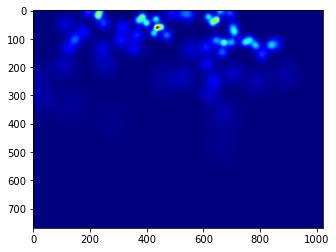

In [41]:
#Sample Ground Truth
gt_file = h5py.File(file_path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))

data/part_B/train_data\images\IMG_118.jpg


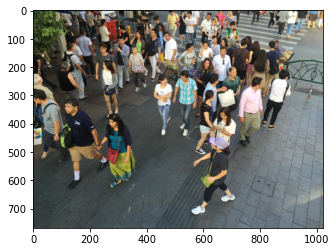

In [42]:
# Image corresponding to the ground truth
img = Image.open(file_path.replace('.h5','.jpg').replace('ground-truth','images'))
plt.imshow(img)
print(file_path.replace('.h5','.jpg').replace('ground-truth','images'))

In [43]:
groundtruth.shape

(768, 1024)

In [44]:
import pandas as pd

In [45]:
sp = pd.DataFrame(groundtruth)
sp.iloc[295:310,1000:]

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
295,1.224342e-07,1.112272e-07,1.009558e-07,9.155121e-08,8.294857e-08,7.508719e-08,6.791020e-08,6.136437e-08,5.540000e-08,4.997070e-08,...,2.943922e-08,2.641223e-08,2.367532e-08,2.120307e-08,1.897204e-08,1.696061e-08,1.514889e-08,1.351863e-08,1.205304e-08,1.073674e-08
296,1.153751e-07,1.048142e-07,9.513510e-08,8.627270e-08,7.816606e-08,7.075794e-08,6.399475e-08,5.782633e-08,5.220584e-08,4.708958e-08,...,2.774186e-08,2.488939e-08,2.231029e-08,1.998058e-08,1.787818e-08,1.598272e-08,1.427547e-08,1.273919e-08,1.135810e-08,1.011770e-08
297,1.086259e-07,9.868287e-08,8.956993e-08,8.122596e-08,7.359354e-08,6.661878e-08,6.025122e-08,5.444364e-08,4.915194e-08,4.433496e-08,...,2.611903e-08,2.343343e-08,2.100519e-08,1.881177e-08,1.683235e-08,1.504777e-08,1.344039e-08,1.199398e-08,1.069368e-08,9.525841e-09
298,1.021803e-07,9.282724e-08,8.425505e-08,7.640620e-08,6.922666e-08,6.266576e-08,5.667604e-08,5.121307e-08,4.623537e-08,4.170422e-08,...,2.456919e-08,2.204294e-08,1.975879e-08,1.769552e-08,1.583356e-08,1.415487e-08,1.264286e-08,1.128229e-08,1.005914e-08,8.960599e-09
299,9.603134e-08,8.724113e-08,7.918478e-08,7.180825e-08,6.506077e-08,5.889469e-08,5.326541e-08,4.813119e-08,4.345303e-08,3.919456e-08,...,2.309067e-08,2.071645e-08,1.856975e-08,1.663065e-08,1.488073e-08,1.330306e-08,1.188205e-08,1.060335e-08,9.453808e-09,8.421372e-09
300,9.017185e-08,8.191799e-08,7.435321e-08,6.742678e-08,6.109099e-08,5.530115e-08,5.001535e-08,4.519440e-08,4.080169e-08,3.680305e-08,...,2.168176e-08,1.945240e-08,1.743669e-08,1.561591e-08,1.397277e-08,1.249136e-08,1.115705e-08,9.956368e-09,8.876971e-09,7.907531e-09
301,8.459430e-08,7.685098e-08,6.975412e-08,6.325612e-08,5.731223e-08,5.188052e-08,4.692167e-08,4.239892e-08,3.827791e-08,3.452661e-08,...,2.034065e-08,1.824918e-08,1.635815e-08,1.464999e-08,1.310848e-08,1.171871e-08,1.046693e-08,9.340521e-09,8.327889e-09,7.418413e-09
302,7.929093e-08,7.203305e-08,6.538110e-08,5.929047e-08,5.371922e-08,4.862803e-08,4.398006e-08,3.974085e-08,3.587820e-08,3.236207e-08,...,1.906545e-08,1.710511e-08,1.533263e-08,1.373155e-08,1.228669e-08,1.098404e-08,9.810740e-09,8.754946e-09,7.805799e-09,6.953338e-09
303,7.425368e-08,6.745689e-08,6.122753e-08,5.552383e-08,5.030651e-08,4.553876e-08,4.118607e-08,3.721617e-08,3.359890e-08,3.030615e-08,...,1.785425e-08,1.601844e-08,1.435857e-08,1.285921e-08,1.150613e-08,1.028624e-08,9.187477e-09,8.198756e-09,7.309907e-09,6.511602e-09
304,6.947438e-08,6.311506e-08,5.728665e-08,5.195006e-08,4.706856e-08,4.260768e-08,3.853515e-08,3.482077e-08,3.143633e-08,2.835551e-08,...,1.670507e-08,1.498742e-08,1.343439e-08,1.203153e-08,1.076555e-08,9.624173e-09,8.596130e-09,7.671047e-09,6.839408e-09,6.092487e-09


In [46]:
spclean = (sp > 0.000001)
spclean

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
scipy.sparse.issparse(groundtruth)

False

In [51]:
np.sum(spclean)

0       278
1       278
2       278
3       280
4       280
       ... 
1019      0
1020      0
1021      0
1022      0
1023      0
Length: 1024, dtype: int64